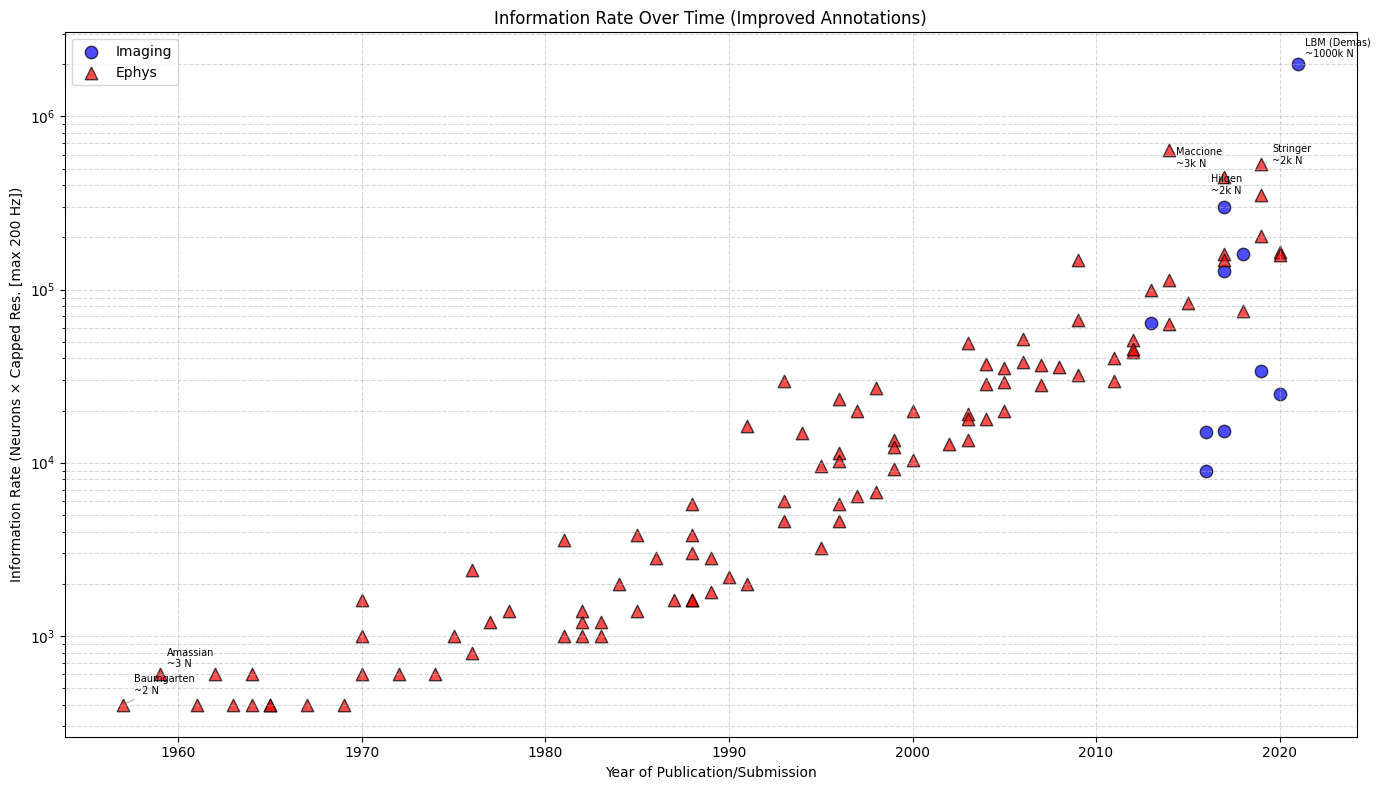

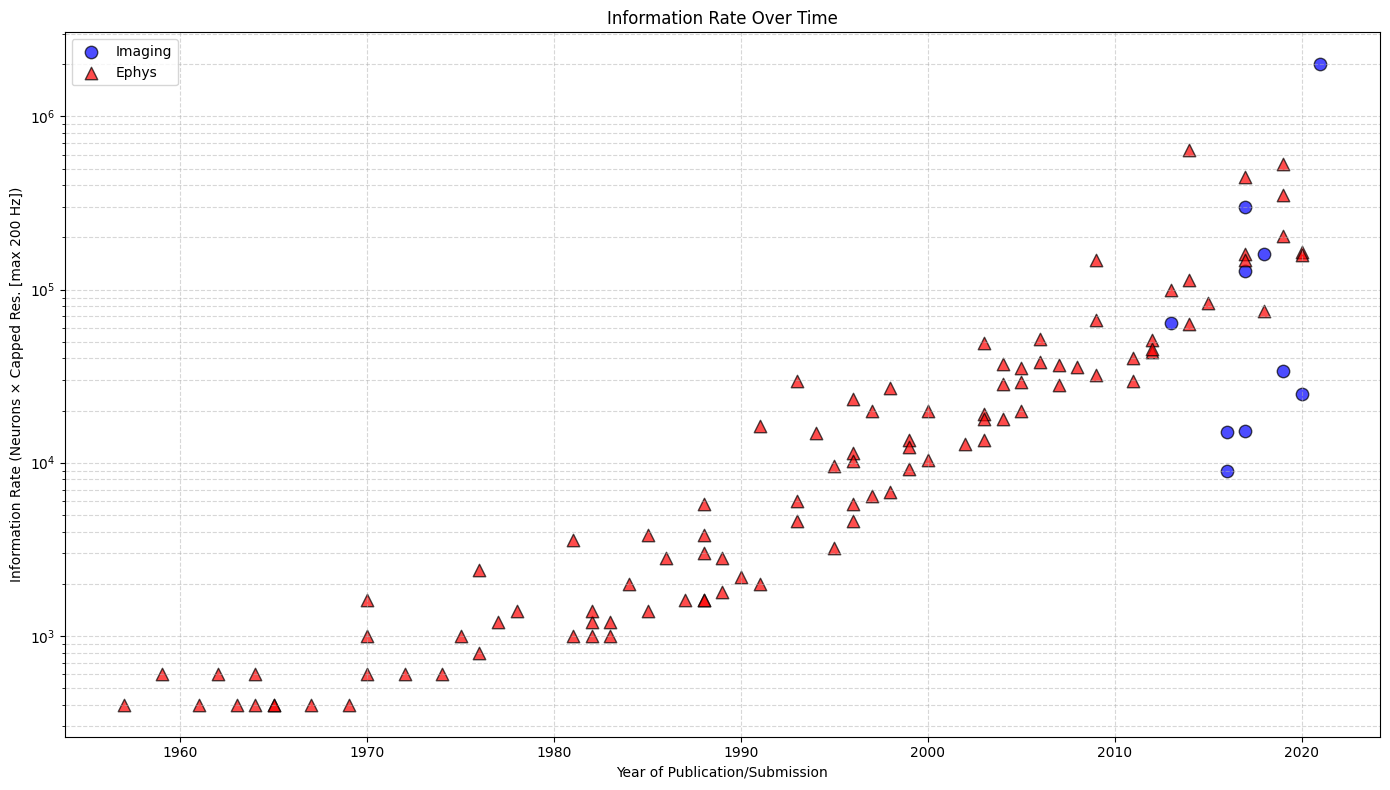

Plotted 10 imaging points and 101 ephys points for both plots.
Temporal resolution cap was 200.0 Hz.

Top 5 calculated information rates (overall) for context:
1. Yr: 2021, Rate: 2,000,000, Yield: 1,000,000, ActualRes: 2.0Hz (Capped: 2.0Hz), DOI: 10.1101/2021.02.21.432164
2. Yr: 2014, Rate: 640,000, Yield: 3,200, ActualRes: 200.0 (Capped: 200.0Hz), DOI: 10.1113/jphysiol.2013.262840
3. Yr: 2019, Rate: 533,600, Yield: 2,668, ActualRes: 200.0 (Capped: 200.0Hz), DOI: 10.1101/306019
4. Yr: 2017, Rate: 446,800, Yield: 2,234, ActualRes: 200.0 (Capped: 200.0Hz), DOI: 10.1016/j.celrep.2017.02.038
5. Yr: 2019, Rate: 353,800, Yield: 1,769, ActualRes: 200.0 (Capped: 200.0Hz), DOI: 10.1038/s41586-019-1787-x


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

csv_data = """Year,Month,normalized_best_yield,Authors,Method,source,Publication,Method Note,doi,initial_submission,normalized_technology,include,title,abstract,paper_type,channels,probes,stimulation,indicator,detailed_technology,detailed_yield,areas,free_behavior,normalized_species,is_neuropixels,normalized_chronic,normalized_quotes,date_float,cutting_edge
2003.0,6.0,35.0,Stosiek et al.,Imaging,Meijer,PNAS,,10.1073/pnas.1232232100,2003-06-01,calcium_imaging,,,,,,,,,,,,,,,,,2003.4134171132878,0
2005.0,1.0,100.0,Ohki et al.,Imaging,Meijer,Nature,calcium imaging in rat and cat cortex,10.1038/nature03274,2005-01-01,calcium_imaging,,,,,,,,,,,,,,,,,2005.001403177341,0
2010.0,4.0,58.0,Komiyama et al.,Imaging,Svoboda,Nature,average 55 neurons per experiment. First calcium imaging in behavior,10.1038/nature08897,2010-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.247233002731,0
2010.0,9.0,1585.0,Kerlin et al. ,Imaging,Urai,Neuron,"2p, mouse",10.1016/j.neuron.2010.08.002,2010-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.6661327748002,0
2010.0,9.0,106.0,O'Connor et al.,Imaging,Urai,Neuron,,10.1016/j.neuron.2010.08.026,2010-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.6661327748002,0
2010.0,10.0,100.0,Dombeck et al. ,Imaging,Urai,Nature Neuroscience,,10.1038/nn.2648,2010-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.74826998501,2
2011.0,1.0,200.0,Cheng et al. ,Imaging,Meijer,Nature Methods,,10.1038/nmeth.1552,2011-01-01,calcium_imaging,,,,,,,,,,,,,,,,,2011.000157429653,1
2012.0,8.0,250.0,Huber et al.,Imaging,Svoboda,Nature,First long-term calcium imaging experiment,10.1038/nature11039,2012-08-01,calcium_imaging,,,,,,,,,,,,,,,,,2012.5826676796923,1
2012.0,8.0,138.0,Petreanu et al.,Imaging,Svoboda,Nature,First imaging of axons to look at neurons defined by projections,10.1038/nature11321,2012-08-01,calcium_imaging,,,,,,,,,,,,,,,,,2012.5826676796923,2
2013.0,2.0,740.0,Ziv et al.,Imaging,Urai,Nature Neuroscience,,10.1038/nn.3329 ,2013-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.086442568978,1
2013.0,3.0,80000.0,Ahrens et al. ,Imaging,Urai,Nature Methods,light-sheet,10.1038/nmeth.2434,2013-03-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.1631039651738,0
2013.0,10.0,411.0,Cotton et al.,Imaging,Meijer,Frontiers in Neural Circuits,,10.3389/fncir.2013.00151,2013-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.7490160646694,2
2014.0,11.0,301.0,Lecoq et al. ,Imaging,Urai,Nature Neuroscience,,10.1038/nn.3867,2014-11-01,calcium_imaging,,,,,,,,,,,,,,,,,2014.8332272394368,3
2015.0,4.0,1800.0,Peron et al. ,Imaging,Urai,Neuron,2p,10.1016/j.neuron.2015.03.027,2015-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2015.2466511974922,1
2016.0,6.0,3000.0,Sofroniew et al.,Imaging,Urai,eLife,mouse mesoscope,10.7554/eLife.14472,2016-06-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.4157374894762,1
2016.0,10.0,3000.0,Prevedel et al.,Imaging,Rupprecht,Nature Methods,2p; 100s of neurons at 10Hz or 1000s of neurons at 3Hz,10.1038/nmeth.4040,2016-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.7497621443288,1
2016.0,12.0,1166.0,Kim et al.,Imaging,Urai,Cell Reports,mouse,10.1016/j.celrep.2016.12.004,2016-12-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.9167744717552,4
2017.0,2.0,511.0,Song et al. ,Imaging,Charles,Nature Methods,2p; ~1K at 30Hz,10.1038/nmeth.4226,2017-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.0865247061884,6
,,10000.0,,,Mineault,,,10.1101/156786,2017-06-27,calcium_imaging,checked,Robustness of spike deconvolution for calcium imaging of neural spiking,"Calcium imaging is a powerful method to record the activity of neural populations, but inferring spike times from calcium signals is a challenging problem. We compared multiple approaches using multiple datasets with ground truth electrophysiology, and found that simple non-negative deconvolution (NND) outperformed all other algorithms. We introduce a novel benchmark applicable to recordings without electrophysiological ground truth, based on the correlation of responses to two stimulus repeats, and used this to show that unconstrained NND also outperformed the other algorithms when run on \""zoomed out\"" datasets of ~10,000 cell recordings. Finally, we show that NND-based methods match the performance of a supervised method based on convolutional neural networks, while avoiding some of the biases of such methods, and at much faster running times. We therefore recommend that spikes be inferred from calcium traces using simple NND, due to its simplicity, efficiency and accuracy.",methods,unknown,unknown,involved,"GCaMP6m, using viral vector injection for expression","Two-photon calcium imaging, with GCaMP6m indicator","Recorded approximately 10,000 neurons per session in the visual cortex of awake, head-fixed mice.",['primary visual cortex'],False,mouse,,False,"Two-photon calcium imaging can be used to monitor the activity of populations of up to 10,000 neurons.

All experimental procedures were conducted according to the UK Animals Scientific Procedures Act (1986). Experiments were performed at University College London under personal and project licenses released by the Home Office following appropriate ethics review.

For this analysis, we used some of our own datasets, in which the responses to an ensemble of full field drifting grating stimuli were simultaneously-recorded in ∼ 10,000 cells from primary visual cortex of awake mice.

NND models infer the most likely spike train 𝐬(𝑡), given the fluorescence timecourse 𝐅(𝑡), and a response kernel 𝐤.

Our new benchmark is to maximize the Spearman correlation 𝜎𝑠𝑡𝑖𝑚 of deconvolved responses to two repeats of an ensemble of stimuli.

Some mice were transgenic and expressed tdtomato in certain cell classes.

During the surgery we implanted a head-plate for later head-fixation, made a craniotomy with a cranial window implant for optical access, and, on relevant experiments, performed injections of the GCaMP6m virus with a beveled micropipette using a Nanoject II injector.",2017.4862591292087,1
2017.0,7.0,10000.0,Pachitariu et al.,Imaging,Meijer,bioRxiv,,10.1101/061507,2017-07-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.4972107572366,1
2017.0,9.0,80000.0,Cong et al. ,Imaging,Urai,eLife,light-sheet in freely moving fish,10.7554/eLife.28158,2017-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.6669609916698,1
,,734.0,,,Mineault,,,10.1101/193383,2017-10-02,calcium_imaging,checked,OnACID: Online Analysis of Calcium Imaging Data in Real Time,"Optical imaging methods using calcium indicators are critical for monitoring the activity of large neuronal populations in vivo. Imaging experiments typically generate a large amount of data that needs to be processed to extract the activity of the imaged neuronal sources. While deriving such processing algorithms is an active area of research, most existing methods require the processing of large amounts of data at a time, rendering them vulnerable to the volume of the recorded data, and preventing realtime experimental interrogation. Here we introduce OnACID, an Online framework for the Analysis of streaming Calcium Imaging Data, including i) motion artifact correction, ii) neuronal source extraction, and iii) activity denoising and deconvolution. Our approach combines and extends previous work on online dictionary learning and calcium imaging data analysis, to deliver an automated pipeline that can discover and track the activity of hundreds of cells in real time, thereby enabling new types of closed-loop experiments. We apply our algorithm on two large scale experimental datasets, benchmark its performance on manually annotated data, and show that it outperforms a popular offline approach.",methods,unknown,unknown,unknown,"GCaMP, 2-photon",Online analysis of streaming calcium imaging data using OnACID framework in two-photon setups,Detected and tracked 727 to 734 neurons in 50-65 minute long sessions.,"['hippocampal', 'parietal cortex']",unknown,mouse,,True,"Calcium imaging methods continue to gain traction among experimental neuroscientists due to their capability of monitoring large targeted neuronal populations across multiple days or weeks with decisecond temporal and single-neuron spatial resolution.

The fine spatiotemporal resolution of calcium imaging comes at a data rate cost; a typical two-photon (2p) experiment on a 512×512 pixel large FOV imaged at 30Hz, generates ∼50GB of data (in 16-bit integer format) per hour.

Our framework is highly scalable with minimal memory requirements, as it processes the data in a streaming fashion one frame at a time, while keeping in memory a set of low dimensional sufficient statistics and a small minibatch of the last data frames.

We apply OnACID to two large-scale (50 and 65 minute long) mouse in vivo 2p datasets; our algorithm can find and track hundreds of neurons faster than real-time, and outperforms the CNMF algorithm of [28] benchmarked on multiple manual annotations using a precision-recall framework.

Application to in vivo 2p mouse hippocampal data: Next we considered a larger scale (90K frames, 480× 480 pixels) real 2p calcium imaging dataset taken at 30Hz (i.e., 50 minute experiment). Motion artifacts were corrected prior to the analysis described below. The online algorithm was initialized on the first 1000 frames of the dataset using a Python implementation of the CNMF algorithm found in the CaImAn package [14]. During initialization 139 active sources were detected; by the end of all 90K frames, 727 active sources had been detected and tracked (5 of which were discarded due to their small size).

The first 3000 frames were used for initialization during which the CNMF algorithm found 442 neurons, before switching to OnACID, which by the end of the experiment found a total of 752 neurons (734 after filtering for size).

OnACID can detect and track neurons with very sparse spiking over the course of the entire 50 minute experiment (Fig. 3C-top), and produce traces that are highly correlated with their offline counterparts.",2017.7518361088867,9
,,10000.0,,,Mineault,,,10.1101/434035,2018-10-03,calcium_imaging,checked,Wide and Deep Imaging of Neuronal Activities by a Wearable NeuroImager Reveals Premotor Activity in the Whole Motor Cortex,"Wearable technologies for functional whole brain imaging in freely moving animals would advance our understanding of cognitive processing and adaptive behavior. Fluorescence imaging can visualize the activity of individual neurons in real time, but conventional microscopes have limited sample coverage in both the width and depth of view. Here we developed a novel head-mounted laser camera (HLC) with macro and deep-focus lenses that enable fluorescence imaging at cellular resolution for comprehensive imaging in mice expressing a layer- and cell type-specific calcium probe. We visualized orientation selectivity in individual excitatory neurons across the whole visual cortex of one hemisphere, and cell assembly expressing the premotor activity that precedes voluntary movement across the motor cortex of both hemispheres. Including options for multiplex and wireless interfaces, our wearable, wide- and deep-imaging HLC technology could enable simple and economical mapping of neuronal populations underlying cognition and behavior.",methods,,,unknown,"CaMK2a-G-CaMP7, calcium imaging with head-mounted laser camera (HLC), 2-photon microscopy","head-mounted laser camera (HLC) for wide and deep-field calcium imaging at cellular resolution, 2-photon microscopy used for some experiments","Approximately 10,000 neurons per session in a field of view.","['visual cortex', 'motor cortex']",True,mouse,,True,"Here we developed a novel head-mounted laser camera (HLC) with macro and deep-focus lenses that enable fluorescence imaging at cellular resolution for comprehensive imaging in mice expressing a layer- and cell type-specific calcium probe.

We visualized orientation selectivity in individual excitatory neurons across the whole visual cortex of one hemisphere, and cell assembly expressing the premotor activity that precedes voluntary movement across the motor cortex of both hemispheres.

Importantly, since the wearable HLC is robustly fixed to the mouse skull, normal body movements do not perturb the wide-view fluorescence imaging...

The number of blinking spots representing presumptive cellular elements in the field of view in Fig. 1d was estimated at approximately 10,000 (Supplementary Fig. 3, Supplementary Movie 3).

We confirmed that the imaging of neuronal activities by the HLC attached to the head of freely moving mice causes no significant increase of stress, and does not affect the locomotor activity and the behavioral pattern (Supplementary Fig. 2).

The findings indicate that the HLC can acquire fluorescence signals deep in the cerebral cortex at high precision compared to a conventional wide-field fluorescence microscope.

As two examples in the present study, CaMK2a-G-CaMP7 mice expressing G-CaMP specifically in excitatory neurons...

We developed what we term “restriction motion experiment” to easily detect the activity associated with a specific movement...

In (f), the fluorescence images of the anesthetized mouse were taken by 2-photon microscopy.",2018.7539100734443,4
,,4600.0,,,Mineault,,,10.1101/441014,2018-10-12,calcium_imaging,checked,Cellular organization of visual information processing channels in the mouse visual cortex,"Visual processing and behavior depend on specialized neural representations and information channels that encode distinct visual information and enable distinct computations. Our understanding of the neural substrate, however, remain severely limited by sparse recordings and the restricted range of visual areas and visual stimuli considered. We characterized in the mouse the multidimensional spatiotemporal tuning properties of > 30,000 layer 2/3 pyramidal neurons across seven areas of the cortex. The dataset reveals population specialized for processing of oriented and non-oriented contrast, spatiotemporal frequency, and motion speed. Areal analysis reveals profound functional diversity and specificity as well as highly specific representations of visual processing channels in distinct visual areas. Clustering analysis shows a branching of visual representations along the posterior to anterior axis, and between lateral and dorsal areas. Overall, this dataset provides a cellular-resolution atlas for understanding organizing principles underlying sensory representations across the cortex.

SummaryVisual representations and visual channels are the cornerstones of mammalian visual processing and critical for a range of life sustaining behaviors. However, the lack of data sets spanning multiple visual areas preclude unambiguous identification of visual processing streams and the sparse, singular recording data sets obtained thus far are insufficient to reveal the functional diversity of visual areas and to study visual information channels. We characterized the tunings of over 30,000 cortical excitatory neurons from 7 visual areas to a broad array of stimuli and studied their responses in terms of their ability to encode orientation, spatiotemporal contrast and visual motion speed. We found all mouse visual cortical areas convey diverse information but show distinct biases in terms of numbers of neurons tuned to particular spatiotemporal features. Neurons in visual areas differ in their spatiotemporal tuning but also in their relative response to oriented and unoriented contrast. We uncovered a population that preferentially responds to unoriented contrast and shows only weak responses to oriented stimuli. This population is strongly overrepresented in certain areas (V1, LM and LI) and underrepresented in others (AL, RL, AM, and PM). Spatiotemporal tunings are broadly distributed in all visual areas indicating that all areas have access to broad spatiotemporal information. However, individual areas show specific biases. While V1 is heavily biased in favor of low spatial and temporal frequencies, area LM responds more strongly to mid-range frequencies. Areas PM and LI are biased in favor of slowly-varying high-resolution signals. By comparison, anterior areas AL, RL and AM are heavily biased in favor of fast-varying, low to mid spatial frequency signals. Critically, theses biases express themselves in vastly different number of cells tuned to particular features, suggesting differential sampling of visual processing channels across areas. Comparing across areas, we found divergent visual representations between anterior and posterior areas, and between lateral and dorsal areas, suggesting the segregated organization of cortical streams for distinct information processing.",results,unknown,unknown,unknown,Thy1-GCaMP6s,Two-photon calcium imaging,"Recorded 40,000 neurons in total across multiple sessions using two-photon calcium imaging. A subsample of 2000 neurons was used for certain analyses.","['V1', 'LM', 'AL', 'RL', 'AM', 'PM', 'LI']",False,mouse,,False,"Using two-photon calcium imaging and stochastic visual stimuli, we catalogued the response properties of a dense sample of 40,000 neurons in V1 and six secondary visual areas of awake mice.

We could quantitatively determine the degree to which areas in the mouse visual cortex are specialized for distinct spatiotemporal features.

We undertook a comprehensive functional characterization of layer 2/3 neurons in V1 and six higher visual areas in awake mice using two-photon calcium imaging.

We simultaneously recorded neuronal activities in large volumes (0.8 x 0.8 x 0.15 mm3) of layer 2/3 of the targeted visual cortical areas.

We obtained a subsample of 2000 neurons with random selection, each neuron yielded a vector of peak-normalized responses to ISO and ANISO stimuli.

Neurons responsive to isotropic noise stimuli.

The animal was head-clamped on a platform while consciously viewing the visual stimuli on the display.

Thy1-GCaMP6s-WPRE mice (n = 10, 5 male and 5 female)

Each stimulus condition was presented for 4 second, intertwined with 4-second equiluminent gray screen. In each of the four pseudorandomized trials, a different seed was used to generate unique random noise, resulting in different phases yet constant frequency spectra across trials.

We recorded cellular responses to spectral noise stimuli in layer 2/3 of V1 and six higher visual areas (LM: lateromedial; AL: anterolateral; RL: rostrolateral; AM: anteromedial; PM: posteromedial; LI: laterointermediate)",2018.7785512365072,4
,,4692.0,,,Mineault,,,10.1101/452672,2018-10-25,calcium_imaging,checked,Stimulus domain transfer in recurrent models for large scale cortical population prediction on video,"To better understand the representations in visual cortex, we need to generate better predictions of neural activity in awake animals presented with their ecological input: natural video. Despite recent advances in models for static images, models for predicting responses to natural video are scarce and standard linear-nonlinear models perform poorly. We developed a new deep recurrent network architecture that predicts inferred spiking activity of thousands of mouse V1 neurons simulta-neously recorded with two-photon microscopy, while accounting for confounding factors such as the animals gaze position and brain state changes related to running state and pupil dilation. Powerful system identification models provide an opportunity to gain insight into cortical functions through in silico experiments that can subsequently be tested in the brain. However, in many cases this approach requires that the model is able to generalize to stimulus statistics that it was not trained on, such as band-limited noise and other parameterized stimuli. We investigated these domain transfer properties in our model and find that our model trained on natural images is able to correctly predict the orientation tuning of neurons in responses to artificial noise stimuli. Finally, we show that we can fully generalize from movies to noise and maintain high predictive performance on both stimulus domains by fine-tuning only the final layers weights on a network otherwise trained on natural movies. The converse, however, is not true.",methods,unknown,unknown,unknown,unknown,two-photon microscopy with a large-field-of-view mesoscope,3 sets of 1344-4692 simultaneously recorded deconvolved fluorescence traces from two-photon scans,['V1'],unknown,mouse,,,"We developed a new deep recurrent network architecture that predicts inferred spiking activity of thousands of mouse V1 neurons simultaneously recorded with two-photon microscopy...

Our data consists of three sets of 1344-4692 simultaneously recorded deconvolved fluorescence traces from two-photon scans in mouse visual cortex area V1 L2/3, collected from three animals using a large-field-of-view mesoscope.",2018.814144027598,5
2018.0,11.0,80000.0,Chen et al. ,Imaging,Urai,Neuron,"zebrafish, light-sheet",10.1016/j.neuron.2018.09.042 ,2018-11-01,calcium_imaging,,,,,,,,,,,,,,,,,2018.833309376647,2
2019.0,4.0,11262.0,Stringer et al. ,Imaging,Urai,Science,2p,10.1126/science.aav7893,2019-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2019.2467333347022,3
2019.0,4.0,11907.0,Weisenburger et al.,Imaging,Urai,Cell,,10.1016/j.cell.2019.03.011,2019-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2019.2467333347022,3
,,20000.0,,,Mineault,,,10.1101/679324,2019-06-21,calcium_imaging,checked,High precision coding in mouse visual cortex,"Single neurons in visual cortex provide unreliable measurements of visual features due to their high trial-to-trial variability. It is not known if this \""noise\"" extends its effects over large neural populations to impair the global encoding of stimuli. We recorded simultaneously from [~]20,000 neurons in mouse primary visual cortex (V1) and found that the neural populations had discrimination thresholds of [~]0.34{degrees} in an orientation decoding task. These thresholds were nearly 100 times smaller than those reported behaviorally in mice. The discrepancy between neural and behavioral discrimination could not be explained by the types of stimuli we used, by behavioral states or by the sequential nature of perceptual learning tasks. Furthermore, higher-order visual areas lateral to V1 could be decoded equally well. These results imply that the limits of sensory perception in mice are not set by neural noise in sensory cortex, but by the limitations of downstream decoders.",results,unknown,unknown,unknown,"GCaMP6s, TetO-GCaMP6s x Emx1-IRES-Cre mice, 2-photon",multi-plane two-photon calcium imaging using a custom-built 2-photon mesoscope,"19,665 ± 3,062 neurons per recording (s.d., n=6)",['visual cortex'],True,mouse,,False,"We recorded simultaneously from ∼20,000 neurons in mouse visual cortex

We recorded neural activity from visual cortex using multi-plane two-photon calcium imaging

We obtained 19,665 ± 3,062 (s.d., n=6) neurons per recording using the processing pipeline Suite2p

We performed experiments on three mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s x Emx1-IRES-Cre mice

We also performed experiments on three wild-type C57 mice in 17 recordings

We used a custom-built 2-photon mesoscope [57] to record neural activity, and ScanImage [58] for data acquisition, obtaining 18,496 ± 3,441 (s.d., n=32) neurons in the recordings

Surgical methods were similar to those described elsewhere [31]. Briefly, surgeries were performed in adult mice (P35P125) under isoflurane anesthesia (5% for induction, 1-2% during the surgery) in a stereotaxic frame

The mice were free to run on an air-floating ball",2019.4685038022683,3
,,29000.0,,,Mineault,,,10.1101/745323,2019-08-23,calcium_imaging,checked,A global map of orientation tuning in mouse visual cortex,"In primates and most carnivores, neurons in primary visual cortex are spatially organized by their functional properties. For example, neurons with similar orientation preferences are grouped together in iso-orientation domains that smoothly vary over the cortical sheet. In rodents, on the other hand, neurons with different orientation preferences are thought to be spatially intermingled, a feature which has been termed \""salt-and-pepper\"" organization. The apparent absence of any systematic structure in orientation tuning has been considered a defining feature of the rodent visual system for more than a decade, with broad implications for brain development, visual processing, and comparative neurophysiology. Here, we revisited this question using new techniques for wide-field two-photon calcium imaging that enabled us to collect nearly complete population tuning preferences in layers 2-4 across a large fraction of the mouse visual hierarchy. Examining the orientation tuning of these hundreds of thousands of neurons, we found a global map spanning multiple visual cortical areas in which orientation bias was organized around a single pinwheel centered in V1. This pattern was consistent across animals and cortical depth. The existence of this global organization in rodents has implications for our understanding of visual processing and the principles governing the ontogeny and phylogeny of the visual cortex of mammals.",results,,,false,"GCaMP6s, two-photon",two-photon calcium imaging,"Over 17,000–29,000 orientation-tuned cells per animal; 49,000 - 68,000 somas segmented per animal; approximately 4600 to 6300 soma per scan","['primary visual cortex', 'anteromedial', 'posteromedial', 'rostrolateral', 'anterolateral', 'lateromedial']",False,mouse,,False,"We recorded visual responses from GCaMP6s-expressing excitatory neurons located in L2/3–L4 of primary visual cortex and surrounding higher visual areas in eight mice.

Two-photon calcium imaging was used to record neuronal activity in a 1800×1800×250− 350µm3 volume by placing sequential scans at 25µm increments in depth...

...resulting in over 17,000–29,000 orientation-tuned cells per animal (35.2–49.0%).

In total, over 49,000 - 68,000 somas were segmented per animal.

This resulted in 4600 to 6300 soma masks per scan up to 350µm from the surface, and 1900 to 5300 per scan from 350−500µm from the surface.

Each mouse was allowed to recover for at least 3 days prior to the first experimental imaging session.

Two-photon Imaging. Mice were head-mounted above a cylindrical treadmill and calcium imaging was performed...

To assure we count cells only once, we subsample our recorded cells based on proximity in 3-d space...",2019.6409919437087,3
2020.0,7.0,16000.0,Ota et al. ,Imaging,Urai,bioRxiv,,10.1101/2020.07.14.201699,2020-07-01,calcium_imaging,,,,,,,,,,,,,,,,,2020.497956836896,5
2021.0,2.0,1000000.0,Demas et al. ,Imaging,Urai,bioRxiv,,10.1101/2021.02.21.432164,2021-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2021.0866068433986,0
,,75000.0,,,Mineault,,,10.1101/2021.07.28.454025,2021-07-29,calcium_imaging,checked,Functional connectomics spanning multiple areas of mouse visual cortex,"To understand the brain we must relate neurons functional responses to the circuit architecture that shapes them. Here, we present a large functional connectomics dataset with dense calcium imaging of a millimeter scale volume. We recorded activity from approximately 75,000 neurons in primary visual cortex (VISp) and three higher visual areas (VISrl, VISal and VISlm) in an awake mouse viewing natural movies and synthetic stimuli. The functional data were co-registered with a volumetric electron microscopy (EM) reconstruction containing more than 200,000 cells and 0.5 billion synapses. Subsequent proofreading of a subset of neurons in this volume yielded reconstructions that include complete dendritic trees as well the local and inter-areal axonal projections that map up to thousands of cell-to-cell connections per neuron. Here, we release this dataset as an open-access resource to the scientific community including a set of tools that facilitate data retrieval and downstream analysis. In accompanying papers we describe our findings using the dataset to provide a comprehensive structural characterization of cortical cell types1-3 and the most detailed synaptic level connectivity diagram of a cortical column to date2, uncovering unique cell-type specific inhibitory motifs that can be linked to gene expression data4. Functionally, we identify new computational principles of how information is integrated across visual space5, characterize novel types of neuronal invariances6 and bring structure and function together to decipher a general principle that wires excitatory neurons within and across areas7, 8.",results,unknown,unknown,visual stimuli,GCaMP6s in excitatory neurons via SLC17a7-Cre and Ai162,two-photon random access mesoscope (2P-RAM),"An estimated 75,909 unique functionally-imaged neurons from multiple scans, indicating consolidation from segmented images.","['VISp', 'VISrl', 'VISal', 'VISlm']",False,mouse,,True,"The value of an integrated approach for understanding the neocortex by combining functional characterization of single neuron activity with the underlying circuit architecture has been understood since the dawn of modern neuroscience. However, in practice, anatomical connectivity and physiology have been studied mostly separately.

Here we present a unique functional connectomics dataset that contains calcium imaging of an estimated 75,000 neurons from primary visual cortex (VISp) and three higher visual areas (VISrl, VISal and VISlm), that were recorded while a mouse viewed natural movies and parametric stimuli.

The functional data were co-registered with electron microscopy (EM) data of the same volume which were automatically segmented, reconstructing more than 200,000 cells (neuronal and non-neuronal) and 524 million synapses.

The largest proofread excitatory axon reached a length of 19 mm and formed 1893 synapses, while the largest inhibitory axon formed 10081 synapses.

Functional Data Neurophysiology Overview The calcium imaging data includes the single-cell responses of an estimated 75,000 excitatory neurons to a variety of visual stimuli across multiple visual areas spanning cortical layers 2 through 5.

From the calcium images, we have extracted the responses of approximately 75,000 pyramidal cells to the visual stimuli using a constrained non-negative matrix factorization approach.

Each scan was composed of multiple imaging planes, and leveraged the wide field-of-view of the two-photon random access mesoscope (2P-RAM) (Sofroniew et al. 2016) to capture two adjacent overlapping 620 µm-wide fields at each depth.

Using a greedy consolidation algorithm based on 3D proximity, we estimate that the functional imaging volume contains 75,909 unique functionally-imaged neurons consolidated from 115,372 segmented somatic masks, with many neurons imaged in two or more scans.

During imaging, the animal was head-restrained, and the stimulus was presented to the left visual field.

Calcium imaging was performed from P75 to P81 in a transgenic mouse expressing GCaMP6s in excitatory neurons via SLC17a7-Cre and Ai162 (Daigle et al. 2018).",2021.5739542906426,4
,,10096.0,,,Mineault,,,10.1101/2021.09.20.461015,2021-09-21,calcium_imaging,checked,Large-scale two-photon calcium imaging in freely moving mice,"We developed a miniaturized two-photon microscope (MINI2P) for fast, high-resolution, multiplane calcium imaging of over 1,000 neurons at a time in freely moving mice. With a microscope weight below 3g and a highly flexible connection cable, MINI2P allowed imaging to proceed with no impediment of behavior in half-hour free-foraging trials compared to untethered, unimplanted animals. The improved cell yield was achieved through a new optical system design featuring an enlarged field of view (FOV) and a new micro-tunable lens with increased z-scanning range and speed that allowed for fast and stable imaging of multiple, interleaved planes as well as 3D functional imaging. A novel technique for successive imaging across multiple, adjacent FOVs enabled recordings from more than 10,000 neurons in the same animal. Large-scale proof-of-principle data were obtained from cell populations in visual cortex, medial entorhinal cortex, and hippocampus, revealing spatial tuning of cells in all areas, including visual cortex.

HighlightsWe developed a lightweight 2-photon miniscope for imaging in freely-foraging mice

Activity can be monitored in volumes of over 1,000 visual or entorhinal-cortex cells

A new z-scanning module allows fast imaging across multiple interleaved planes

Successive imaging from adjacent regions enables imaging from more than 10,000 cells",methods,,,unknown,"GCaMP6s, transgenic mouse line, 2-photon","MINI2P, next-generation 2P miniscope enabling true 3D functional imaging across large populations","10,096 non-repeated neurons with average yields per FOV around 404 neurons","['visual cortex', 'medial entorhinal cortex', 'CA1']",True,mouse,,True,"We present a new generation of 2P miniscopes, MINI2P, that overcomes the limits of previous versions by both meeting requirements for fatigue-free exploratory behavior during extended recording periods and satisfying demands for further increasing the cell yield by an order of magnitude.

We used MINI2P to obtain large scale recordings of dense populations of neurons in the medial entorhinal cortex (MEC) and the neighboring parasubiculum (PAS).

With these three strategies for increasing cell yield, MINI2P could more than double the number of simultaneously recorded cells compared to previous 2P miniscope versions, and the number could be increased more than tenfold over successive recordings.

MINI2P is controlled by open-source 2P acquisition software (ScanImage).

MINI2P enables large-scale high-resolution imaging in diverse brain structures.

We demonstrated that hundreds of identifiable grid cells could be recorded simultaneously from a single freely-moving mouse with MINI2P.

We were able to extract in total 10,096 non-repeated layer 2/3 excitatory neurons via Suite2p, yielding an average of 404 cells per 500 × 500 μm2 FOV across the two planes.

MINI2P allows animals to behave with the same level of flexibility as with 1P miniscopes, despite the added 2P hardware. Mice can carry MINI2P microscopes on their head for half an hour or more without interruptions, while they roam freely in open environments.

This first successful demonstration of large-population, high-resolution 3D functional imaging with 2P miniscopes opens the door to studies of 3D neuronal calcium dynamics in freely-moving animals.

The species studied were mice through most of the experiments.

We were able to detect hundreds of neurons in a single FOV in all three regions (592 cells in VC, 404 in MEC, and 464 in CA1).

Experiments were performed according to the Norwegian Animal Welfare Act using wild-type (C57BL/6JBomTac) as well as transgenic mice, which express GCaMP6s ubiquitously under control of the CaMKII promoter.

MINI2P microscope enables true 3D functional imaging. We supplement these advances with a novel technique where adjacent FOVs are stitched together over successive recordings, increasing the yield of successively recorded cells to over 10,000 in one animal.",2021.7218012690198,10
,,10500.0,,,Mineault,,,10.1101/2023.03.20.533476,2023-03-21,calcium_imaging,checked,Mesoscale volumetric light field (MesoLF) imaging of neuroactivity across cortical areas at 18 Hz,"Various implementations of mesoscopes provide optical access for calcium imaging across multi-millimeter fields-of-view (FOV) in the mammalian brain. However, capturing the activity of the neuronal population within such FOVs near-simultaneously and in a volumetric fashion has remained challenging since approaches for imaging scattering brain tissues typically are based on sequential acquisition. Here, we present a modular, mesoscale light field (MesoLF) imaging hardware and software solution that allows recording from thousands of neurons within volumes of  4000 x 200 {micro}m, located at up to 400 {micro}m depth in the mouse cortex, at 18 volumes per second. Our optical design and computational approach enable up to hour-long recording of [~]10,000 neurons across multiple cortical areas in mice using workstation-grade computing resources.",methods,,,whisker stimulation,GCaMP,"MesoLF, Mesoscale Light Field imaging with seeded iterative demixing","More than 10,500 active neurons recorded per session, per mouse","['posterior parietal', 'primary somatosensory', 'primary visual', 'anteromedial visual', 'retrosplenial']",False,mouse,,False,"We present a modular, mesoscale light field (MesoLF) imaging hardware and software solution that allows recording from thousands of neurons within volumes of 4000 × 200 µm, located at up to 400 µm depth in the mouse cortex, at 18 volumes per second.

Our design and computational approach enable up to hour-long recording of ~10,000 neurons across multiple cortical areas in mice using workstation-grade computing resources.

Using a modular, Mesoscale Light Field (MesoLF) imaging hardware and software solution, we demonstrate volumetric recording from more than 10,500 active neurons across different regions of the mouse cortex within different volumes of 4000 × 200 µm positioned at depths up to ~400 µm.

Performing up to hour-long calcium imaging in the cortex of head-restrained mice.

We verified the in vivo performance of our high-resolution MesoLF optical module and signal extraction pipeline by performing up to hour-long calcium imaging in the cortex of head-restrained mice.

The imaged volume contained all or the majority of the posterior parietal, primary somatosensory, primary visual, anteromedial visual, and retrosplenial cortical area.",2023.2166984948356,10
,,70000.0,,,Mineault,,,10.1101/2023.07.25.550571,2023-07-28,calcium_imaging,checked,Rastermap: a discovery method for neural population recordings,"Neurophysiology has long progressed through exploratory experiments and chance discoveries. Anecdotes abound of researchers setting up experiments while listening to spikes in real time and observing a pattern of consistent firing when certain stimuli or behaviors happened. With the advent of large-scale recordings, such close observation of data has become harder because high-dimensional spaces are impenetrable to our pattern-finding intuitions. To help ourselves find patterns in neural data, our lab has been openly developing a visualization framework known as ""Rastermap"" over the past five years. Rastermap takes advantage of a new global optimization algorithm for sorting neural responses along a one-dimensional manifold. Displayed as a raster plot, the sorted neurons show a variety of activity patterns, which can be more easily identified and interpreted. We first benchmark Rastermap on realistic simulations with multiplexed cognitive variables. Then we demonstrate it on recordings of tens of thousands of neurons from mouse visual and sensorimotor cortex during spontaneous, stimulus-evoked and task-evoked epochs, as well as on whole-brain zebrafish recordings, widefield calcium imaging data, population recordings from rat hippocampus and artificial neural networks. Finally, we illustrate high-dimensional scenarios where Rastermap and similar algorithms cannot be used effectively.",methods,,,visual,GCaMP6s,Two-photon calcium imaging with a custom-built mesoscope and GCaMP6s expression using TetO-GCaMP6s x Emx1-IRES-Cre mice.,"Up to 70,000 simultaneously-recorded neurons in sessions involving mice behaving freely on an air-floating ball.","['visual cortex', 'sensorimotor cortex', 'anterior motor cortex']",True,mouse,,True,"We have so far illustrated Rastermap on large-scale calcium-imaging data from mouse cortex.

In this section, we show that Rastermap can be applied more broadly to recordings from other organisms, with fewer recorded neurons and even on bulk neural activity such as from widefield one-photon imaging.

we illustrate Rastermap on a variety of neural datasets from different species (mouse, rat, zebrafish) as well as on artificial neural networks.

we apply it to a variety of datasets. We start in this section and the next, with datasets collected in our own lab, using two-photon calcium imaging of large neural populations of up to 70,000 simultaneously-recorded neurons at sampling frequencies of ~3.2 Hz.

The mice were free to run on an air-floating ball.

3 recordings in 3 mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s x Emx1-IRES-Cre mice.

Surgeries were performed in adult mice (P35–P125) following procedures outlined in [31]. In brief, mice were anesthetized with Isoflurane while a craniotomy was performed.

We used a custom-built 2-photon mesoscope to record neural activity, and ScanImage for data acquisition.

The mice were acclimatized to running on the ball for several sessions before imaging, and one mouse was trained on a virtual reality task for two weeks prior to the recording.

When fewer neurons are recorded (<200), Rastermap can skip the k-means clustering step and directly order the neurons according to their asymmetric cross-correlogram peaks. This also allows us to skip the upsampling step, thereby simplifying the algorithm substantially.

We used recordings where different optomotor paradigms were presented using different visual stimulation conditions.",2023.569888498737,5
,,970546.0,,,Mineault,,,10.1101/2024.01.15.575721,2024-01-16,calcium_imaging,checked,"Simultaneous, cortex-wide and cellular-resolution neuronal population dynamics reveal an unbounded scaling of dimensionality with neuron number","The brains remarkable properties arise from collective activity of millions of neurons. Widespread application of dimensionality reduction to multi-neuron recordings implies that neural dynamics can be approximated by low-dimensional ""latent"" signals reflecting neural computations. However, what would be the biological utility of such a redundant and metabolically costly encoding scheme and what is the appropriate resolution and scale of neural recording to understand brain function? Imaging the activity of one million neurons at cellular resolution and near-simultaneously across mouse cortex, we demonstrate an unbounded scaling of dimensionality with neuron number. While half of the neural variance lies within sixteen behavior-related dimensions, we find this unbounded scaling of dimensionality to correspond to an ever-increasing number of internal variables without immediate behavioral correlates. The activity patterns underlying these higher dimensions are fine-grained and cortex-wide, highlighting that large-scale recording is required to uncover the full neural substrates of internal and potentially cognitive processes.",results,unknown,unknown,unknown,GCaMP6s or GCaMP6f,"Light Beads Microscopy (LBM), a volumetric calcium imaging technique capable of recording up to one million neurons.","Recorded between 6,519 to 970,546 neurons. Chronic recording via cranial window.","['mouse dorsal cortex', 'including visual, somatosensory, posterior parietal, retrosplenial, and motor cortices']",False,mouse,,True,"Imaging the activity of one million neurons at cellular resolution and near-simultaneously across mouse cortex...

...recording the dynamics of up to one million neurons distributed across different depths and regions of mouse dorsal cortex using light beads microscopy (LBM)...

...using light beads microscopy (LBM) (Demas et al., 2021) during spontaneous and uninstructed behavior in head-fixed mice.

Neural activity across these cortical regions was imaged for one hour while animals were free to move on a linear treadmill and exhibited epochs of various spontaneous and uninstructed behaviors...

...providing a unique opportunity to assess the geometry and spatiotemporal structure of cortex-wide neuronal dynamics.

The species studied in this paper is mice, specifically transgenic mice expressing the genetically encoded calcium indicator GCaMP6s or GCaMP6f...

The full neural state space was measured from 6,519 to 970,546 near-simultaneously recorded neurons, respectively...

To investigate the geometry and dimensionality of spontaneous neuronal population dynamics across different depths and regions of the dorsal cortex of the mouse...

We imaged transgenic mice expressing the genetically encoded calcium indicator GCaMP6s or GCaMP6f...

...chronic cranial window implantations (see STAR Methods for details) allowed for optical access to the majority of the dorsal cortical volume...

Mice were head-fixed on a low-friction, self-driven belt treadmill...",2024.0408085039392,1
,,90000.0,,,Mineault,,,10.1101/2024.02.25.581990,2024-02-27,calcium_imaging,checked,Distinct streams for supervised and unsupervised learning in the visual cortex,"Representation learning in neural networks may be implemented with supervised or unsupervised algorithms, distinguished by the availability of feedback. In sensory cortex, perceptual learning drives neural plasticity, but it is not known if this is due to supervised or unsupervised learning. Here we recorded populations of up to 90,000 neurons simultaneously from the primary visual cortex (V1) and higher visual areas (HVA), while mice learned multiple tasks as well as during unrewarded exposure to the same stimuli. Similar to previous studies, we found that neural changes in task mice were correlated with their behavioral learning. However, the neural changes were mostly replicated in mice with unrewarded exposure, suggesting that the changes were in fact due to unsupervised learning. The neural plasticity was concentrated in the medial HVAs and obeyed visual, rather than spatial, learning rules. In task mice only, we found a ramping reward prediction signal in anterior HVAs, potentially involved in supervised learning. Our neural results predict that unsupervised learning may accelerate subsequent task learning, a prediction which we validated with behavioral experiments.",results,unknown,unknown,unknown,"GCaMP6s in TetO-GCaMP6s x Emx1-IRES-Cre mice, two-photon",Two-photon mesoscope using GCaMP6s indicator,"Recording from 20,547-89,577 neurons per session in 79 recordings across 15 mice","['primary visual cortex (V1)', 'higher visual areas (HVA)']",False,mouse,,,"Here we recorded populations of up to 90,000 neurons simultaneously from the primary visual cortex (V1) and higher visual areas (HVA), while mice learned multiple tasks as well as during unrewarded exposure to the same stimuli.

Before and after learning, we recorded from large neural populations across many visual areas simultaneously using a two-photon mesoscope [26] (Figure 1e). We ran Suite2p on this data to obtain the activity traces from 20,547-89,577 neurons in each recording [27].

Mice were head-fixed...We used a custom-built 2-photon mesoscope to record neural activity, and ScanImage for data acquisition.

Calcium imaging data was processed using Suite2p [27], available at www.github.com/MouseLand/suite2p. Suite2p performs motion correction, ROI detection, cell classification, neuropil correction, and spike deconvolution as described elsewhere [55].

Mice were acclimatized to running on the ball several sessions before training and imaging.

We performed 79 recordings in 15 mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s (available RRID:IMSR JAX:024742) x Emx1-IRES-Cre (RRID:IMSR JAX:005628) [43].",2024.1558005982326,2
,,40000.0,,,Mineault,,,10.1101/2024.08.21.609011,2024-08-22,calcium_imaging,checked,ActSort: An active-learning accelerated cell sorting algorithm for large-scale calcium imaging datasets,"Recent advances in calcium imaging enable simultaneous recordings of up to a million neurons in behaving animals, producing datasets of unprecedented scales. Although individual neurons and their activity traces can be extracted from these videos with automated algorithms, the results often require human curation to remove false positives, a laborious process called cell sorting. To address this challenge, we introduce ActSort, an active-learning algorithm for sorting large-scale datasets that integrates features engineered by domain experts together with data formats with minimal memory requirements. By strategically bringing outlier cell candidates near the decision boundary up for annotation, ActSort reduces human labor to about 1-3% of cell candidates and improves curation accuracy by mitigating annotator bias. To facilitate the algorithms widespread adoption among experimental neuroscientists, we created a user-friendly software and conducted a first-of-its-kind benchmarking study involving about 160,000 annotations. Our tests validated ActSorts performance across different experimental conditions and datasets from multiple animals. Overall, ActSort addresses a crucial bottleneck in processing large-scale calcium videos of neural activity and thereby facilitates systems neuroscience experiments at previously inaccessible scales.",methods,unknown,unknown,unknown,GCaMP6f,One-photon and two-photon calcium imaging using GCaMP6f,"40,000 cells extracted across multiple datasets using EXTRACT; potentially one million could be recorded simultaneously given advances","['neocortex', 'primary visual cortex']",True,mouse,,False,"Recent advances in calcium imaging enable simultaneous recordings of up to a million neurons in behaving animals, producing datasets of unprecedented scales.

We tested and validated ActSort. Supported with novel features engineered by expert neuroscientists and a novel query algorithm tailored for cell sorting, ActSort matched human-level accuracies while reducing the required human labor to a negligible fraction of the full samples (down to 3% when training from scratch, and 1% if ActSort is initialized with previously annotated samples).

We curated a total of five mesoscope movies: i) three one-photon Ca2+ imaging movies spanning the half-hemisphere through a 7mm window (Table S1), ii) one Ca2+ imaging movie from previous work ([44]) spanning eight neocortical regions (Table S2), and iii) one two-photon Ca2+ imaging movie capturing layer 2/3 cortical pyramidal neurons in mice primary visual cortex (Table S3).

We extracted an approximate total of 40,000 cells from these movies using the EXTRACT cell extraction algorithm [13].

We then had 6 annotators independently perform cell sorting on these movies, with 4 annotators per movie, totaling up to roughly 160,000 annotations (details in Methods; Appendix B).

To bridge this gap, we curated a total of five mesoscope movies: i) three one-photon Ca2+ imaging movies spanning the half-hemisphere through a 7mm window (Table S1), ii) one Ca2+ imaging movie from previous work ([44]) spanning eight neocortical regions (Table S2), and iii) one two-photon Ca2+ imaging movie capturing layer 2/3 cortical pyramidal neurons in mice primary visual cortex (Table S3).

The full list of resulting 76 features can be found in Appendix A.1. This set includes traditional temporal features (e.g., number of spikes in a trace, signal-to-noise ratio) and spatial features (e.g., mean pixel intensity, circumference), as well as novel spatiotemporal features (e.g., severity of the non-Gaussian noise contamination).

To test ActSort, we processed one of the cortex-wide movies from [44] with less stringent quality parameters in EXTRACT such that the resulting cell extraction output had many false-positives, around 35%, by design (Fig. S9).

To record the two-photon Ca2+ imaging movie, we employed a custom two-photon mesoscope with a multi-foci illumination technique [63]. This system facilitated recordings over an extensive field-of-view (2× 2 mm2) at a frame rate of 30 Hz and a resolution of 2 μm pixels (1024 × 1024 pixels).

Utilizing this equipment, we captured a movie of layer 2/3 cortical pyramidal neurons from the primary visual cortex in live triple transgenic mice from the Allen Institute. The movie was extracted using the EXTRACT pipeline [13].

For the half-hemisphere dataset, we used triple transgenic GCaMP6f-tTA-dCre mice from Allen Institute (Rasgrf2-2A-dCre/CaMK2a-tTA/ Ai93).

A custom wide-field fluorescence macroscope with a field of view covering the full cranial window was used for neural activities imaging. For epifluorescence illumination, we used a LED with spectrum centered 475nm.

We acquired Ca2+ videos of neural activity (50 Hz frame rate, 1, 708 × 1, 708 pixels) on the fluorescence macroscope.",2024.6404101384696,8
1957.0,8.0,2.0,Baumgarten and Schaefer,Ephys,Stevenson,Pflüger's Archiv für die gesamte Physiologie des Menschen und der Tiere,,10.1007/BF00595651,1957-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1957.5808538163,0
1959.0,3.0,3.0,Amassian et al.,Ephys,Stevenson,Trans. of the New York Academy of Science,,10.1111/j.2164-0947.1959.tb01676.x,1959-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1959.1606261593324,0
1961.0,1.0,2.0,Amassian et al.,Ephys,S&K,Annals of the New York Academy of Sciences,,10.1111/j.1749-6632.1961.tb20184.x,1961-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1961.0004996680289,2
1962.0,1.0,3.0,Hubel and Wiesel,Ephys,Stevenson,Journal of Physiology,,10.1113/jphysiol.1962.sp006837,1962-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1961.9998357255795,1
1963.0,8.0,2.0,Griffith and Horn,Ephys,S&K,Nature,,10.1038/199876a0,1963-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1963.579608068612,4
1964.0,3.0,3.0,Gerstein and Clark,Ephys,Stevenson,Science,,10.1126/science.143.3612.1325,1964-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1964.1627822611006,2
1964.0,10.0,2.0,Braitenberg et al.,Ephys,S&K,Biological Cybernetics,,10.1007/BF00306415,1964-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1964.7486943605961,6
1965.0,2.0,2.0,Oikawa et al.,Ephys,S&K,Yonago acta medica,,https://www.ncbi.nlm.nih.gov/pubmed/14287709,1965-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1965.0854569224557,7
1965.0,3.0,2.0,Evarts,Ephys,S&K,Journal of Neurophysiology,Single electrode picked up 2 units,10.1152/jn.1965.28.2.216,1965-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1965.1621183186512,8
1967.0,9.0,2.0,Rodieck,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.1967.30.5.1043,1967-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1967.664565323039,9
1969.0,3.0,2.0,O'Keefe and Bouma,Ephys,Stevenson,Experimental Neurology,8 fixed wires,10.1016/0014-4886(69)90086-7,1969-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1969.1622004558615,10
1970.0,9.0,3.0,Kristan and Gerstein,Ephys,Stevenson,Science,,10.1126/science.169.3952.1336,1970-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.6653114026983,3
1970.0,11.0,8.0,"Humphrey, Schmidt, and Thompson",Ephys,Stevenson,Science,,10.1126/science.170.3959.758,1970-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.8323237301245,0
1970.0,12.0,5.0,Humphrey,Ephys,Stevenson,Electroencephalography and Clinical Neurophysiology,5 electrode microdrive,10.1016/0013-4694(70)90105-7,1970-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.9144609403343,0
1972.0,1.0,3.0,Gerstein and Perkel,Ephys,Stevenson,Biophysical Journal,,10.1016/S0006-3495(72)86097-1,1972-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1971.9986721151015,5
1974.0,1.0,3.0,Dickson and Gerstein,Ephys,S&K,Journal of Neurophysiology,3 electrodes,10.1152/jn.1974.37.6.1239,1974-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1974.0000821372103,6
1975.0,7.0,5.0,Voronin et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(75)90324-8,1975-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1975.494979363026,2
1976.0,9.0,4.0,Schmidt et al.,Ephys,Stevenson,Experimental Neurology,7 electrode assembly,10.1016/0014-4886(76)90217-X,1976-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1976.666803562017,2
1976.0,9.0,12.0,Schmidt et al.,Ephys,S&K,Experimental Neurology,12 electrodes,10.1016/0014-4886(76)90220-X,1976-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1976.666803562017,0
1977.0,5.0,6.0,Abeles and Goldstein,Ephys,Stevenson,Proceedings of the IEEE,1 electrode - focus on sorting,10.1109/PROC.1977.10559,1977-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1977.3293770577081,2
1978.0,7.0,7.0,Durelli et al.,Ephys,S&K,Experimental Neurology,7 electrode assembly,10.1016/0014-4886(78)90270-4,1978-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1978.4957254426854,2
1981.0,1.0,18.0,Kruger and Bach,Ephys,S&K,Experimental Brain Research,30 channel array,10.1007/BF00236609,1981-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1981.00091035408,0
1981.0,3.0,5.0,Kuperstein and Whittington,Ephys,Stevenson,IEEE Transactions in Biomedical Engineering,24 channel microelectrode,10.1109/TBME.1981.324702,1981-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1981.1624468674922,7
1982.0,5.0,6.0,Kruger,Ephys,Stevenson,Journal of Neuroscience Methods,12 glass-coated wire microelectrodes of different lengths,10.1016/0165-0270(82)90035-8,1982-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.3287952524693,5
1982.0,6.0,7.0,Reitboeck and Werner,Ephys,S&K,Experimentia,,10.1007/BF01955338,1982-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.4136703696859,4
1982.0,12.0,5.0,Wheeler and Heetderks,Ephys,S&K,IEEE Transactions in Biomedical Engineering,,10.1109/TBME.1982.324870,1982-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.9147073519648,9
1983.0,6.0,5.0,Michalski et al.,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00236807,1983-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.4130064272367,10
1983.0,8.0,6.0,Frostig et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(83)90567-X,1983-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.580018754663,7
1984.0,1.0,10.0,Kubie,Ephys,Stevenson,Physiology and Behavior,,10.1016/0031-9384(84)90080-5,1984-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.9989185267323,2
1985.0,4.0,7.0,Legendy and Salcman,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.1985.53.4.926,1985-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1985.247404121919,6
1985.0,7.0,19.0,Kuperstein and Eichenbaum,Ephys,Stevenson,Neuroscience,,10.1016/0306-4522(85)90072-7,1985-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1985.496553659555,0
1986.0,1.0,14.0,Kuperstein et al.,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00239532,1986-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1986.0003285488408,1
1987.0,4.0,8.0,Lindsey et al.,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.1987.57.4.1101,1987-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1987.2460762370206,6
1988.0,5.0,15.0,Espinosa and Gerstein,Ephys,Stevenson,Brain Research,Bundle of 7 microeelctrodes,10.1016/0006-8993(88)91542-9,1988-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.330287411788,2
1988.0,6.0,8.0,Mioche and Singer,Ephys,S&K,Journal of Neuroscience Methods,Floating,10.1016/0165-0270(88)90131-8,1988-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.4151625290046,7
1988.0,7.0,19.0,Eckhorn et al.,Ephys,S&K,Biological Cybernetics,,10.1007/BF00202899,1988-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.4972997392144,1
1988.0,8.0,29.0,Aiple and Kruger,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00248509,1988-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.582174856431,0
1988.0,9.0,8.0,Drake et al.,Ephys,Stevenson,IEEE Transactions in Biomedical Engineering,,10.1109/10.7273,1988-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.6670499736476,10
1989.0,4.0,9.0,Lindsey et al.,Ephys,S&K,Brain Research,,10.1016/0006-8993(89)90183-2,1989-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1989.2474862591291,8
1989.0,6.0,14.0,Buzsaki et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/0165-0270(89)90038-1,1989-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1989.4144985865555,6
1990.0,11.0,11.0,Ahissar and Vaadia,Ephys,S&K,Proc. of the National Academy of Sciences,,10.1073/pnas.87.22.8935,1990-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1990.8327344161755,7
1991.0,1.0,10.0,Mountcastle et al.,Ephys,S&K,Journal of Neuroscience Methods,,10.1016/0165-0270(91)90140-U,1991-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1990.999746743602,9
1991.0,5.0,82.0,Meister et al.,Ephys,Stevenson,Science,isolated retina,10.1126/science.2035024,1991-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1991.3282955844404,0
1993.0,2.0,30.0,Shaw et al.,Ephys,Stevenson,Neurological Research,,10.1080/01616412.1993.11740106,1993-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.086031882927,1
1993.0,3.0,23.0,Nicolelis et al.,Ephys,Stevenson,Proc. of the National Academy of Sciences,,10.1073/pnas.90.6.2212,1993-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.1626932791228,2
1993.0,8.0,148.0,Wilson and McNaughton,Ephys,Stevenson,Science,Tetrodes HC,10.1126/science.8351520,1993-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.581593051192,0
1994.0,7.0,74.0,Wilson and McNaughton,Ephys,Stevenson,Science,Tetrodes HC,10.1126/science.8036517,1994-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1994.4960539915262,2
1995.0,2.0,16.0,Vaadia et al.,Ephys,S&K,Nature,,10.1038/373515a0,1995-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.0847039980288,9
1995.0,6.0,48.0,Nicolelis et al.,Ephys,S&K,Science,,10.1126/science.7761855,1995-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.4132528388673,3
1996.0,1.0,23.0,Gothard et al.,Ephys,Stevenson,Journal of Neuroscience,,10.1523/JNEUROSCI.16-02-00823.1996,1996-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.9991649383628,7
1996.0,2.0,117.0,Skaggs et al.,Ephys,Stevenson,Hippocampus,Tetrodes,10.1002/(SICI)1098-1063(1996)6:2%3C149::AID-HIPO6%3E3.0.CO;2-K,1996-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.0840400555794,1
1996.0,3.0,57.0,Skaggs et al.,Ephys,Stevenson,Science,Tetrodes,10.1126/science.271.5257.1870,1996-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.1634393587822,3
1996.0,7.0,51.0,Nordhausen et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(96)00321-6,1996-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.4974640136347,5
1996.0,12.0,29.0,McHugh et al.,Ephys,Stevenson,Cell,,10.1016/S0092-8674(00)81828-0,1996-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.916363785704,8
1997.0,4.0,32.0,Chang et al.,Ephys,S&K,Brain Research,,10.1016/S0006-8993(97)00012-7,1997-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1997.2476505335496,7
1997.0,4.0,100.0,Nicolelis et al.,Ephys,S&K,Neuron,,10.1016/S0896-6273(00)80295-0,1997-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1997.2476505335496,2
1998.0,9.0,34.0,Brown et al.,Ephys,Stevenson,Journal of Neuroscience,,10.1523/JNEUROSCI.18-18-07411.1998,1998-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1998.6658863631696,8
1998.0,11.0,135.0,Nicolelis et al.,Ephys,Stevenson,Nature Neuroscience,,10.1038/2855,1998-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1998.832898690596,1
1999.0,7.0,68.0,Normann et al.,Ephys,Stevenson,Vision Research,,10.1016/S0042-6989(99)00040-1,1999-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.495472186287,6
1999.0,7.0,46.0,Chapin et al.,Ephys,S&K,Nature Neuroscience,,10.1038/10223,1999-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.495472186287,9
1999.0,12.0,62.0,Williams et al.,Ephys,Stevenson,Brain Research Protocols,,10.1016/S1385-299X(99)00034-3,1999-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.9143719583565,7
2000.0,1.0,52.0,Porada et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/S0165-0270(99)00139-9,2000-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.999247075573,8
2000.0,11.0,100.0,Wessberg et al.,Ephys,S&K,Nature,,10.1038/35042582,2000-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2000.8343087127046,4
2002.0,6.0,64.0,Taylor et al.,Ephys,S&K,Science,,10.1126/science.1070291,2002-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2002.414081055737,8
2003.0,7.0,68.0,Harris et al.,Ephys,Stevenson,Nature,,10.1038/nature01834,2003-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.4955543234973,8
2003.0,7.0,247.0,Nicolelis et al.,Ephys,S&K,Proc. of the National Academy of Sciences,,10.1073/pnas.1934665100,2003-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.4955543234973,0
2003.0,8.0,96.0,Csicsvari et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00116.2003,2003-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.580429440714,5
2003.0,10.0,90.0,Carmena et al.,Ephys,S&K,PLoS Biology,,10.1371/journal.pbio.0000042,2003-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.7474417681403,6
2004.0,3.0,143.0,Hatsopoulos et al.,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.01245.2003,2004-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.1636036332027,2
2004.0,6.0,185.0,Sanchez et al.,Ephys,S&K,IEEE BME,,10.1109/TBME.2004.827061,2004-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.4154910778454,1
2004.0,10.0,90.0,Stein et al.,Ephys,Stevenson,Journal of Physiology,,10.1113/jphysiol.2004.068668,2004-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.7495157326982,10
2005.0,5.0,177.0,Lebedev et al.,Ephys,S&K,Journal of Neuroscience,,10.1523/JNEUROSCI.4088-04.2005,2005-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.3299520181797,2
2005.0,5.0,100.0,Blanche et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.01023.2004,2005-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.3299520181797,8
2005.0,7.0,147.0,Santucci et al.,Ephys,S&K,Eur. Journal of Neuroscience,,10.1111/j.1460-9568.2005.04320.x,2005-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.496964345606,4
2006.0,5.0,192.0,Kim et al.,Ephys,Stevenson,Journal of Neural Engineering,,10.1088/1741-2560/3/2/009,2006-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2006.3292880757306,1
2006.0,7.0,260.0,Lin et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/j.jneumeth.2005.12.032,2006-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2006.4963004031567,0
2007.0,7.0,183.0,Zacksenhouse et al.,Ephys,S&K,PLoS ONE,,10.1371/journal.pone.0000619,2007-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2007.4956364607076,4
2007.0,7.0,140.0,Hamed et al. ,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.00760.2006,2007-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2007.4956364607076,8
2008.0,11.0,179.0,Kim et al.,Ephys,S&K,Journal of Neural Engineering,,10.1088/1741-2560/5/4/010,2008-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2008.834472987125,5
2009.0,3.0,334.0,Fitzsimmons et al.,Ephys,Stevenson,Frontiers in Integrative Neurosci,,10.3389/neuro.07.003.2009,2009-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.1630218279636,0
2009.0,8.0,161.0,Dickey et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.90920.2008,2009-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.581921600033,8
2009.0,10.0,744.0,Stafford et al.,Ephys,Stevenson,Neuron,retina MEA,10.1016/j.neuron.2009.09.021,2009-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.7489339274591,0
2011.0,3.0,149.0,Truccolo et al.,Ephys,Stevenson,Nature Neuroscience,,10.1038/nn.2782,2011-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2011.1616939430653,10
2011.0,11.0,200.0,O'Doherty et al.,Ephys,Stevenson,Nature,,10.1038/nature10489,2011-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2011.8324811597774,4
2012.0,3.0,257.0,Bansal et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00781.2011,2012-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.163767907623,3
2012.0,6.0,218.0,Churchland et al.,Ephys,Stevenson,Nature,,10.1038/nature11129,2012-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.415655352266,5
2012.0,10.0,228.0,Marre et al.,Ephys,Stevenson,Journal of Neuroscience,in vitro - retina,10.1523/JNEUROSCI.0723-12.2012,2012-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.7496800071185,5
2013.0,11.0,497.0,Ifft et al.,Ephys,Stevenson,Science Translational Medicine,,10.1126/scitranslmed.3006159,2013-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2013.833891181886,1
2014.0,1.0,3200.0,Maccione et al.,Ephys,Stevenson,Journal of Physiology,"retina MEA, approximate",10.1113/jphysiol.2013.262840,2014-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.0009035093124,0
2014.0,4.0,565.0,Schwarz et al.,Ephys,Stevenson,Nature Methods,,10.1038/nmeth.2936,2014-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.2473151399413,2
2014.0,8.0,315.0,Ito et al.,Ephys,Stevenson,PLoS One,,10.1371/journal.pone.0105324,2014-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.5813397947938,5
2015.0,7.0,418.0,Shobe et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00464.2015,2015-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2015.4958007351281,4
2017.0,3.0,2234.0,Hilgen et al.,Ephys,Stevenson,Cell Reports,MEA,10.1016/j.celrep.2017.02.038,2017-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.163186102384,1
2017.0,9.0,807.0,Mitz et al.,Ephys,Stevenson,Journal of Neuroscience Methods,8 utah arrays (n is an average),10.1016/j.jneumeth.2017.01.016,2017-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.6669609916698,2
2017.0,11.0,741.0,Jun et al.,Ephys,Stevenson,Nature,Neuropixels,10.1038/nature24636,2017-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.8339733190962,3
2018.0,4.0,375.0,Chung et al.,Ephys,Stevenson,Biorxiv,,10.1101/242693,2018-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2018.2473972771515,8
2019.0,4.0,2668.0,Stringer et al.,Ephys,Stevenson,Science,Neuropixels,10.1101/306019,2019-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.2467333347022,1
,,2626.0,,,Mineault,,,10.1101/703801,2019-07-17,extracellular_electrophysiology,checked,An integrated brain-machine interface platform with thousands of channels,"Brain-machine interfaces (BMIs) hold promise for the restoration of sensory and motor function and the treatment of neurological disorders, but clinical BMIs have not yet been widely adopted, in part because modest channel counts have limited their potential. In this white paper, we describe Neuralinks first steps toward a scalable high-bandwidth BMI system. We have built arrays of small and flexible electrode \""threads\"", with as many as 3,072 electrodes per array distributed across 96 threads. We have also built a neurosurgical robot capable of inserting six threads (192 electrodes) per minute. Each thread can be individually inserted into the brain with micron precision for avoidance of surface vasculature and targeting specific brain regions. The electrode array is packaged into a small implantable device that contains custom chips for low-power on-board amplification and digitization: the package for 3,072 channels occupies less than (23 x 18.5 x 2) mm3. A single USB-C cable provides full-bandwidth data streaming from the device, recording from all channels simultaneously. This system has achieved a spiking yield of up to 70% in chronically implanted electrodes. Neuralinks approach to BMI has unprecedented packaging density and scalability in a clinically relevant package.",methods,3072,96,unknown,,"Flexible polymer probe arrays with 3,072 electrodes for chronic recordings with Neuralink ASIC.","Recorded from up to 3,072 electrodes, with a spiking yield of up to 85.5%, yielding approximately 2,626 neurons.",['cerebral cortex'],True,rat,,True,"We describe Neuralink’s first steps toward a scalable high-bandwidth BMI system. We have built arrays of small and flexible electrode “threads”, with as many as 3,072 electrodes per array distributed across 96 threads.

We demonstrate the rapid implantation of 96 polymer threads, each thread with 32 electrodes, in a (4 × 7) mm2 area of brain for a total of 3,072 electrodes.

Each system consists of a field-programmable gate array (FPGA); real-time temperature, accelerometer, and magnetometer sensors; and a single USB-C connector for full-bandwidth data transfer.

System B can record from all 3,072 channels simultaneously.

Data from a recent experiment using System A are shown in fig. 7 and fig. 8. In this experiment, 40 of 44 attempted insertions were successful (90 %) for a total of 1280 implanted electrodes, of which 1,020 were recorded simultaneously.

The broadband signals recorded from a representative thread show both local field and spiking activity.

On other System A arrays we observed 59.10 ± 5.74 % (mean ± s.e.m.) across 19 surgeries with a maximum spiking yield of 85.5 %.

We have implanted both systems A and B in male Long-Evans rats, as described in section 3.

All animal procedures were performed in accordance with the National Research Council’s Guide for the Care and Use of Laboratory Animals and were approved by the Neuralink Institutional Animal Care and Use Committee.

System A can record 1,344 out of 1,536 channels simultaneously, the exact channel configuration can be arbitrarily specified at the time of recording; system B can record from all 3,072 channels simultaneously.

System A can record 53.4 % of channels, with many spikes appearing on multiple neighboring channels, as has been observed in other high-density probes.

In this study, precise manual adjustments were made to avoid microvasculature on the cortical surface, slowing total insertion time from the fastest possible. Even with these adjustments, the total insertion time for this study averaged ∼45 min, for an approximate insertion rate of 29.6 electrodes per minute.

Our system has achieved a spiking yield of up to 85.5 % in chronically implanted electrodes.",2019.53968938445,2
2019.0,10.0,1026.0,Bartolo et al.,Ephys,Stevenson,PLoS Comp Biology,8 utah arrays,10.1371/journal.pcbi.1007514,2019-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.7477703169811,3
,,1026.0,,,Mineault,,,10.1101/823377,2019-10-29,extracellular_electrophysiology,checked,"Dimensionality, information and learning in prefrontal cortex","Learning leads to changes in population patterns of neural activity. In this study we wanted to examine how these changes in patterns of activity affect the dimensionality of neural responses and information about choices. We addressed these questions by carrying out high channel count recordings in dorsal-lateral prefrontal cortex (dlPFC; 768 electrodes) while monkeys performed a two-armed bandit reinforcement learning task. The high channel count recordings allowed us to study population coding while monkeys learned choices between actions or objects. We found that the dimensionality of neural population activity was higher across blocks in which animals learned the values of novel pairs of objects, than across blocks in which they learned the values of actions. The increase in dimensionality with learning in object blocks was related to less shared information across blocks, and therefore patterns of neural activity that were less similar, when compared to learning in action blocks. Furthermore, these differences emerged with learning, and were not a simple function of the choice of a visual image or action. Therefore, learning the values of novel objects increases the dimensionality of neural representations in dlPFC.",results,768,8,unknown,,High channel count recordings using Utah arrays implanted in dorsal-lateral prefrontal cortex,"The arrays recorded up to 1000 neurons simultaneously with yields of 585, 747, 677, 1026, 877, and 598 across 6 sessions.",['dorsal-lateral prefrontal cortex (dlPFC)'],False,macaque,,True,"We addressed these questions by carrying out high channel count recordings in dorsal-lateral prefrontal cortex (dlPFC; 768 electrodes) while monkeys performed a two-armed bandit reinforcement learning task.

The arrays allowed us to record up to 1000 neurons simultaneously (N = 585, 747, 677, 1026, 877, 598 in 6 analyzed sessions, 3 from each monkey).

While animals carried out the task we recorded neural activity using 8 Utah arrays implanted bilaterally in dorsal and ventral area 46 (dlPFC; Fig. 1D).

Two male monkeys (Macaca mulatta, W - 6.7kg, age 4.5yo, V - 7.3kg, age 5yo) were used as subjects in this study.

Recordings were made using the Grapevine System (Ripple, Salt Lake City, USA).

Data was collected in 6 recording sessions (3 sessions per animal).

Although measured neural responses in a population are high dimensional, recent work, has shown that task related neural activity is often low dimensional [2, 23, 24].

Our study shows that dimensionality of neural activity in dlPFC is a function of the actions and objects about which the animal is learning, and the learned values of those options.

Microelectrode arrays (BlackRock Microsystems, Salt Lake City, USA) were surgically implanted over the prefrontal cortex (PFC), surrounding the principal sulcus (Figure 1B). Four 96-electrode (10×10 layout) arrays were implanted on each hemisphere.",2019.8244317131769,5
2019.0,11.0,1769.0,Steinmetz et al.,Ephys,Stevenson,Nature,Neuropixels (max count - from shared data),10.1038/s41586-019-1787-x,2019-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.8326454341977,4
2020.0,2.0,828.0,Bartolo et al.,Ephys,Stevenson,Journal of Neuroscience,8 utah arrays,10.1523/JNEUROSCI.2072-19.2019,2020-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2020.0845328788407,6
,,1400.0,,,Mineault,,,10.1101/2020.02.25.965210,2020-02-26,extracellular_electrophysiology,checked,Accurate localization of linear probe electrodes across multiple brains,"Recently developed silicon probes have large numbers of recording electrodes on long linear shanks. Specifically, Neuropixels probes have 960 recording electrodes distributed over 9.6 mm shanks. Because of their length, Neuropixels probe recordings in rodents naturally span multiple brain areas. Typical studies collate recordings across several recording sessions and animals. Neurons recorded in different sessions and animals have to be aligned to each other and to a standardized brain coordinate system. Here we report a workflow for accurate localization of individual electrodes in standardized coordinates and aligned across individual brains. This workflow relies on imaging brains with fluorescent probe tracks and warping 3-dimensional image stacks to standardized brain atlases. Electrophysiological features are then used to anchor particular electrodes along the reconstructed tracks to specific locations in the brain atlas and therefore to specific brain structures. We performed ground-truth experiments, in which motor cortex outputs are labelled with ChR2 and a fluorescence protein. Recording from brain regions targeted by these outputs reveals better than 100 m accuracy for electrode localization.",methods,374,4,optogenetics,ChR2-eYFP in VGAT-ChR2-EYFP mouse line,"Neuropixels probes with 960 electrodes, recording simultaneously with 374 channels, in head-fixed mice.",150-350 units per probe; up to 4 probes per session; maximum yield per session: 1400 units.,"['multiple brain areas, unspecified']",False,mouse,checked,False,"Recently developed silicon probes have large numbers of recording electrodes on long linear shanks. Specifically, Neuropixels probes have 960 recording electrodes distributed over 9.6 mm shanks.

Neuropixels recordings in rodents naturally span multiple brain areas.

Acute recordings were made with Neuropixels probes in behaving (Guo et al., 2014a; Inagaki et al., 2018) or untrained awake mice.

Up to four probes were inserted during each recording session lasting 30-90 minutes.

For the majority of recordings, we used VGAT-ChR2-EYFP mice (Jax 014548) (Zhao et al., 2011), which express ChR2-eYFP in a subset of GABAergic neurons (Figure 2A).

Recordings were made simultaneously with 374 electrodes per probe, spanning 3.84 mm of tissue (Jun et al., 2017a).

Typically 150-350 units (> 80 µV) were recorded across the brain by each probe (Figure 2B, C).

After the last recording session, the animals were perfused, and the brains were carefully extracted and post-fixed.

Electrophysiological recordings were made with Neuropixels probes (Phase 3A and B) in head-fixed mice performing an auditory delayed response task (Inagaki et al., 2018).

For the groundtruth experiments we stimulated ChR2-expressing neurons with a 473nm OBIS laser.",2020.1529805540156,5
2020.0,7.0,791.0,Sahasrabuddhe et al.,Ephys,Urai,bioRxiv,,10.1101/2020.07.17.209403,2020-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2020.497956836896,10
,,930.0,,,Mineault,,,10.1101/2021.01.22.427798,2021-01-24,extracellular_electrophysiology,checked,Single neuron firing cascades underlie global spontaneous brain events,"The resting brain consumes enormous energy and shows highly organized spontaneous activity. To investigate how this activity is manifest among single neurons, we analyzed spiking discharges of [~]10,000 isolated cells recorded from multiple cortical and subcortical regions of the mouse brain during immobile rest. We found that firing of a significant proportion ([~]70%) of neurons conformed to a ubiquitous, temporally sequenced cascade of spiking that was synchronized with global events and elapsed over timescales of 5-10 seconds. Across the brain, two intermixed populations of neurons supported orthogonal cascades. The relative phases of these cascades determined, at each moment, the response magnitude evoked by an external visual stimulus. Furthermore, the spiking of individual neurons embedded in these cascades was time locked to physiological indicators of arousal, including local field potential (LFP) power, pupil diameter, and hippocampal ripples. These findings demonstrate that the large-scale coordination of low-frequency spontaneous activity, which is commonly observed in brain imaging and linked to arousal, sensory processing, and memory, is underpinned by sequential, large-scale temporal cascades of neuronal spiking across the brain.",results,6171,6,none,,"high-density extracellular electrophysiology probes used, specifically Neuropixels for simultaneous recordings across multiple regions.","Approximately 10,000 neurons recorded across 14 mice, with an average of 730 ± 178 neurons per mouse, from 44 brain regions.","['visual cortex', 'hippocampal formation', 'thalamus']",False,mouse,checked,False,"We analyzed spiking discharges of ~10,000 isolated cells recorded from multiple cortical and subcortical regions of the mouse brain during immobile rest.

We analyzed neural activity, pupillary changes, and locomotor activity obtained from the Visual Coding – Neuropixels project of the Allen Brain Institute.

We focused on the spontaneous spiking activity of ~10,000 neurons from 44 brain regions of 14 mice (730 ± 178 neurons per mouse, mean±SD) sustained during periods of immobile rest.

The project used high-density extracellular electrophysiology probes to record spikes from a large population of neurons across a wide variety of brain areas in awake mice, including the visual cortex, hippocampal formation, and thalamus.

Running and eye-tracking data were simultaneously recorded with the neural signals. The multimodal data were recorded using two sets of stimulations in two groups of mice.

We focused on the “Functional Connectivity” stimulus set, which included a 30-minute “spontaneous” session without any visual stimulation.

We concentrated on the spontaneous spiking activity of ~10,000 neurons from 44 brain regions in 14 mice (730 ± 178 neurons per mouse, mean±SD) during immobile rest.

A band-pass filter (0.5-4 Hz) was first applied to the wide-band LFP signal of each cortical channel.

The spiking data of all neurons were then aligned and averaged according to these transition types.

The principal delays of all surveyed neurons were then pooled across all 14 mice and displayed using colors at their recording sites.",2021.0647035873426,8
,,2460.0,,,Mineault,,,10.1101/2021.02.25.432776,2021-02-25,extracellular_electrophysiology,checked,Toroidal topology of population activity in grid cells,"The medial entorhinal cortex (MEC) is part of a neural system for mapping a subjects position within a physical environment1,2. Grid cells, a key component of this system, fire in a characteristic hexagonal pattern of locations3, and are organized in modules4,5 which collectively form a population code for the animals allocentric position1,6-8. The invariance of the correlation structure of this population code across environments9,10 and behavioural states11,12, independently of specific sensory inputs, has pointed to intrinsic, recurrently connected continuous attractor networks (CANs) as a possible substrate of the grid pattern1,2,13-16. However, whether grid cell networks show continuous attractor dynamics, and how they interface with inputs from the environment, has remained elusive due to the small samples of cells obtained to date. Here we show, with simultaneous recordings from many hundreds of grid cells, and subsequent topological data analysis, that the joint activity of grid cells from an individual module resides on a toroidal manifold, as expected in a two-dimensional CAN. Positions on the torus correspond to the moving animals position in the environment. Individual cells are preferentially active at singular positions on the torus. Their positions are maintained, with minimal distortion, between environments and from wakefulness to sleep, as predicted by CAN models for grid cells but not by alternative feed-forward models where grid patterns are created from external inputs by Hebbian plasticity17-22. This demonstration of network dynamics on a toroidal manifold provides the first population-level visualization of CAN dynamics in grid cells.",results,thousands,4,unknown,,Neuropixels silicon probes targeting the MEC/PaS region for recording extracellular spikes.,"A total of 7,671 single units were recorded, with 546 to 2,460 units per recording session.","['medial entorhinal cortex', 'parasubiculum']",True,rat,checked,True,"The data were collected from 3 experimentally naive male Long Evans rats (Rats Q, R, and S, 300 – 500 g at time of implantation).

...recordings from many hundreds of grid cells...

The animals were implanted with Neuropixels silicon probes targeting the MEC/PaS region.

We recorded extracellular spikes of a total of 7,671 single units in layers II and III of the MEC-parasubiculum region in freely moving rats with unilateral or bilateral implants (total of 4 recordings, in 2 rats with bilateral single-shank probes and 1 rat with a unilateral 4-shank probe, from 546 to 2,460 cells per recording).

During recordings, the animals were engaged in foraging behaviour in a square recording enclosure or on an elevated track...

We employed a novel approach for assigning module identity to co-recorded grid cells, by clustering the periodic spatial firing patterns of the cells in the open-field arena...

Each grid module cluster contained a mixture of nondirectional (pure) grid cells and conjunctive grid × direction cells.

To visually inspect the population activity structure of grid cells for signatures of toroidal topology, we constructed a 3-D embedding of the N-dimensional population activity of a module of N = 149 grid cells.

equipped with recently developed high-site-count Neuropixels silicon probes, which allow spike activity to be recorded simultaneously from thousands of cells in freely moving rats.",2021.1523166115662,3
,,1000.0,,,Mineault,,,10.1101/2023.02.01.526664,2023-02-03,extracellular_electrophysiology,checked,Large-scale high-density brain-wide neural recording in nonhuman primates,"High-density, integrated silicon electrodes have begun to transform systems neuroscience, by enabling large-scale neural population recordings with single cell resolution. Existing technologies, however, have provided limited functionality in nonhuman primate species such as macaques, which offer close models of human cognition and behavior. Here, we report the design, fabrication, and performance of Neuropixels 1.0-NHP, a high channel count linear electrode array designed to enable large-scale simultaneous recording in superficial and deep structures within the macaque or other large animal brain. These devices were fabricated in two versions: 4416 electrodes along a 45 mm shank, and 2496 along a 25 mm shank. For both versions, users can programmatically select 384 channels, enabling simultaneous multi-area recording with a single probe. We demonstrate recording from over 3000 single neurons within a session, and simultaneous recordings from over 1000 neurons using multiple probes. This technology represents a significant increase in recording access and scalability relative to existing technologies, and enables new classes of experiments involving fine-grained electrophysiological characterization of brain areas, functional connectivity between cells, and simultaneous brain-wide recording at scale.",methods,4416,6,unknown,,"High-density, high-channel count linear electrode array Neuropixels 1.0-NHP, with 4416 electrodes allowing programmable selection of 384 channels","Recorded over 3000 single neurons within a session and simultaneous recordings from over 1000 neurons using multiple probes. Probes have a capacity for 384 channels per session, allowing large-scale recording capabilities.","['visual cortex', 'motor system', 'inferotemporal cortex', 'posterior parietal cortex', 'GPi', 'SMA']",False,macaque,checked,False,"Existing technologies, however, have provided limited functionality in nonhuman primate species such as macaques, which offer close models of human cognition and behavior.

Here, we report the design, fabrication, and performance of Neuropixels 1.0-NHP, a high channel count linear electrode array designed to enable large-scale simultaneous recording in superficial and deep structures within the macaque or other large animal brain.

The Neuropixels 1.0-NHP probe is manufactured in two variants: 1) 45 mm long x 125 µm wide x 90 µm thick, featuring 4416 electrodes comprising 11.5 banks of 384 channels each; and 2) 25 mm long, 125 µm wide, and 60 µm thick, featuring 2496 electrodes comprising 6.5 banks of 384 channels.

We demonstrate recording from over 3000 single neurons within a session, and simultaneous recordings from over 1000 neurons using multiple probes.

Animals: Two male adult rhesus monkeys (Macaca Mulatta, 11 and 16 kg), monkey T and monkey H, served as experimental subjects.

The large number of simultaneously recordable channels represents a transformative capability in itself. Large-scale recordings: A) permit rapid surveys and mapping of recorded brain regions...

For data reported here, we used the Neuropixels 1.0-NHP probe version with a 125 µm wide, 45 mm long shank, 4416 selectable electrodes or pixels.

During recordings, electrical measurements are referenced to either: 1) the large electrical reference point on the tip of the electrode, 2) an external electrical reference wire placed within the recording chamber, or 3) a stainless steel guide tube cannula.

In order to perform very deep recordings (e.g., 42 mm from the craniotomy), we lowered a cannula holder to touch or gently push the dura.

Neuropixels 1.0-NHP, the engineering challenges surmounted in fabrication, and illustrate the ability to address a range of novel experimental use cases for neuroscientific data collection in large animal models.

The recording was acute, rather than chronic, as the probe base contains active electronics, and is not designed for implantation under dura.

This technology enables large-scale recordings from populations of hundreds of neurons from deep structures in brain areas that are inaccessible using alternative technologies.

Collectively, the capabilities enabled by the Neuropixels 1.0-NHP probe make new classes of experiments feasible, in addition to dramatically reducing the challenge of recording neural data. This is particularly true for a range of deeper brain regions known to be important for motor control...

We developed an insertion system capable of simultaneous insertion of multiple Neuropixels 1.0-NHP probes to superficial and deep structures of rhesus macaques.",2023.0907547725142,9
,,1100.0,,,Mineault,,,10.1101/2023.02.08.527772,2023-02-12,extracellular_electrophysiology,checked,Multiplexed Subspaces Route Neural Activity Across Brain-wide Networks,"Cognition is flexible. Behaviors can change on a moment-by-moment basis. Such flexibility is thought to rely on the brains ability to route information through different networks of brain regions in order to support different cognitive computations. However, the mechanisms that determine which network of brain regions is engaged are unknown. To address this, we combined cortex-wide calcium imaging with high-density electrophysiological recordings in eight cortical and subcortical regions of mice. Different dimensions within the population activity of each brain region were functionally connected with different cortex-wide  subspace networks of regions. These subspace networks were multiplexed, allowing a brain region to simultaneously interact with multiple independent, yet overlapping, networks. Alignment of neural activity within a region to a specific subspace network dimension predicted how neural activity propagated between regions. Thus, changing the geometry of the neural representation within a brain region could be a mechanism to selectively engage different brain-wide networks to support cognitive flexibility.",results,variable,4,unknown,GCaMP6f (Thy1 promoter),"Neuropixels probes for multi-region electrophysiology, coupled with GCaMP6f calcium imaging","Recordings of over 6500 neurons encompassing HPC, TH, PL, FMR, RSP, VIS, SS, WHS, over 6 sessions in 3 animals","['hippocampus', 'thalamus', 'prelimbic cortex', 'frontal motor regions', 'retrosplenial cortex', 'visual cortex', 'somatosensory cortex', 'whisker cortex']",True,mouse,checked,False,"To address this, we combined cortex-wide calcium imaging with high-density electrophysiological recordings in eight cortical and subcortical regions of mice.

Using four Neuropixels probes19, we recorded neural activity in eight cortical and subcortical brain regions simultaneously (Fig. 1a-d; see methods).

Overall, >6,500 neurons were recorded in hippocampus (HPC), thalamus (TH), prelimbic cortex (PL), frontal motor regions (FMR), retrosplenial cortex (RSP), visual-associated cortex (VIS), primary somatosensory cortex (SS), and whisker somatosensory cortex (WHS; see methods for detailed parcellation).

Experiments were performed on three adult (>8 weeks old) male (N=2) and female (N=1) mice expressing GCaMP6f in cortical excitatory neurons (Thy1-GCaMP6f line34).

Neuropixel recordings and imaging were aligned to the exposure out signal of the CMOS camera (captured on a NIDAQ PXIe-8381 in SpikeGLX; aligned with TPrime v1.6 available from https://billkarsh.github.io/SpikeGLX/#tprime).

Recordings were 90 minutes in length. Data was acquired using SpikeGLX (v3.0 available from https://billkarsh.github.io/SpikeGLX/), with tip reference mode and high-pass filtered at 300Hz.

All recordings were done while mice spontaneously engaged in different behaviors, ensuring a wide variety of cortex-wide neural dynamics4,6 (Fig. S1).

After collection, data was re-referenced by subtracting the global average across all channels using CatGT (v2), and spike-sorted using Kilosort41 (v2.5).

Approximately 2 weeks after recording was completed, animals were transcardially perfused and their brains fixed (24-48hrs in 4%PFA) and cryopreserved (30% Sucrose).

Spiking activity was binned to 133ms windows, and the evoked response was removed (see methods).",2023.115395935577,7
,,1821.0,,,Mineault,,,10.1101/2023.11.12.566771,2023-11-14,extracellular_electrophysiology,checked,SHIELD: Skull-shaped hemispheric implants enabling large-scale-electrophysiology datasets in the mouse brain,"To understand the neural basis of behavior, it is essential to measure spiking dynamics across many interacting brain regions. While new technologies, such as Neuropixels probes, facilitate multi-regional recordings, significant surgical and procedural hurdles remain for these experiments to achieve their full potential. Here, we describe a novel 3D-printed cranial-replacement implant (SHIELD) enabling electrophysiological recordings from distributed areas of the mouse brain. This skull-shaped implant is designed with customizable insertion holes, allowing dozens of cortical and subcortical structures to be recorded in a single mouse using repeated multi-probe insertions over many days. We demonstrate the procedures high success rate, biocompatibility, lack of adverse effects on behavior, and compatibility with imaging and optogenetics. To showcase the scientific utility of the SHIELD implant, we use multi-probe recordings to reveal novel insights into how alpha rhythms organize spiking activity across visual and sensorimotor networks. Overall, this method enables powerful large-scale electrophysiological measurements for the study of distributed brain computation.",methods,383,6,optogenetics,,Neuropixels probes with SHIELD cranial implant for large-scale distributed recordings.,"Recorded over 1,800 units on average per session using 6 probes in different brain areas, with multi-day recording capacity.","['cortical', 'subcortical']",False,mouse,checked,False,"The skull-shaped implant is designed with customizable insertion holes, allowing targeting of dozens of cortical and subcortical structures in single mice.

Multi-Neuropixels recordings have been used in mice to simultaneously record from 2-8 independently inserted probes.

In a typical 6 probe experimental session, we recorded activity from over 1,800 units spanning ~25 brain areas (1821 ± 341.9 units; 28.1 ± 5.1 areas, mean ± std).

Multi-day recordings from the same mouse provide powerful internal control data collected from a variety of brain regions.

Our approach was inspired by prior methods in which a large fraction of the mouse skull is replaced with a window or surrogate skull for optical imaging.

The preparation allows for sequential multi-day recordings with many flexible probe insertions in a single mouse.

It will also be important to measure how activity dynamics in the brain change over the course of days, weeks, and months.

To support this, the same general approach we describe can be extended by modifying the cranial implant to extend over the right hemisphere.

In our experiments (Figures 5 and 6), we made recordings from behaving mice on four successive days.

We describe a workflow wherein a wide range of target brain locations can be accessed for silicon probe recordings via a 3D-printed skull implant.",2023.868320362499,5
,,1176.0,,,Mineault,,,10.1101/2023.12.22.572441,2023-12-23,extracellular_electrophysiology,checked,"Large scale, simultaneous, chronic neural recordings from multiple brain areas","Understanding how brain activity is related to animal behavior requires measuring multi-area interactions on multiple timescales. However, methods to perform chronic, simultaneous recordings of neural activity from many brain areas are lacking.

Here, we introduce a novel approach for independent chronic probe implantation that enables flexible, simultaneous interrogation of neural activity from many brain regions during head restrained or freely moving behavior. The approach, that we called indie (independent dovetail implants for electrophysiology), enables repeated retrieval and reimplantation of probes. The chronic implantation approach can be combined with other modalities such as skull clearing for cortex wide access and optogenetics with optic fibers. Using this approach, we implanted 6 probes chronically in one hemisphere of the mouse brain.

The implant is lightweight, allows flexible targeting with different angles, and offers enhanced stability. Our approach broadens the applications of chronic recording while retaining its main advantages over acute recordings (superior stability, longitudinal monitoring of activity and freely moving interrogations) and provides an appealing venue to study processes not accessible by acute methods, such as the neural substrate of learning across multiple areas.",methods,2304,6,optogenetics,unknown,Neuropixels probes with chronic implantation in mouse brain for multi-area neural recordings.,Simultaneously recorded 1176 single units and 4030 multi-units across 6 target structures in a chronic setup.,"['cortex', 'thalamus']",False,mouse,checked,True,"species:

technology:

probes:

recording type:

neurons recorded:

additional details:

additional details:

stimulation:",2023.9750987357716,7
,,2583.0,,,Mineault,,,10.1101/2024.06.17.599402,2024-06-18,extracellular_electrophysiology,checked,Event structure sculpts neural population dynamics in the lateral entorhinal cortex,"Our experience of the world is a continuous stream of events which must be segmented and organized simultaneously at multiple timescales. The neural mechanisms underlying this process remain unknown. Here, we simultaneously recorded many hundreds of neurons in the lateral entorhinal cortex (LEC) of freely behaving rats as we manipulated event structure at multiple timescales. During foraging as well as during sleep, population activity drifted continuously and unidirectionally along a one-dimensional manifold. Boundaries between events were associated with discrete shifts in state space, suggesting that LEC dynamics directly reflect event segmentation. During tasks with a recurring temporal structure, activity traveled additionally in directions orthogonal to the flow of drift, enabling the LEC population to multiplex event information across different timescales. Taken together, these results identify a hierarchically organized neural coding scheme for segmenting and organizing events in time.",results,unknown,12,no,,Neuropixels 2.0 silicon probes for high-density extracellular recordings of neural activity.,Mean of 494 LEC neurons recorded per session across 26 sessions using Neuropixels 2.0 silicon probes.,"['LEC', 'MEC', 'CA1']",True,rat,checked,True,"Here, we simultaneously recorded many hundreds of neurons in the lateral entorhinal cortex (LEC) of freely behaving rats...

We took advantage of newly developed high-density Neuropixels 2.0 silicon probes to perform simultaneous extracellular recordings of more than one thousand neurons...

mean = 494 LEC neurons per session, 26 sessions, 7 rats...

The large population recordings achieved with Neuropixels probes enabled us to determine the dynamics of neural trajectories...

Rats performed behavioral tasks with different degrees of event structure. Population dynamics were visualized and quantified during individual experiences.

Probes were implanted with Neuropixels 2.0 silicon probes...

Rats were implanted with Neuropixels 2.0 silicon probes targeting LEC, MEC, and/or CA1...

Subjects: The data were collected from seven adult male Long Evans rats...

Data were obtained from several recording sessions performed within the first week after recovery from surgery...

Postoperative analgesics (meloxicam and buprenorphine) were administered during recovery.

Recording sessions lasted between 12 and 142 min.

Recordings during natural sleep were conducted at the end of the light phase.

Surgery and Electrode Implantation: Rats were implanted with Neuropixels 2.0 silicon probes targeting LEC, MEC, and/or CA1.",2024.4624461830153,3
,,4032.0,,,Mineault,,,10.1101/2024.08.21.609044,2024-08-22,extracellular_electrophysiology,checked,Coordinated cross-brain activity during accumulation of sensory evidence and decision commitment,"Cognition is produced by the continuous interactions between many regions across the brain, but has typically been studied one brain region at a time. How signals in different regions coordinate to achieve a single coherent action remains unclear. Here, we address this question by characterizing the simultaneous interactions between up to 20 brain regions across the brain (10 targeted regions per hemisphere), of rats performing the ""Poisson Clicks"" task, a decision-making task that demands the gradual accumulation of momentary evidence. Using 8 Neuropixels probes in each animal, we recorded simultaneously in prefrontal cortex, striatum, motor cortex, hippocampus, amygdala, and thalamus. To assess decision-related interactions between regions, we quantified correlations of each regions ""decision variable"": moment-to-moment co-fluctuations along the axis in neural state space that best predicts the upcoming choice. This revealed a network of strongly correlated brain regions that include the dorsomedial frontal cortex (dmFC), anterior dorsal striatum (ADS), and primary motor cortex (M1), whose decision variables also led the rest of the brain. If coordinated activity within this subnetwork reflects an ongoing evidence accumulation process, these correlations should cease at the time of decision commitment. We therefore compared correlations before versus after ""nTc"", a recently reported estimator for the time of internal decision commitment. We found that correlations in the decision variables between different brain regions decayed to near-zero after nTc. Additionally, we found that choice-predictive activity steadily increased over time before nTc, but abruptly stopped growing at nTc, consistent with an evidence accumulation process that has stopped evolving at that time. Assessing nTc from the activity of individual regions revealed that nTc could be reliably detected earlier in M1 than other regions. These results show that evidence accumulation involves coordination within a network of frontal cortical and striatal regions, and suggests that termination of this process may initiate in M1.",results,384,8,unknown,unknown,Neuropixels 1.0 probes,"The recordings yield a median of 2,749 single- and multi-units per session with a range of 2,385-4,032 units from simultaneous recordings using 8 probes per session.","['prefrontal cortex', 'striatum', 'motor cortex', 'hippocampus', 'amygdala', 'thalamus']",True,rat,checked,True,"Here, we address this question by characterizing the simultaneous interactions between up to 20 brain regions across the brain (10 targeted regions per hemisphere), of rats performing the “Poisson Clicks” task, a decision-making task that demands the gradual accumulation of momentary evidence. Using 8 Neuropixels probes in each animal, we recorded simultaneously in prefrontal cortex, striatum, motor cortex, hippocampus, amygdala, and thalamus.

The recordings yield a median of 2,749 single- and multi-units per session.

Recordings were performed while 3 rat subjects performed a well-established auditory evidence accumulation task using pseudo-randomly timed pulses of auditory evidence (the “Poisson Clicks” task (Brunton et al., 2013))

We combine several critical elements to do this. First, we expand on our previously reported methods (Luo et al., 2020) for chronic implantation of multiple Neuropixels probes in rats to perform simultaneous recordings from 8 probes per subject, which we targeted to decision-related areas of prefrontal and motor cortex, striatum, thalamus, hippocampus and other forebrain regions.

Each recording session (3 rats, 21 sessions, 6-8 sessions per rat) yielded thousands of simultaneously recorded units (median=2,749, 2,385-4,032 range) from tens of brain regions (median = 19, range 13-20)

8 probe penetrations for rat 1 registered to a reference 3D rat brain atlas.

The probe holder and headstage holder were designed using Autodesk Inventor Professional 2024 software.

Neural activity was recorded using chronically implanted Neuropixels 1.0 probes that were permanently affixed to the skull using custom-designed 3D-printed probe holders described above.",2024.6404101384696,0
"""

df = pd.read_csv(io.StringIO(csv_data))

# Manually curated temporal resolutions (in Hz)
manual_imaging_temp_res = {
    "10.1038/nmeth.2434": 0.8, "10.7554/eLife.14472": 5.0, "10.1038/nmeth.4040": 3.0,
    "10.1038/nmeth.4226": 30.0, "10.1101/156786": 30.0, "10.1101/061507": 30.0,
    "10.7554/eLife.28158": 1.6, "10.1101/193383": 30.0, "10.1101/434035": 15.0,
    "10.1101/441014": 30.0, "10.1101/452672": 30.0, "10.1016/j.neuron.2018.09.042": 2.0,
    "10.1126/science.aav7893": 3.0, "10.1101/679324": 3.0, "10.1101/745323": 1.1,
    "10.1101/2020.07.14.201699": 1.56, "10.1101/2021.02.21.432164": 2.0,
    "10.1101/2021.07.28.454025": 4.4, "10.1101/2021.09.20.461015": 7.0,
    "10.1101/2023.03.20.533476": 18.0, "10.1101/2023.07.25.550571": 3.2,
    "10.1101/2024.01.15.575721": 2.0, "10.1101/2024.02.25.581990": 3.7,
    "10.1101/2024.08.21.609011": 30.0,
}

plot_data_imaging = []
plot_data_ephys = []
max_temporal_res_cap = 200.0

# --- Organism Target Data ---
organism_targets = {
    "C. elegans (body)": 3.02E+02,
    "Fly (brain)": 1.40E+05,
    "Mouse (cortex)": 1.37E+07,
    "Mouse (brain)": 7.00E+07,
    "Human (cortex)": 2.00E+10,
    "Human (brain)": 8.60E+10
}
max_temporal_res_cap = 200.0 # Ensure this is consistent with your previous cap

target_info_rates = {
    name: count * max_temporal_res_cap for name, count in organism_targets.items()
}

for _, row in df.iterrows():
    year_val = row['Year']
    if pd.isna(year_val) and pd.notna(row['initial_submission']):
        try: year_val = pd.to_datetime(row['initial_submission']).year
        except: continue
    elif pd.isna(year_val): continue

    year = int(year_val)
    yield_val = row['normalized_best_yield']
    method = row['Method']
    doi = str(row['doi']).strip()
    authors = str(row['Authors']) if pd.notna(row['Authors']) else ""
    title = str(row['title']) if pd.notna(row['title']) else ""


    if pd.isna(yield_val) or yield_val <= 0: continue

    temp_res_actual = np.nan
    if method == "Imaging":
        if doi in manual_imaging_temp_res: temp_res_actual = manual_imaging_temp_res[doi]
        elif pd.notna(row['Method Note']):
            note = str(row['Method Note']).lower()
            if "hz" in note:
                parts = note.split("hz")[0].split(" ")
                try:
                    for part_val in reversed(parts):
                        cleaned_part = part_val.replace('~', '').replace('>', '').replace('<', '')
                        if cleaned_part.replace('.','',1).isdigit(): temp_res_actual = float(cleaned_part); break
                except ValueError: pass
        elif row['source'] == "Mineault" or (pd.isna(row['source']) and "Mineault" in authors):
            search_texts = [str(row['normalized_quotes']), str(row['abstract']), title]
            for text in search_texts:
                if pd.notna(text):
                    text_lower = text.lower()
                    if "hz" in text_lower:
                        try:
                            idx = text_lower.find("hz")
                            num_str = ""
                            for char_idx in range(idx - 1, max(-1, idx - 7), -1):
                                if text_lower[char_idx].isdigit() or text_lower[char_idx] == '.': num_str = text_lower[char_idx] + num_str
                                elif num_str: break
                            if num_str: temp_res_actual = float(num_str); break
                        except ValueError: pass
            if pd.notna(temp_res_actual): pass
            elif doi in manual_imaging_temp_res: temp_res_actual = manual_imaging_temp_res[doi]
    elif method == "Ephys":
        temp_res_actual = max_temporal_res_cap

    if not pd.isna(temp_res_actual):
        capped_temp_res = min(temp_res_actual, max_temporal_res_cap)
        info_rate = yield_val * capped_temp_res
        entry = (year, info_rate, yield_val, capped_temp_res, doi, authors, title, method)
        if method == "Imaging": plot_data_imaging.append(entry)
        elif method == "Ephys": plot_data_ephys.append(entry)

all_plot_data_detailed = sorted(plot_data_imaging + plot_data_ephys, key=lambda x: x[1], reverse=True)

# --- Plot 1: Improved Annotations ---
plt.figure(figsize=(14, 8))
if plot_data_imaging:
    years_img, rates_img, _, _, _, _, _, _ = zip(*plot_data_imaging)
    plt.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys, rates_ephys, _, _, _, _, _, _ = zip(*plot_data_ephys)
    plt.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

plt.yscale('log')
plt.xlabel('Year of Publication/Submission')
plt.ylabel(f'Information Rate (Neurons × Capped Res. [max {int(max_temporal_res_cap)} Hz])')
plt.title('Information Rate Over Time (Improved Annotations)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Annotation logic for Plot 1
lbm_dois = ["10.1101/2021.02.21.432164", "10.1101/2024.01.15.575721"]
points_to_annotate = []

# Add LBM papers
for entry in all_plot_data_detailed:
    if entry[4] in lbm_dois:
        points_to_annotate.append(entry)

# Add a few other top unique points (non-LBM)
non_lbm_top_count = 0
annotated_dois_authors = {entry[4] if entry[4] else entry[5].split(" ")[0] for entry in points_to_annotate}
for entry in all_plot_data_detailed:
    if non_lbm_top_count >= 3: break
    current_id = entry[4] if entry[4] else entry[5].split(" ")[0]
    if entry[4] not in lbm_dois and current_id not in annotated_dois_authors:
        points_to_annotate.append(entry)
        annotated_dois_authors.add(current_id)
        non_lbm_top_count += 1

# Add a couple of earliest Ephys points
early_ephys_points = sorted([e for e in plot_data_ephys if e[0] < 1970], key=lambda x: x[0])
if len(early_ephys_points) > 0: points_to_annotate.append(early_ephys_points[0])
if len(early_ephys_points) > 1 and early_ephys_points[0][4] != early_ephys_points[1][4] : # add another if distinct
    points_to_annotate.append(early_ephys_points[1])


# Remove duplicates just in case (based on year, rate, doi)
unique_points_to_annotate = []
seen_keys_for_annotation = set()
for p in points_to_annotate:
    key = (p[0], p[1], p[4]) # Year, Rate, DOI
    if key not in seen_keys_for_annotation:
        unique_points_to_annotate.append(p)
        seen_keys_for_annotation.add(key)
points_to_annotate = unique_points_to_annotate


text_offsets = [(5, 5), (5, -12), (8, 0), (-10, -12), (8,8)]
offset_idx = 0

for year_val, rate, yield_val_pt, temp_res_pt, doi_pt, authors_pt, title_pt, method_pt in points_to_annotate:
    author_name = str(authors_pt).split(" ")[0].replace(",", "") if authors_pt else "N/A"
    if (author_name == "N/A" or "Mineault" in authors_pt) and title_pt: # For Mineault/unattributed entries
        title_words = title_pt.split(" ")
        if title_words and (title_words[0].lower() == "an" or title_words[0].lower() == "a" or title_words[0].lower() == "the"):
            author_name = title_words[1] if len(title_words) > 1 else title_words[0]
        elif title_words:
            author_name = title_words[0]
    author_name = author_name.replace(":", "") # Clean up from titles

    if yield_val_pt < 1000:
        neuron_label = f"~{int(yield_val_pt)} N"
    else:
        neuron_label = f"~{int(yield_val_pt/1000)}k N"

    text_label = f"{author_name}\n{neuron_label}"
    if doi_pt in lbm_dois:
        text_label = f"LBM ({author_name})\n{neuron_label}"

    current_offset = text_offsets[offset_idx % len(text_offsets)]
    if doi_pt in lbm_dois: # Special placement for LBM
        current_offset = (5,5) if rate > 1e6 else (5,-12)


    plt.annotate(text_label, (year_val, rate), textcoords="offset points",
                 xytext=current_offset, ha='left', fontsize=7,
                 arrowprops=dict(arrowstyle="-", color='gray', alpha=0.5) if not (doi_pt in lbm_dois and year_val > 2020) else None) # only arrow for non-LBM or older LBM
    offset_idx += 1

plt.tight_layout()
plt.show()

# --- Plot 2: No Point Labels ---
plt.figure(figsize=(14, 8))
if plot_data_imaging:
    years_img, rates_img, _, _, _, _, _, _ = zip(*plot_data_imaging)
    plt.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys, rates_ephys, _, _, _, _, _, _ = zip(*plot_data_ephys)
    plt.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

plt.yscale('log')
plt.xlabel('Year of Publication/Submission')
plt.ylabel(f'Information Rate (Neurons × Capped Res. [max {int(max_temporal_res_cap)} Hz])')
plt.title('Information Rate Over Time')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.show()

print(f"Plotted {len(plot_data_imaging)} imaging points and {len(plot_data_ephys)} ephys points for both plots.")
print(f"Temporal resolution cap was {max_temporal_res_cap} Hz.")
print("\nTop 5 calculated information rates (overall) for context:")
for i in range(min(5, len(all_plot_data_detailed))):
    year, irate, yield_val_pt, temp_res_pt, doi_pt, authors_pt, _, method_pt = all_plot_data_detailed[i]
    actual_res_display = manual_imaging_temp_res.get(doi_pt, "N/A (Ephys)") if method_pt == "Imaging" else max_temporal_res_cap
    if method_pt == "Imaging" and actual_res_display != "N/A (Ephys)":
        actual_res_display = f"{actual_res_display:.1f}Hz"

    print(f"{i+1}. Yr: {year}, Rate: {irate:,.0f}, Yield: {yield_val_pt:,.0f}, ActualRes: {actual_res_display} (Capped: {temp_res_pt:.1f}Hz), DOI: {doi_pt if doi_pt else 'N/A'}")


# Attribution text for all figures
ATTRIBUTION = "Zanichelli, Schons et al, State of Brain Emulation Report 2025"

def add_attribution(fig=None):
    """Add attribution text to bottom right of figure."""
    import matplotlib.pyplot as plt
    if fig is None:
        fig = plt.gcf()
    fig.text(0.99, 0.01, ATTRIBUTION, 
             ha='right', va='bottom', 
             fontsize=7, color='gray', 
             style='italic',
             transform=fig.transFigure)


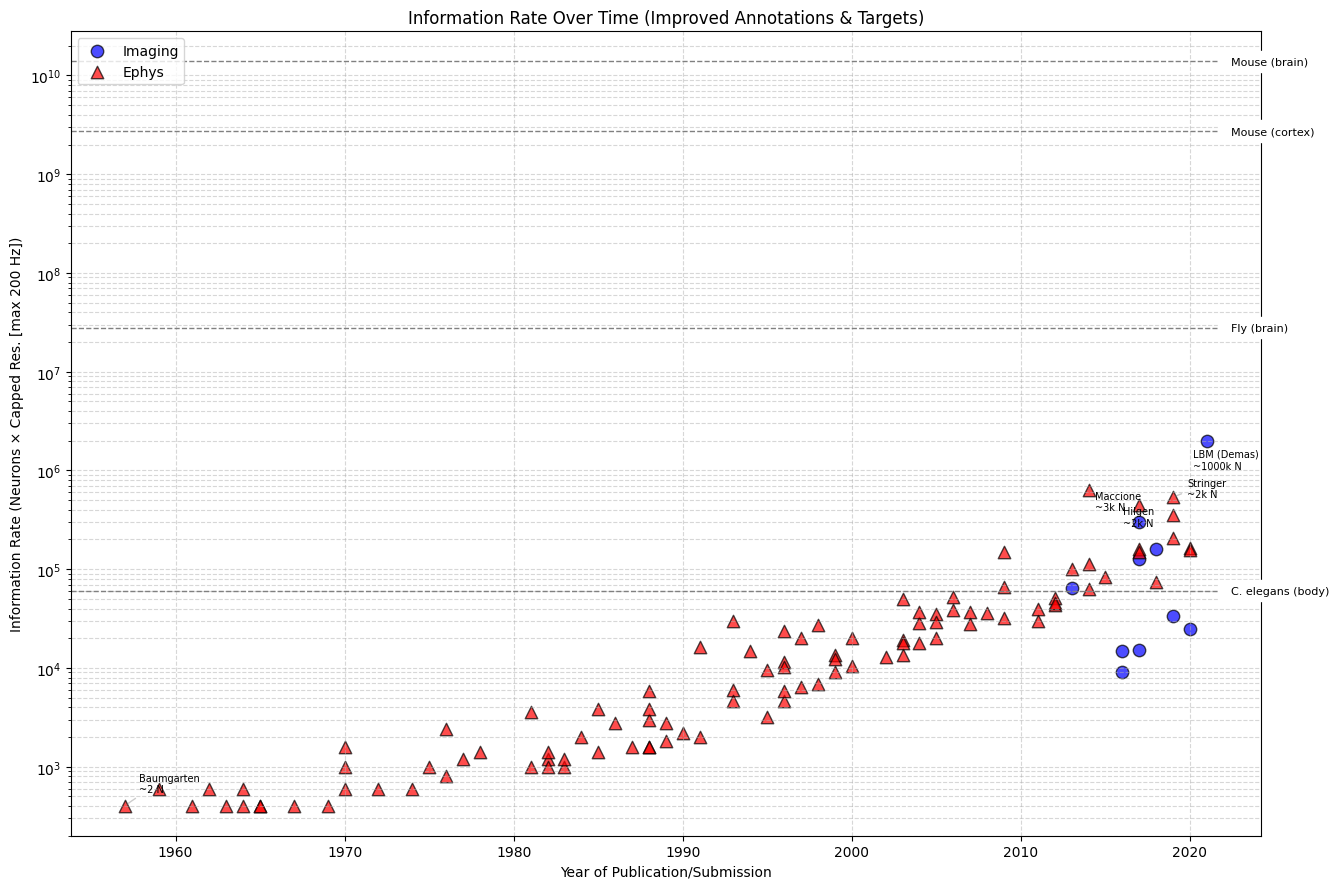

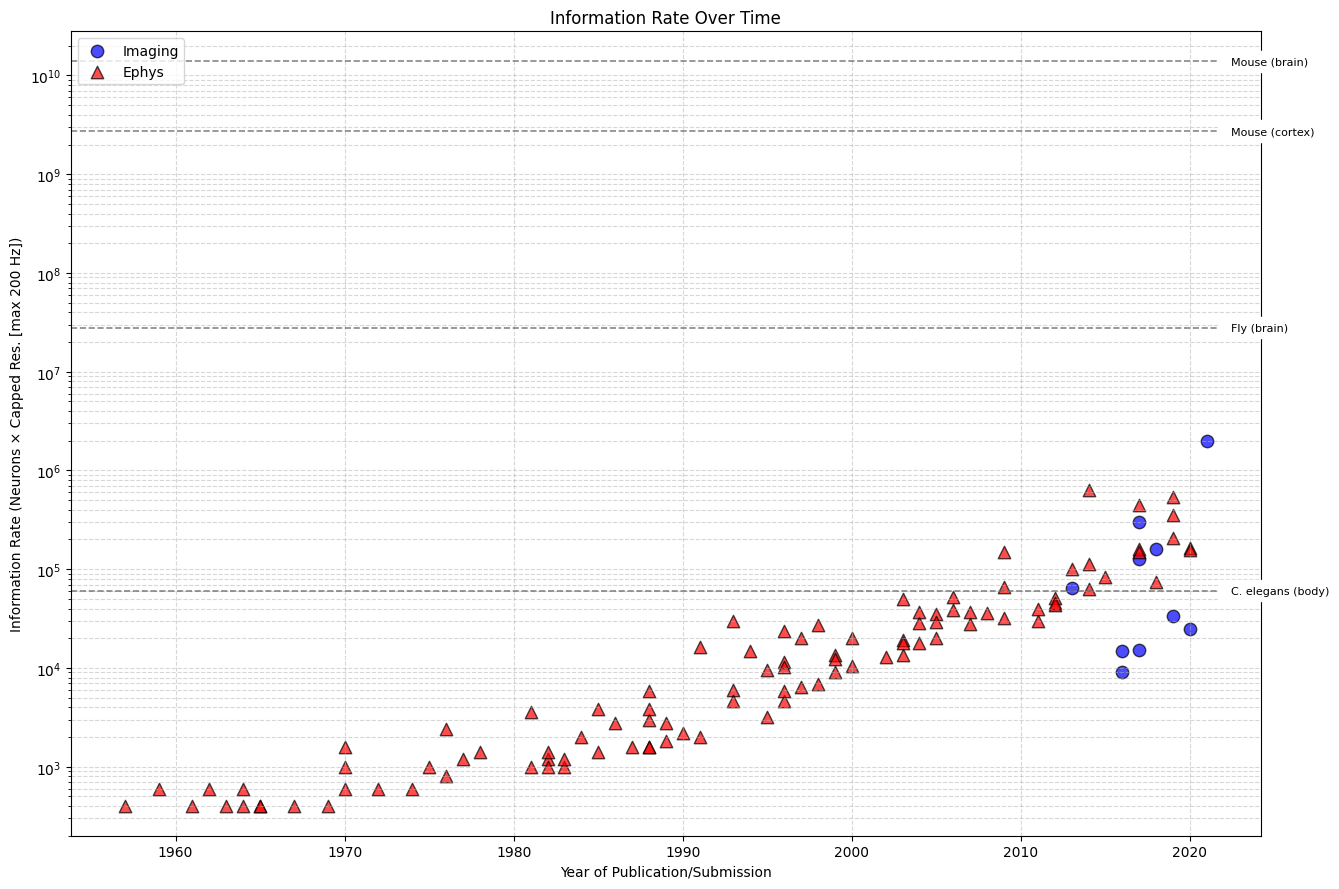

Plotted 10 imaging points and 101 ephys points for both plots.
Temporal resolution cap was 200.0 Hz.

Organism targets (Info Rate @ 200Hz):
C. elegans (body): 60,400
Fly (brain): 28,000,000
Mouse (cortex): 2,740,000,000
Mouse (brain): 14,000,000,000


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

csv_data = """Year,Month,normalized_best_yield,Authors,Method,source,Publication,Method Note,doi,initial_submission,normalized_technology,include,title,abstract,paper_type,channels,probes,stimulation,indicator,detailed_technology,detailed_yield,areas,free_behavior,normalized_species,is_neuropixels,normalized_chronic,normalized_quotes,date_float,cutting_edge
2003.0,6.0,35.0,Stosiek et al.,Imaging,Meijer,PNAS,,10.1073/pnas.1232232100,2003-06-01,calcium_imaging,,,,,,,,,,,,,,,,,2003.4134171132878,0
2005.0,1.0,100.0,Ohki et al.,Imaging,Meijer,Nature,calcium imaging in rat and cat cortex,10.1038/nature03274,2005-01-01,calcium_imaging,,,,,,,,,,,,,,,,,2005.001403177341,0
2010.0,4.0,58.0,Komiyama et al.,Imaging,Svoboda,Nature,average 55 neurons per experiment. First calcium imaging in behavior,10.1038/nature08897,2010-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.247233002731,0
2010.0,9.0,1585.0,Kerlin et al. ,Imaging,Urai,Neuron,"2p, mouse",10.1016/j.neuron.2010.08.002,2010-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.6661327748002,0
2010.0,9.0,106.0,O'Connor et al.,Imaging,Urai,Neuron,,10.1016/j.neuron.2010.08.026,2010-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.6661327748002,0
2010.0,10.0,100.0,Dombeck et al. ,Imaging,Urai,Nature Neuroscience,,10.1038/nn.2648,2010-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2010.74826998501,2
2011.0,1.0,200.0,Cheng et al. ,Imaging,Meijer,Nature Methods,,10.1038/nmeth.1552,2011-01-01,calcium_imaging,,,,,,,,,,,,,,,,,2011.000157429653,1
2012.0,8.0,250.0,Huber et al.,Imaging,Svoboda,Nature,First long-term calcium imaging experiment,10.1038/nature11039,2012-08-01,calcium_imaging,,,,,,,,,,,,,,,,,2012.5826676796923,1
2012.0,8.0,138.0,Petreanu et al.,Imaging,Svoboda,Nature,First imaging of axons to look at neurons defined by projections,10.1038/nature11321,2012-08-01,calcium_imaging,,,,,,,,,,,,,,,,,2012.5826676796923,2
2013.0,2.0,740.0,Ziv et al.,Imaging,Urai,Nature Neuroscience,,10.1038/nn.3329 ,2013-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.086442568978,1
2013.0,3.0,80000.0,Ahrens et al. ,Imaging,Urai,Nature Methods,light-sheet,10.1038/nmeth.2434,2013-03-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.1631039651738,0
2013.0,10.0,411.0,Cotton et al.,Imaging,Meijer,Frontiers in Neural Circuits,,10.3389/fncir.2013.00151,2013-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2013.7490160646694,2
2014.0,11.0,301.0,Lecoq et al. ,Imaging,Urai,Nature Neuroscience,,10.1038/nn.3867,2014-11-01,calcium_imaging,,,,,,,,,,,,,,,,,2014.8332272394368,3
2015.0,4.0,1800.0,Peron et al. ,Imaging,Urai,Neuron,2p,10.1016/j.neuron.2015.03.027,2015-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2015.2466511974922,1
2016.0,6.0,3000.0,Sofroniew et al.,Imaging,Urai,eLife,mouse mesoscope,10.7554/eLife.14472,2016-06-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.4157374894762,1
2016.0,10.0,3000.0,Prevedel et al.,Imaging,Rupprecht,Nature Methods,2p; 100s of neurons at 10Hz or 1000s of neurons at 3Hz,10.1038/nmeth.4040,2016-10-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.7497621443288,1
2016.0,12.0,1166.0,Kim et al.,Imaging,Urai,Cell Reports,mouse,10.1016/j.celrep.2016.12.004,2016-12-01,calcium_imaging,,,,,,,,,,,,,,,,,2016.9167744717552,4
2017.0,2.0,511.0,Song et al. ,Imaging,Charles,Nature Methods,2p; ~1K at 30Hz,10.1038/nmeth.4226,2017-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.0865247061884,6
,,10000.0,,,Mineault,,,10.1101/156786,2017-06-27,calcium_imaging,checked,Robustness of spike deconvolution for calcium imaging of neural spiking,"Calcium imaging is a powerful method to record the activity of neural populations, but inferring spike times from calcium signals is a challenging problem. We compared multiple approaches using multiple datasets with ground truth electrophysiology, and found that simple non-negative deconvolution (NND) outperformed all other algorithms. We introduce a novel benchmark applicable to recordings without electrophysiological ground truth, based on the correlation of responses to two stimulus repeats, and used this to show that unconstrained NND also outperformed the other algorithms when run on \""zoomed out\"" datasets of ~10,000 cell recordings. Finally, we show that NND-based methods match the performance of a supervised method based on convolutional neural networks, while avoiding some of the biases of such methods, and at much faster running times. We therefore recommend that spikes be inferred from calcium traces using simple NND, due to its simplicity, efficiency and accuracy.",methods,unknown,unknown,involved,"GCaMP6m, using viral vector injection for expression","Two-photon calcium imaging, with GCaMP6m indicator","Recorded approximately 10,000 neurons per session in the visual cortex of awake, head-fixed mice.",['primary visual cortex'],False,mouse,,False,"Two-photon calcium imaging can be used to monitor the activity of populations of up to 10,000 neurons.

All experimental procedures were conducted according to the UK Animals Scientific Procedures Act (1986). Experiments were performed at University College London under personal and project licenses released by the Home Office following appropriate ethics review.

For this analysis, we used some of our own datasets, in which the responses to an ensemble of full field drifting grating stimuli were simultaneously-recorded in ∼ 10,000 cells from primary visual cortex of awake mice.

NND models infer the most likely spike train 𝐬(𝑡), given the fluorescence timecourse 𝐅(𝑡), and a response kernel 𝐤.

Our new benchmark is to maximize the Spearman correlation 𝜎𝑠𝑡𝑖𝑚 of deconvolved responses to two repeats of an ensemble of stimuli.

Some mice were transgenic and expressed tdtomato in certain cell classes.

During the surgery we implanted a head-plate for later head-fixation, made a craniotomy with a cranial window implant for optical access, and, on relevant experiments, performed injections of the GCaMP6m virus with a beveled micropipette using a Nanoject II injector.",2017.4862591292087,1
2017.0,7.0,10000.0,Pachitariu et al.,Imaging,Meijer,bioRxiv,,10.1101/061507,2017-07-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.4972107572366,1
2017.0,9.0,80000.0,Cong et al. ,Imaging,Urai,eLife,light-sheet in freely moving fish,10.7554/eLife.28158,2017-09-01,calcium_imaging,,,,,,,,,,,,,,,,,2017.6669609916698,1
,,734.0,,,Mineault,,,10.1101/193383,2017-10-02,calcium_imaging,checked,OnACID: Online Analysis of Calcium Imaging Data in Real Time,"Optical imaging methods using calcium indicators are critical for monitoring the activity of large neuronal populations in vivo. Imaging experiments typically generate a large amount of data that needs to be processed to extract the activity of the imaged neuronal sources. While deriving such processing algorithms is an active area of research, most existing methods require the processing of large amounts of data at a time, rendering them vulnerable to the volume of the recorded data, and preventing realtime experimental interrogation. Here we introduce OnACID, an Online framework for the Analysis of streaming Calcium Imaging Data, including i) motion artifact correction, ii) neuronal source extraction, and iii) activity denoising and deconvolution. Our approach combines and extends previous work on online dictionary learning and calcium imaging data analysis, to deliver an automated pipeline that can discover and track the activity of hundreds of cells in real time, thereby enabling new types of closed-loop experiments. We apply our algorithm on two large scale experimental datasets, benchmark its performance on manually annotated data, and show that it outperforms a popular offline approach.",methods,unknown,unknown,unknown,"GCaMP, 2-photon",Online analysis of streaming calcium imaging data using OnACID framework in two-photon setups,Detected and tracked 727 to 734 neurons in 50-65 minute long sessions.,"['hippocampal', 'parietal cortex']",unknown,mouse,,True,"Calcium imaging methods continue to gain traction among experimental neuroscientists due to their capability of monitoring large targeted neuronal populations across multiple days or weeks with decisecond temporal and single-neuron spatial resolution.

The fine spatiotemporal resolution of calcium imaging comes at a data rate cost; a typical two-photon (2p) experiment on a 512×512 pixel large FOV imaged at 30Hz, generates ∼50GB of data (in 16-bit integer format) per hour.

Our framework is highly scalable with minimal memory requirements, as it processes the data in a streaming fashion one frame at a time, while keeping in memory a set of low dimensional sufficient statistics and a small minibatch of the last data frames.

We apply OnACID to two large-scale (50 and 65 minute long) mouse in vivo 2p datasets; our algorithm can find and track hundreds of neurons faster than real-time, and outperforms the CNMF algorithm of [28] benchmarked on multiple manual annotations using a precision-recall framework.

Application to in vivo 2p mouse hippocampal data: Next we considered a larger scale (90K frames, 480× 480 pixels) real 2p calcium imaging dataset taken at 30Hz (i.e., 50 minute experiment). Motion artifacts were corrected prior to the analysis described below. The online algorithm was initialized on the first 1000 frames of the dataset using a Python implementation of the CNMF algorithm found in the CaImAn package [14]. During initialization 139 active sources were detected; by the end of all 90K frames, 727 active sources had been detected and tracked (5 of which were discarded due to their small size).

The first 3000 frames were used for initialization during which the CNMF algorithm found 442 neurons, before switching to OnACID, which by the end of the experiment found a total of 752 neurons (734 after filtering for size).

OnACID can detect and track neurons with very sparse spiking over the course of the entire 50 minute experiment (Fig. 3C-top), and produce traces that are highly correlated with their offline counterparts.",2017.7518361088867,9
,,10000.0,,,Mineault,,,10.1101/434035,2018-10-03,calcium_imaging,checked,Wide and Deep Imaging of Neuronal Activities by a Wearable NeuroImager Reveals Premotor Activity in the Whole Motor Cortex,"Wearable technologies for functional whole brain imaging in freely moving animals would advance our understanding of cognitive processing and adaptive behavior. Fluorescence imaging can visualize the activity of individual neurons in real time, but conventional microscopes have limited sample coverage in both the width and depth of view. Here we developed a novel head-mounted laser camera (HLC) with macro and deep-focus lenses that enable fluorescence imaging at cellular resolution for comprehensive imaging in mice expressing a layer- and cell type-specific calcium probe. We visualized orientation selectivity in individual excitatory neurons across the whole visual cortex of one hemisphere, and cell assembly expressing the premotor activity that precedes voluntary movement across the motor cortex of both hemispheres. Including options for multiplex and wireless interfaces, our wearable, wide- and deep-imaging HLC technology could enable simple and economical mapping of neuronal populations underlying cognition and behavior.",methods,,,unknown,"CaMK2a-G-CaMP7, calcium imaging with head-mounted laser camera (HLC), 2-photon microscopy","head-mounted laser camera (HLC) for wide and deep-field calcium imaging at cellular resolution, 2-photon microscopy used for some experiments","Approximately 10,000 neurons per session in a field of view.","['visual cortex', 'motor cortex']",True,mouse,,True,"Here we developed a novel head-mounted laser camera (HLC) with macro and deep-focus lenses that enable fluorescence imaging at cellular resolution for comprehensive imaging in mice expressing a layer- and cell type-specific calcium probe.

We visualized orientation selectivity in individual excitatory neurons across the whole visual cortex of one hemisphere, and cell assembly expressing the premotor activity that precedes voluntary movement across the motor cortex of both hemispheres.

Importantly, since the wearable HLC is robustly fixed to the mouse skull, normal body movements do not perturb the wide-view fluorescence imaging...

The number of blinking spots representing presumptive cellular elements in the field of view in Fig. 1d was estimated at approximately 10,000 (Supplementary Fig. 3, Supplementary Movie 3).

We confirmed that the imaging of neuronal activities by the HLC attached to the head of freely moving mice causes no significant increase of stress, and does not affect the locomotor activity and the behavioral pattern (Supplementary Fig. 2).

The findings indicate that the HLC can acquire fluorescence signals deep in the cerebral cortex at high precision compared to a conventional wide-field fluorescence microscope.

As two examples in the present study, CaMK2a-G-CaMP7 mice expressing G-CaMP specifically in excitatory neurons...

We developed what we term “restriction motion experiment” to easily detect the activity associated with a specific movement...

In (f), the fluorescence images of the anesthetized mouse were taken by 2-photon microscopy.",2018.7539100734443,4
,,4600.0,,,Mineault,,,10.1101/441014,2018-10-12,calcium_imaging,checked,Cellular organization of visual information processing channels in the mouse visual cortex,"Visual processing and behavior depend on specialized neural representations and information channels that encode distinct visual information and enable distinct computations. Our understanding of the neural substrate, however, remain severely limited by sparse recordings and the restricted range of visual areas and visual stimuli considered. We characterized in the mouse the multidimensional spatiotemporal tuning properties of > 30,000 layer 2/3 pyramidal neurons across seven areas of the cortex. The dataset reveals population specialized for processing of oriented and non-oriented contrast, spatiotemporal frequency, and motion speed. Areal analysis reveals profound functional diversity and specificity as well as highly specific representations of visual processing channels in distinct visual areas. Clustering analysis shows a branching of visual representations along the posterior to anterior axis, and between lateral and dorsal areas. Overall, this dataset provides a cellular-resolution atlas for understanding organizing principles underlying sensory representations across the cortex.

SummaryVisual representations and visual channels are the cornerstones of mammalian visual processing and critical for a range of life sustaining behaviors. However, the lack of data sets spanning multiple visual areas preclude unambiguous identification of visual processing streams and the sparse, singular recording data sets obtained thus far are insufficient to reveal the functional diversity of visual areas and to study visual information channels. We characterized the tunings of over 30,000 cortical excitatory neurons from 7 visual areas to a broad array of stimuli and studied their responses in terms of their ability to encode orientation, spatiotemporal contrast and visual motion speed. We found all mouse visual cortical areas convey diverse information but show distinct biases in terms of numbers of neurons tuned to particular spatiotemporal features. Neurons in visual areas differ in their spatiotemporal tuning but also in their relative response to oriented and unoriented contrast. We uncovered a population that preferentially responds to unoriented contrast and shows only weak responses to oriented stimuli. This population is strongly overrepresented in certain areas (V1, LM and LI) and underrepresented in others (AL, RL, AM, and PM). Spatiotemporal tunings are broadly distributed in all visual areas indicating that all areas have access to broad spatiotemporal information. However, individual areas show specific biases. While V1 is heavily biased in favor of low spatial and temporal frequencies, area LM responds more strongly to mid-range frequencies. Areas PM and LI are biased in favor of slowly-varying high-resolution signals. By comparison, anterior areas AL, RL and AM are heavily biased in favor of fast-varying, low to mid spatial frequency signals. Critically, theses biases express themselves in vastly different number of cells tuned to particular features, suggesting differential sampling of visual processing channels across areas. Comparing across areas, we found divergent visual representations between anterior and posterior areas, and between lateral and dorsal areas, suggesting the segregated organization of cortical streams for distinct information processing.",results,unknown,unknown,unknown,Thy1-GCaMP6s,Two-photon calcium imaging,"Recorded 40,000 neurons in total across multiple sessions using two-photon calcium imaging. A subsample of 2000 neurons was used for certain analyses.","['V1', 'LM', 'AL', 'RL', 'AM', 'PM', 'LI']",False,mouse,,False,"Using two-photon calcium imaging and stochastic visual stimuli, we catalogued the response properties of a dense sample of 40,000 neurons in V1 and six secondary visual areas of awake mice.

We could quantitatively determine the degree to which areas in the mouse visual cortex are specialized for distinct spatiotemporal features.

We undertook a comprehensive functional characterization of layer 2/3 neurons in V1 and six higher visual areas in awake mice using two-photon calcium imaging.

We simultaneously recorded neuronal activities in large volumes (0.8 x 0.8 x 0.15 mm3) of layer 2/3 of the targeted visual cortical areas.

We obtained a subsample of 2000 neurons with random selection, each neuron yielded a vector of peak-normalized responses to ISO and ANISO stimuli.

Neurons responsive to isotropic noise stimuli.

The animal was head-clamped on a platform while consciously viewing the visual stimuli on the display.

Thy1-GCaMP6s-WPRE mice (n = 10, 5 male and 5 female)

Each stimulus condition was presented for 4 second, intertwined with 4-second equiluminent gray screen. In each of the four pseudorandomized trials, a different seed was used to generate unique random noise, resulting in different phases yet constant frequency spectra across trials.

We recorded cellular responses to spectral noise stimuli in layer 2/3 of V1 and six higher visual areas (LM: lateromedial; AL: anterolateral; RL: rostrolateral; AM: anteromedial; PM: posteromedial; LI: laterointermediate)",2018.7785512365072,4
,,4692.0,,,Mineault,,,10.1101/452672,2018-10-25,calcium_imaging,checked,Stimulus domain transfer in recurrent models for large scale cortical population prediction on video,"To better understand the representations in visual cortex, we need to generate better predictions of neural activity in awake animals presented with their ecological input: natural video. Despite recent advances in models for static images, models for predicting responses to natural video are scarce and standard linear-nonlinear models perform poorly. We developed a new deep recurrent network architecture that predicts inferred spiking activity of thousands of mouse V1 neurons simulta-neously recorded with two-photon microscopy, while accounting for confounding factors such as the animals gaze position and brain state changes related to running state and pupil dilation. Powerful system identification models provide an opportunity to gain insight into cortical functions through in silico experiments that can subsequently be tested in the brain. However, in many cases this approach requires that the model is able to generalize to stimulus statistics that it was not trained on, such as band-limited noise and other parameterized stimuli. We investigated these domain transfer properties in our model and find that our model trained on natural images is able to correctly predict the orientation tuning of neurons in responses to artificial noise stimuli. Finally, we show that we can fully generalize from movies to noise and maintain high predictive performance on both stimulus domains by fine-tuning only the final layers weights on a network otherwise trained on natural movies. The converse, however, is not true.",methods,unknown,unknown,unknown,unknown,two-photon microscopy with a large-field-of-view mesoscope,3 sets of 1344-4692 simultaneously recorded deconvolved fluorescence traces from two-photon scans,['V1'],unknown,mouse,,,"We developed a new deep recurrent network architecture that predicts inferred spiking activity of thousands of mouse V1 neurons simultaneously recorded with two-photon microscopy...

Our data consists of three sets of 1344-4692 simultaneously recorded deconvolved fluorescence traces from two-photon scans in mouse visual cortex area V1 L2/3, collected from three animals using a large-field-of-view mesoscope.",2018.814144027598,5
2018.0,11.0,80000.0,Chen et al. ,Imaging,Urai,Neuron,"zebrafish, light-sheet",10.1016/j.neuron.2018.09.042 ,2018-11-01,calcium_imaging,,,,,,,,,,,,,,,,,2018.833309376647,2
2019.0,4.0,11262.0,Stringer et al. ,Imaging,Urai,Science,2p,10.1126/science.aav7893,2019-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2019.2467333347022,3
2019.0,4.0,11907.0,Weisenburger et al.,Imaging,Urai,Cell,,10.1016/j.cell.2019.03.011,2019-04-01,calcium_imaging,,,,,,,,,,,,,,,,,2019.2467333347022,3
,,20000.0,,,Mineault,,,10.1101/679324,2019-06-21,calcium_imaging,checked,High precision coding in mouse visual cortex,"Single neurons in visual cortex provide unreliable measurements of visual features due to their high trial-to-trial variability. It is not known if this \""noise\"" extends its effects over large neural populations to impair the global encoding of stimuli. We recorded simultaneously from [~]20,000 neurons in mouse primary visual cortex (V1) and found that the neural populations had discrimination thresholds of [~]0.34{degrees} in an orientation decoding task. These thresholds were nearly 100 times smaller than those reported behaviorally in mice. The discrepancy between neural and behavioral discrimination could not be explained by the types of stimuli we used, by behavioral states or by the sequential nature of perceptual learning tasks. Furthermore, higher-order visual areas lateral to V1 could be decoded equally well. These results imply that the limits of sensory perception in mice are not set by neural noise in sensory cortex, but by the limitations of downstream decoders.",results,unknown,unknown,unknown,"GCaMP6s, TetO-GCaMP6s x Emx1-IRES-Cre mice, 2-photon",multi-plane two-photon calcium imaging using a custom-built 2-photon mesoscope,"19,665 ± 3,062 neurons per recording (s.d., n=6)",['visual cortex'],True,mouse,,False,"We recorded simultaneously from ∼20,000 neurons in mouse visual cortex

We recorded neural activity from visual cortex using multi-plane two-photon calcium imaging

We obtained 19,665 ± 3,062 (s.d., n=6) neurons per recording using the processing pipeline Suite2p

We performed experiments on three mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s x Emx1-IRES-Cre mice

We also performed experiments on three wild-type C57 mice in 17 recordings

We used a custom-built 2-photon mesoscope [57] to record neural activity, and ScanImage [58] for data acquisition, obtaining 18,496 ± 3,441 (s.d., n=32) neurons in the recordings

Surgical methods were similar to those described elsewhere [31]. Briefly, surgeries were performed in adult mice (P35P125) under isoflurane anesthesia (5% for induction, 1-2% during the surgery) in a stereotaxic frame

The mice were free to run on an air-floating ball",2019.4685038022683,3
,,29000.0,,,Mineault,,,10.1101/745323,2019-08-23,calcium_imaging,checked,A global map of orientation tuning in mouse visual cortex,"In primates and most carnivores, neurons in primary visual cortex are spatially organized by their functional properties. For example, neurons with similar orientation preferences are grouped together in iso-orientation domains that smoothly vary over the cortical sheet. In rodents, on the other hand, neurons with different orientation preferences are thought to be spatially intermingled, a feature which has been termed \""salt-and-pepper\"" organization. The apparent absence of any systematic structure in orientation tuning has been considered a defining feature of the rodent visual system for more than a decade, with broad implications for brain development, visual processing, and comparative neurophysiology. Here, we revisited this question using new techniques for wide-field two-photon calcium imaging that enabled us to collect nearly complete population tuning preferences in layers 2-4 across a large fraction of the mouse visual hierarchy. Examining the orientation tuning of these hundreds of thousands of neurons, we found a global map spanning multiple visual cortical areas in which orientation bias was organized around a single pinwheel centered in V1. This pattern was consistent across animals and cortical depth. The existence of this global organization in rodents has implications for our understanding of visual processing and the principles governing the ontogeny and phylogeny of the visual cortex of mammals.",results,,,false,"GCaMP6s, two-photon",two-photon calcium imaging,"Over 17,000–29,000 orientation-tuned cells per animal; 49,000 - 68,000 somas segmented per animal; approximately 4600 to 6300 soma per scan","['primary visual cortex', 'anteromedial', 'posteromedial', 'rostrolateral', 'anterolateral', 'lateromedial']",False,mouse,,False,"We recorded visual responses from GCaMP6s-expressing excitatory neurons located in L2/3–L4 of primary visual cortex and surrounding higher visual areas in eight mice.

Two-photon calcium imaging was used to record neuronal activity in a 1800×1800×250− 350µm3 volume by placing sequential scans at 25µm increments in depth...

...resulting in over 17,000–29,000 orientation-tuned cells per animal (35.2–49.0%).

In total, over 49,000 - 68,000 somas were segmented per animal.

This resulted in 4600 to 6300 soma masks per scan up to 350µm from the surface, and 1900 to 5300 per scan from 350−500µm from the surface.

Each mouse was allowed to recover for at least 3 days prior to the first experimental imaging session.

Two-photon Imaging. Mice were head-mounted above a cylindrical treadmill and calcium imaging was performed...

To assure we count cells only once, we subsample our recorded cells based on proximity in 3-d space...",2019.6409919437087,3
2020.0,7.0,16000.0,Ota et al. ,Imaging,Urai,bioRxiv,,10.1101/2020.07.14.201699,2020-07-01,calcium_imaging,,,,,,,,,,,,,,,,,2020.497956836896,5
2021.0,2.0,1000000.0,Demas et al. ,Imaging,Urai,bioRxiv,,10.1101/2021.02.21.432164,2021-02-01,calcium_imaging,,,,,,,,,,,,,,,,,2021.0866068433986,0
,,75000.0,,,Mineault,,,10.1101/2021.07.28.454025,2021-07-29,calcium_imaging,checked,Functional connectomics spanning multiple areas of mouse visual cortex,"To understand the brain we must relate neurons functional responses to the circuit architecture that shapes them. Here, we present a large functional connectomics dataset with dense calcium imaging of a millimeter scale volume. We recorded activity from approximately 75,000 neurons in primary visual cortex (VISp) and three higher visual areas (VISrl, VISal and VISlm) in an awake mouse viewing natural movies and synthetic stimuli. The functional data were co-registered with a volumetric electron microscopy (EM) reconstruction containing more than 200,000 cells and 0.5 billion synapses. Subsequent proofreading of a subset of neurons in this volume yielded reconstructions that include complete dendritic trees as well the local and inter-areal axonal projections that map up to thousands of cell-to-cell connections per neuron. Here, we release this dataset as an open-access resource to the scientific community including a set of tools that facilitate data retrieval and downstream analysis. In accompanying papers we describe our findings using the dataset to provide a comprehensive structural characterization of cortical cell types1-3 and the most detailed synaptic level connectivity diagram of a cortical column to date2, uncovering unique cell-type specific inhibitory motifs that can be linked to gene expression data4. Functionally, we identify new computational principles of how information is integrated across visual space5, characterize novel types of neuronal invariances6 and bring structure and function together to decipher a general principle that wires excitatory neurons within and across areas7, 8.",results,unknown,unknown,visual stimuli,GCaMP6s in excitatory neurons via SLC17a7-Cre and Ai162,two-photon random access mesoscope (2P-RAM),"An estimated 75,909 unique functionally-imaged neurons from multiple scans, indicating consolidation from segmented images.","['VISp', 'VISrl', 'VISal', 'VISlm']",False,mouse,,True,"The value of an integrated approach for understanding the neocortex by combining functional characterization of single neuron activity with the underlying circuit architecture has been understood since the dawn of modern neuroscience. However, in practice, anatomical connectivity and physiology have been studied mostly separately.

Here we present a unique functional connectomics dataset that contains calcium imaging of an estimated 75,000 neurons from primary visual cortex (VISp) and three higher visual areas (VISrl, VISal and VISlm), that were recorded while a mouse viewed natural movies and parametric stimuli.

The functional data were co-registered with electron microscopy (EM) data of the same volume which were automatically segmented, reconstructing more than 200,000 cells (neuronal and non-neuronal) and 524 million synapses.

The largest proofread excitatory axon reached a length of 19 mm and formed 1893 synapses, while the largest inhibitory axon formed 10081 synapses.

Functional Data Neurophysiology Overview The calcium imaging data includes the single-cell responses of an estimated 75,000 excitatory neurons to a variety of visual stimuli across multiple visual areas spanning cortical layers 2 through 5.

From the calcium images, we have extracted the responses of approximately 75,000 pyramidal cells to the visual stimuli using a constrained non-negative matrix factorization approach.

Each scan was composed of multiple imaging planes, and leveraged the wide field-of-view of the two-photon random access mesoscope (2P-RAM) (Sofroniew et al. 2016) to capture two adjacent overlapping 620 µm-wide fields at each depth.

Using a greedy consolidation algorithm based on 3D proximity, we estimate that the functional imaging volume contains 75,909 unique functionally-imaged neurons consolidated from 115,372 segmented somatic masks, with many neurons imaged in two or more scans.

During imaging, the animal was head-restrained, and the stimulus was presented to the left visual field.

Calcium imaging was performed from P75 to P81 in a transgenic mouse expressing GCaMP6s in excitatory neurons via SLC17a7-Cre and Ai162 (Daigle et al. 2018).",2021.5739542906426,4
,,10096.0,,,Mineault,,,10.1101/2021.09.20.461015,2021-09-21,calcium_imaging,checked,Large-scale two-photon calcium imaging in freely moving mice,"We developed a miniaturized two-photon microscope (MINI2P) for fast, high-resolution, multiplane calcium imaging of over 1,000 neurons at a time in freely moving mice. With a microscope weight below 3g and a highly flexible connection cable, MINI2P allowed imaging to proceed with no impediment of behavior in half-hour free-foraging trials compared to untethered, unimplanted animals. The improved cell yield was achieved through a new optical system design featuring an enlarged field of view (FOV) and a new micro-tunable lens with increased z-scanning range and speed that allowed for fast and stable imaging of multiple, interleaved planes as well as 3D functional imaging. A novel technique for successive imaging across multiple, adjacent FOVs enabled recordings from more than 10,000 neurons in the same animal. Large-scale proof-of-principle data were obtained from cell populations in visual cortex, medial entorhinal cortex, and hippocampus, revealing spatial tuning of cells in all areas, including visual cortex.

HighlightsWe developed a lightweight 2-photon miniscope for imaging in freely-foraging mice

Activity can be monitored in volumes of over 1,000 visual or entorhinal-cortex cells

A new z-scanning module allows fast imaging across multiple interleaved planes

Successive imaging from adjacent regions enables imaging from more than 10,000 cells",methods,,,unknown,"GCaMP6s, transgenic mouse line, 2-photon","MINI2P, next-generation 2P miniscope enabling true 3D functional imaging across large populations","10,096 non-repeated neurons with average yields per FOV around 404 neurons","['visual cortex', 'medial entorhinal cortex', 'CA1']",True,mouse,,True,"We present a new generation of 2P miniscopes, MINI2P, that overcomes the limits of previous versions by both meeting requirements for fatigue-free exploratory behavior during extended recording periods and satisfying demands for further increasing the cell yield by an order of magnitude.

We used MINI2P to obtain large scale recordings of dense populations of neurons in the medial entorhinal cortex (MEC) and the neighboring parasubiculum (PAS).

With these three strategies for increasing cell yield, MINI2P could more than double the number of simultaneously recorded cells compared to previous 2P miniscope versions, and the number could be increased more than tenfold over successive recordings.

MINI2P is controlled by open-source 2P acquisition software (ScanImage).

MINI2P enables large-scale high-resolution imaging in diverse brain structures.

We demonstrated that hundreds of identifiable grid cells could be recorded simultaneously from a single freely-moving mouse with MINI2P.

We were able to extract in total 10,096 non-repeated layer 2/3 excitatory neurons via Suite2p, yielding an average of 404 cells per 500 × 500 μm2 FOV across the two planes.

MINI2P allows animals to behave with the same level of flexibility as with 1P miniscopes, despite the added 2P hardware. Mice can carry MINI2P microscopes on their head for half an hour or more without interruptions, while they roam freely in open environments.

This first successful demonstration of large-population, high-resolution 3D functional imaging with 2P miniscopes opens the door to studies of 3D neuronal calcium dynamics in freely-moving animals.

The species studied were mice through most of the experiments.

We were able to detect hundreds of neurons in a single FOV in all three regions (592 cells in VC, 404 in MEC, and 464 in CA1).

Experiments were performed according to the Norwegian Animal Welfare Act using wild-type (C57BL/6JBomTac) as well as transgenic mice, which express GCaMP6s ubiquitously under control of the CaMKII promoter.

MINI2P microscope enables true 3D functional imaging. We supplement these advances with a novel technique where adjacent FOVs are stitched together over successive recordings, increasing the yield of successively recorded cells to over 10,000 in one animal.",2021.7218012690198,10
,,10500.0,,,Mineault,,,10.1101/2023.03.20.533476,2023-03-21,calcium_imaging,checked,Mesoscale volumetric light field (MesoLF) imaging of neuroactivity across cortical areas at 18 Hz,"Various implementations of mesoscopes provide optical access for calcium imaging across multi-millimeter fields-of-view (FOV) in the mammalian brain. However, capturing the activity of the neuronal population within such FOVs near-simultaneously and in a volumetric fashion has remained challenging since approaches for imaging scattering brain tissues typically are based on sequential acquisition. Here, we present a modular, mesoscale light field (MesoLF) imaging hardware and software solution that allows recording from thousands of neurons within volumes of  4000 x 200 {micro}m, located at up to 400 {micro}m depth in the mouse cortex, at 18 volumes per second. Our optical design and computational approach enable up to hour-long recording of [~]10,000 neurons across multiple cortical areas in mice using workstation-grade computing resources.",methods,,,whisker stimulation,GCaMP,"MesoLF, Mesoscale Light Field imaging with seeded iterative demixing","More than 10,500 active neurons recorded per session, per mouse","['posterior parietal', 'primary somatosensory', 'primary visual', 'anteromedial visual', 'retrosplenial']",False,mouse,,False,"We present a modular, mesoscale light field (MesoLF) imaging hardware and software solution that allows recording from thousands of neurons within volumes of 4000 × 200 µm, located at up to 400 µm depth in the mouse cortex, at 18 volumes per second.

Our design and computational approach enable up to hour-long recording of ~10,000 neurons across multiple cortical areas in mice using workstation-grade computing resources.

Using a modular, Mesoscale Light Field (MesoLF) imaging hardware and software solution, we demonstrate volumetric recording from more than 10,500 active neurons across different regions of the mouse cortex within different volumes of 4000 × 200 µm positioned at depths up to ~400 µm.

Performing up to hour-long calcium imaging in the cortex of head-restrained mice.

We verified the in vivo performance of our high-resolution MesoLF optical module and signal extraction pipeline by performing up to hour-long calcium imaging in the cortex of head-restrained mice.

The imaged volume contained all or the majority of the posterior parietal, primary somatosensory, primary visual, anteromedial visual, and retrosplenial cortical area.",2023.2166984948356,10
,,70000.0,,,Mineault,,,10.1101/2023.07.25.550571,2023-07-28,calcium_imaging,checked,Rastermap: a discovery method for neural population recordings,"Neurophysiology has long progressed through exploratory experiments and chance discoveries. Anecdotes abound of researchers setting up experiments while listening to spikes in real time and observing a pattern of consistent firing when certain stimuli or behaviors happened. With the advent of large-scale recordings, such close observation of data has become harder because high-dimensional spaces are impenetrable to our pattern-finding intuitions. To help ourselves find patterns in neural data, our lab has been openly developing a visualization framework known as ""Rastermap"" over the past five years. Rastermap takes advantage of a new global optimization algorithm for sorting neural responses along a one-dimensional manifold. Displayed as a raster plot, the sorted neurons show a variety of activity patterns, which can be more easily identified and interpreted. We first benchmark Rastermap on realistic simulations with multiplexed cognitive variables. Then we demonstrate it on recordings of tens of thousands of neurons from mouse visual and sensorimotor cortex during spontaneous, stimulus-evoked and task-evoked epochs, as well as on whole-brain zebrafish recordings, widefield calcium imaging data, population recordings from rat hippocampus and artificial neural networks. Finally, we illustrate high-dimensional scenarios where Rastermap and similar algorithms cannot be used effectively.",methods,,,visual,GCaMP6s,Two-photon calcium imaging with a custom-built mesoscope and GCaMP6s expression using TetO-GCaMP6s x Emx1-IRES-Cre mice.,"Up to 70,000 simultaneously-recorded neurons in sessions involving mice behaving freely on an air-floating ball.","['visual cortex', 'sensorimotor cortex', 'anterior motor cortex']",True,mouse,,True,"We have so far illustrated Rastermap on large-scale calcium-imaging data from mouse cortex.

In this section, we show that Rastermap can be applied more broadly to recordings from other organisms, with fewer recorded neurons and even on bulk neural activity such as from widefield one-photon imaging.

we illustrate Rastermap on a variety of neural datasets from different species (mouse, rat, zebrafish) as well as on artificial neural networks.

we apply it to a variety of datasets. We start in this section and the next, with datasets collected in our own lab, using two-photon calcium imaging of large neural populations of up to 70,000 simultaneously-recorded neurons at sampling frequencies of ~3.2 Hz.

The mice were free to run on an air-floating ball.

3 recordings in 3 mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s x Emx1-IRES-Cre mice.

Surgeries were performed in adult mice (P35–P125) following procedures outlined in [31]. In brief, mice were anesthetized with Isoflurane while a craniotomy was performed.

We used a custom-built 2-photon mesoscope to record neural activity, and ScanImage for data acquisition.

The mice were acclimatized to running on the ball for several sessions before imaging, and one mouse was trained on a virtual reality task for two weeks prior to the recording.

When fewer neurons are recorded (<200), Rastermap can skip the k-means clustering step and directly order the neurons according to their asymmetric cross-correlogram peaks. This also allows us to skip the upsampling step, thereby simplifying the algorithm substantially.

We used recordings where different optomotor paradigms were presented using different visual stimulation conditions.",2023.569888498737,5
,,970546.0,,,Mineault,,,10.1101/2024.01.15.575721,2024-01-16,calcium_imaging,checked,"Simultaneous, cortex-wide and cellular-resolution neuronal population dynamics reveal an unbounded scaling of dimensionality with neuron number","The brains remarkable properties arise from collective activity of millions of neurons. Widespread application of dimensionality reduction to multi-neuron recordings implies that neural dynamics can be approximated by low-dimensional ""latent"" signals reflecting neural computations. However, what would be the biological utility of such a redundant and metabolically costly encoding scheme and what is the appropriate resolution and scale of neural recording to understand brain function? Imaging the activity of one million neurons at cellular resolution and near-simultaneously across mouse cortex, we demonstrate an unbounded scaling of dimensionality with neuron number. While half of the neural variance lies within sixteen behavior-related dimensions, we find this unbounded scaling of dimensionality to correspond to an ever-increasing number of internal variables without immediate behavioral correlates. The activity patterns underlying these higher dimensions are fine-grained and cortex-wide, highlighting that large-scale recording is required to uncover the full neural substrates of internal and potentially cognitive processes.",results,unknown,unknown,unknown,GCaMP6s or GCaMP6f,"Light Beads Microscopy (LBM), a volumetric calcium imaging technique capable of recording up to one million neurons.","Recorded between 6,519 to 970,546 neurons. Chronic recording via cranial window.","['mouse dorsal cortex', 'including visual, somatosensory, posterior parietal, retrosplenial, and motor cortices']",False,mouse,,True,"Imaging the activity of one million neurons at cellular resolution and near-simultaneously across mouse cortex...

...recording the dynamics of up to one million neurons distributed across different depths and regions of mouse dorsal cortex using light beads microscopy (LBM)...

...using light beads microscopy (LBM) (Demas et al., 2021) during spontaneous and uninstructed behavior in head-fixed mice.

Neural activity across these cortical regions was imaged for one hour while animals were free to move on a linear treadmill and exhibited epochs of various spontaneous and uninstructed behaviors...

...providing a unique opportunity to assess the geometry and spatiotemporal structure of cortex-wide neuronal dynamics.

The species studied in this paper is mice, specifically transgenic mice expressing the genetically encoded calcium indicator GCaMP6s or GCaMP6f...

The full neural state space was measured from 6,519 to 970,546 near-simultaneously recorded neurons, respectively...

To investigate the geometry and dimensionality of spontaneous neuronal population dynamics across different depths and regions of the dorsal cortex of the mouse...

We imaged transgenic mice expressing the genetically encoded calcium indicator GCaMP6s or GCaMP6f...

...chronic cranial window implantations (see STAR Methods for details) allowed for optical access to the majority of the dorsal cortical volume...

Mice were head-fixed on a low-friction, self-driven belt treadmill...",2024.0408085039392,1
,,90000.0,,,Mineault,,,10.1101/2024.02.25.581990,2024-02-27,calcium_imaging,checked,Distinct streams for supervised and unsupervised learning in the visual cortex,"Representation learning in neural networks may be implemented with supervised or unsupervised algorithms, distinguished by the availability of feedback. In sensory cortex, perceptual learning drives neural plasticity, but it is not known if this is due to supervised or unsupervised learning. Here we recorded populations of up to 90,000 neurons simultaneously from the primary visual cortex (V1) and higher visual areas (HVA), while mice learned multiple tasks as well as during unrewarded exposure to the same stimuli. Similar to previous studies, we found that neural changes in task mice were correlated with their behavioral learning. However, the neural changes were mostly replicated in mice with unrewarded exposure, suggesting that the changes were in fact due to unsupervised learning. The neural plasticity was concentrated in the medial HVAs and obeyed visual, rather than spatial, learning rules. In task mice only, we found a ramping reward prediction signal in anterior HVAs, potentially involved in supervised learning. Our neural results predict that unsupervised learning may accelerate subsequent task learning, a prediction which we validated with behavioral experiments.",results,unknown,unknown,unknown,"GCaMP6s in TetO-GCaMP6s x Emx1-IRES-Cre mice, two-photon",Two-photon mesoscope using GCaMP6s indicator,"Recording from 20,547-89,577 neurons per session in 79 recordings across 15 mice","['primary visual cortex (V1)', 'higher visual areas (HVA)']",False,mouse,,,"Here we recorded populations of up to 90,000 neurons simultaneously from the primary visual cortex (V1) and higher visual areas (HVA), while mice learned multiple tasks as well as during unrewarded exposure to the same stimuli.

Before and after learning, we recorded from large neural populations across many visual areas simultaneously using a two-photon mesoscope [26] (Figure 1e). We ran Suite2p on this data to obtain the activity traces from 20,547-89,577 neurons in each recording [27].

Mice were head-fixed...We used a custom-built 2-photon mesoscope to record neural activity, and ScanImage for data acquisition.

Calcium imaging data was processed using Suite2p [27], available at www.github.com/MouseLand/suite2p. Suite2p performs motion correction, ROI detection, cell classification, neuropil correction, and spike deconvolution as described elsewhere [55].

Mice were acclimatized to running on the ball several sessions before training and imaging.

We performed 79 recordings in 15 mice bred to express GCaMP6s in excitatory neurons: TetO-GCaMP6s (available RRID:IMSR JAX:024742) x Emx1-IRES-Cre (RRID:IMSR JAX:005628) [43].",2024.1558005982326,2
,,40000.0,,,Mineault,,,10.1101/2024.08.21.609011,2024-08-22,calcium_imaging,checked,ActSort: An active-learning accelerated cell sorting algorithm for large-scale calcium imaging datasets,"Recent advances in calcium imaging enable simultaneous recordings of up to a million neurons in behaving animals, producing datasets of unprecedented scales. Although individual neurons and their activity traces can be extracted from these videos with automated algorithms, the results often require human curation to remove false positives, a laborious process called cell sorting. To address this challenge, we introduce ActSort, an active-learning algorithm for sorting large-scale datasets that integrates features engineered by domain experts together with data formats with minimal memory requirements. By strategically bringing outlier cell candidates near the decision boundary up for annotation, ActSort reduces human labor to about 1-3% of cell candidates and improves curation accuracy by mitigating annotator bias. To facilitate the algorithms widespread adoption among experimental neuroscientists, we created a user-friendly software and conducted a first-of-its-kind benchmarking study involving about 160,000 annotations. Our tests validated ActSorts performance across different experimental conditions and datasets from multiple animals. Overall, ActSort addresses a crucial bottleneck in processing large-scale calcium videos of neural activity and thereby facilitates systems neuroscience experiments at previously inaccessible scales.",methods,unknown,unknown,unknown,GCaMP6f,One-photon and two-photon calcium imaging using GCaMP6f,"40,000 cells extracted across multiple datasets using EXTRACT; potentially one million could be recorded simultaneously given advances","['neocortex', 'primary visual cortex']",True,mouse,,False,"Recent advances in calcium imaging enable simultaneous recordings of up to a million neurons in behaving animals, producing datasets of unprecedented scales.

We tested and validated ActSort. Supported with novel features engineered by expert neuroscientists and a novel query algorithm tailored for cell sorting, ActSort matched human-level accuracies while reducing the required human labor to a negligible fraction of the full samples (down to 3% when training from scratch, and 1% if ActSort is initialized with previously annotated samples).

We curated a total of five mesoscope movies: i) three one-photon Ca2+ imaging movies spanning the half-hemisphere through a 7mm window (Table S1), ii) one Ca2+ imaging movie from previous work ([44]) spanning eight neocortical regions (Table S2), and iii) one two-photon Ca2+ imaging movie capturing layer 2/3 cortical pyramidal neurons in mice primary visual cortex (Table S3).

We extracted an approximate total of 40,000 cells from these movies using the EXTRACT cell extraction algorithm [13].

We then had 6 annotators independently perform cell sorting on these movies, with 4 annotators per movie, totaling up to roughly 160,000 annotations (details in Methods; Appendix B).

To bridge this gap, we curated a total of five mesoscope movies: i) three one-photon Ca2+ imaging movies spanning the half-hemisphere through a 7mm window (Table S1), ii) one Ca2+ imaging movie from previous work ([44]) spanning eight neocortical regions (Table S2), and iii) one two-photon Ca2+ imaging movie capturing layer 2/3 cortical pyramidal neurons in mice primary visual cortex (Table S3).

The full list of resulting 76 features can be found in Appendix A.1. This set includes traditional temporal features (e.g., number of spikes in a trace, signal-to-noise ratio) and spatial features (e.g., mean pixel intensity, circumference), as well as novel spatiotemporal features (e.g., severity of the non-Gaussian noise contamination).

To test ActSort, we processed one of the cortex-wide movies from [44] with less stringent quality parameters in EXTRACT such that the resulting cell extraction output had many false-positives, around 35%, by design (Fig. S9).

To record the two-photon Ca2+ imaging movie, we employed a custom two-photon mesoscope with a multi-foci illumination technique [63]. This system facilitated recordings over an extensive field-of-view (2× 2 mm2) at a frame rate of 30 Hz and a resolution of 2 μm pixels (1024 × 1024 pixels).

Utilizing this equipment, we captured a movie of layer 2/3 cortical pyramidal neurons from the primary visual cortex in live triple transgenic mice from the Allen Institute. The movie was extracted using the EXTRACT pipeline [13].

For the half-hemisphere dataset, we used triple transgenic GCaMP6f-tTA-dCre mice from Allen Institute (Rasgrf2-2A-dCre/CaMK2a-tTA/ Ai93).

A custom wide-field fluorescence macroscope with a field of view covering the full cranial window was used for neural activities imaging. For epifluorescence illumination, we used a LED with spectrum centered 475nm.

We acquired Ca2+ videos of neural activity (50 Hz frame rate, 1, 708 × 1, 708 pixels) on the fluorescence macroscope.",2024.6404101384696,8
1957.0,8.0,2.0,Baumgarten and Schaefer,Ephys,Stevenson,Pflüger's Archiv für die gesamte Physiologie des Menschen und der Tiere,,10.1007/BF00595651,1957-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1957.5808538163,0
1959.0,3.0,3.0,Amassian et al.,Ephys,Stevenson,Trans. of the New York Academy of Science,,10.1111/j.2164-0947.1959.tb01676.x,1959-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1959.1606261593324,0
1961.0,1.0,2.0,Amassian et al.,Ephys,S&K,Annals of the New York Academy of Sciences,,10.1111/j.1749-6632.1961.tb20184.x,1961-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1961.0004996680289,2
1962.0,1.0,3.0,Hubel and Wiesel,Ephys,Stevenson,Journal of Physiology,,10.1113/jphysiol.1962.sp006837,1962-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1961.9998357255795,1
1963.0,8.0,2.0,Griffith and Horn,Ephys,S&K,Nature,,10.1038/199876a0,1963-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1963.579608068612,4
1964.0,3.0,3.0,Gerstein and Clark,Ephys,Stevenson,Science,,10.1126/science.143.3612.1325,1964-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1964.1627822611006,2
1964.0,10.0,2.0,Braitenberg et al.,Ephys,S&K,Biological Cybernetics,,10.1007/BF00306415,1964-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1964.7486943605961,6
1965.0,2.0,2.0,Oikawa et al.,Ephys,S&K,Yonago acta medica,,https://www.ncbi.nlm.nih.gov/pubmed/14287709,1965-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1965.0854569224557,7
1965.0,3.0,2.0,Evarts,Ephys,S&K,Journal of Neurophysiology,Single electrode picked up 2 units,10.1152/jn.1965.28.2.216,1965-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1965.1621183186512,8
1967.0,9.0,2.0,Rodieck,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.1967.30.5.1043,1967-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1967.664565323039,9
1969.0,3.0,2.0,O'Keefe and Bouma,Ephys,Stevenson,Experimental Neurology,8 fixed wires,10.1016/0014-4886(69)90086-7,1969-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1969.1622004558615,10
1970.0,9.0,3.0,Kristan and Gerstein,Ephys,Stevenson,Science,,10.1126/science.169.3952.1336,1970-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.6653114026983,3
1970.0,11.0,8.0,"Humphrey, Schmidt, and Thompson",Ephys,Stevenson,Science,,10.1126/science.170.3959.758,1970-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.8323237301245,0
1970.0,12.0,5.0,Humphrey,Ephys,Stevenson,Electroencephalography and Clinical Neurophysiology,5 electrode microdrive,10.1016/0013-4694(70)90105-7,1970-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1970.9144609403343,0
1972.0,1.0,3.0,Gerstein and Perkel,Ephys,Stevenson,Biophysical Journal,,10.1016/S0006-3495(72)86097-1,1972-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1971.9986721151015,5
1974.0,1.0,3.0,Dickson and Gerstein,Ephys,S&K,Journal of Neurophysiology,3 electrodes,10.1152/jn.1974.37.6.1239,1974-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1974.0000821372103,6
1975.0,7.0,5.0,Voronin et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(75)90324-8,1975-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1975.494979363026,2
1976.0,9.0,4.0,Schmidt et al.,Ephys,Stevenson,Experimental Neurology,7 electrode assembly,10.1016/0014-4886(76)90217-X,1976-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1976.666803562017,2
1976.0,9.0,12.0,Schmidt et al.,Ephys,S&K,Experimental Neurology,12 electrodes,10.1016/0014-4886(76)90220-X,1976-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1976.666803562017,0
1977.0,5.0,6.0,Abeles and Goldstein,Ephys,Stevenson,Proceedings of the IEEE,1 electrode - focus on sorting,10.1109/PROC.1977.10559,1977-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1977.3293770577081,2
1978.0,7.0,7.0,Durelli et al.,Ephys,S&K,Experimental Neurology,7 electrode assembly,10.1016/0014-4886(78)90270-4,1978-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1978.4957254426854,2
1981.0,1.0,18.0,Kruger and Bach,Ephys,S&K,Experimental Brain Research,30 channel array,10.1007/BF00236609,1981-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1981.00091035408,0
1981.0,3.0,5.0,Kuperstein and Whittington,Ephys,Stevenson,IEEE Transactions in Biomedical Engineering,24 channel microelectrode,10.1109/TBME.1981.324702,1981-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1981.1624468674922,7
1982.0,5.0,6.0,Kruger,Ephys,Stevenson,Journal of Neuroscience Methods,12 glass-coated wire microelectrodes of different lengths,10.1016/0165-0270(82)90035-8,1982-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.3287952524693,5
1982.0,6.0,7.0,Reitboeck and Werner,Ephys,S&K,Experimentia,,10.1007/BF01955338,1982-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.4136703696859,4
1982.0,12.0,5.0,Wheeler and Heetderks,Ephys,S&K,IEEE Transactions in Biomedical Engineering,,10.1109/TBME.1982.324870,1982-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1982.9147073519648,9
1983.0,6.0,5.0,Michalski et al.,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00236807,1983-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.4130064272367,10
1983.0,8.0,6.0,Frostig et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(83)90567-X,1983-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.580018754663,7
1984.0,1.0,10.0,Kubie,Ephys,Stevenson,Physiology and Behavior,,10.1016/0031-9384(84)90080-5,1984-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1983.9989185267323,2
1985.0,4.0,7.0,Legendy and Salcman,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.1985.53.4.926,1985-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1985.247404121919,6
1985.0,7.0,19.0,Kuperstein and Eichenbaum,Ephys,Stevenson,Neuroscience,,10.1016/0306-4522(85)90072-7,1985-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1985.496553659555,0
1986.0,1.0,14.0,Kuperstein et al.,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00239532,1986-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1986.0003285488408,1
1987.0,4.0,8.0,Lindsey et al.,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.1987.57.4.1101,1987-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1987.2460762370206,6
1988.0,5.0,15.0,Espinosa and Gerstein,Ephys,Stevenson,Brain Research,Bundle of 7 microeelctrodes,10.1016/0006-8993(88)91542-9,1988-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.330287411788,2
1988.0,6.0,8.0,Mioche and Singer,Ephys,S&K,Journal of Neuroscience Methods,Floating,10.1016/0165-0270(88)90131-8,1988-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.4151625290046,7
1988.0,7.0,19.0,Eckhorn et al.,Ephys,S&K,Biological Cybernetics,,10.1007/BF00202899,1988-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.4972997392144,1
1988.0,8.0,29.0,Aiple and Kruger,Ephys,Stevenson,Experimental Brain Research,,10.1007/BF00248509,1988-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.582174856431,0
1988.0,9.0,8.0,Drake et al.,Ephys,Stevenson,IEEE Transactions in Biomedical Engineering,,10.1109/10.7273,1988-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1988.6670499736476,10
1989.0,4.0,9.0,Lindsey et al.,Ephys,S&K,Brain Research,,10.1016/0006-8993(89)90183-2,1989-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1989.2474862591291,8
1989.0,6.0,14.0,Buzsaki et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/0165-0270(89)90038-1,1989-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1989.4144985865555,6
1990.0,11.0,11.0,Ahissar and Vaadia,Ephys,S&K,Proc. of the National Academy of Sciences,,10.1073/pnas.87.22.8935,1990-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1990.8327344161755,7
1991.0,1.0,10.0,Mountcastle et al.,Ephys,S&K,Journal of Neuroscience Methods,,10.1016/0165-0270(91)90140-U,1991-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1990.999746743602,9
1991.0,5.0,82.0,Meister et al.,Ephys,Stevenson,Science,isolated retina,10.1126/science.2035024,1991-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1991.3282955844404,0
1993.0,2.0,30.0,Shaw et al.,Ephys,Stevenson,Neurological Research,,10.1080/01616412.1993.11740106,1993-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.086031882927,1
1993.0,3.0,23.0,Nicolelis et al.,Ephys,Stevenson,Proc. of the National Academy of Sciences,,10.1073/pnas.90.6.2212,1993-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.1626932791228,2
1993.0,8.0,148.0,Wilson and McNaughton,Ephys,Stevenson,Science,Tetrodes HC,10.1126/science.8351520,1993-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1993.581593051192,0
1994.0,7.0,74.0,Wilson and McNaughton,Ephys,Stevenson,Science,Tetrodes HC,10.1126/science.8036517,1994-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1994.4960539915262,2
1995.0,2.0,16.0,Vaadia et al.,Ephys,S&K,Nature,,10.1038/373515a0,1995-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.0847039980288,9
1995.0,6.0,48.0,Nicolelis et al.,Ephys,S&K,Science,,10.1126/science.7761855,1995-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.4132528388673,3
1996.0,1.0,23.0,Gothard et al.,Ephys,Stevenson,Journal of Neuroscience,,10.1523/JNEUROSCI.16-02-00823.1996,1996-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1995.9991649383628,7
1996.0,2.0,117.0,Skaggs et al.,Ephys,Stevenson,Hippocampus,Tetrodes,10.1002/(SICI)1098-1063(1996)6:2%3C149::AID-HIPO6%3E3.0.CO;2-K,1996-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.0840400555794,1
1996.0,3.0,57.0,Skaggs et al.,Ephys,Stevenson,Science,Tetrodes,10.1126/science.271.5257.1870,1996-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.1634393587822,3
1996.0,7.0,51.0,Nordhausen et al.,Ephys,Stevenson,Brain Research,,10.1016/0006-8993(96)00321-6,1996-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.4974640136347,5
1996.0,12.0,29.0,McHugh et al.,Ephys,Stevenson,Cell,,10.1016/S0092-8674(00)81828-0,1996-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1996.916363785704,8
1997.0,4.0,32.0,Chang et al.,Ephys,S&K,Brain Research,,10.1016/S0006-8993(97)00012-7,1997-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1997.2476505335496,7
1997.0,4.0,100.0,Nicolelis et al.,Ephys,S&K,Neuron,,10.1016/S0896-6273(00)80295-0,1997-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1997.2476505335496,2
1998.0,9.0,34.0,Brown et al.,Ephys,Stevenson,Journal of Neuroscience,,10.1523/JNEUROSCI.18-18-07411.1998,1998-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1998.6658863631696,8
1998.0,11.0,135.0,Nicolelis et al.,Ephys,Stevenson,Nature Neuroscience,,10.1038/2855,1998-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1998.832898690596,1
1999.0,7.0,68.0,Normann et al.,Ephys,Stevenson,Vision Research,,10.1016/S0042-6989(99)00040-1,1999-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.495472186287,6
1999.0,7.0,46.0,Chapin et al.,Ephys,S&K,Nature Neuroscience,,10.1038/10223,1999-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.495472186287,9
1999.0,12.0,62.0,Williams et al.,Ephys,Stevenson,Brain Research Protocols,,10.1016/S1385-299X(99)00034-3,1999-12-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.9143719583565,7
2000.0,1.0,52.0,Porada et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/S0165-0270(99)00139-9,2000-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,1999.999247075573,8
2000.0,11.0,100.0,Wessberg et al.,Ephys,S&K,Nature,,10.1038/35042582,2000-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2000.8343087127046,4
2002.0,6.0,64.0,Taylor et al.,Ephys,S&K,Science,,10.1126/science.1070291,2002-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2002.414081055737,8
2003.0,7.0,68.0,Harris et al.,Ephys,Stevenson,Nature,,10.1038/nature01834,2003-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.4955543234973,8
2003.0,7.0,247.0,Nicolelis et al.,Ephys,S&K,Proc. of the National Academy of Sciences,,10.1073/pnas.1934665100,2003-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.4955543234973,0
2003.0,8.0,96.0,Csicsvari et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00116.2003,2003-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.580429440714,5
2003.0,10.0,90.0,Carmena et al.,Ephys,S&K,PLoS Biology,,10.1371/journal.pbio.0000042,2003-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2003.7474417681403,6
2004.0,3.0,143.0,Hatsopoulos et al.,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.01245.2003,2004-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.1636036332027,2
2004.0,6.0,185.0,Sanchez et al.,Ephys,S&K,IEEE BME,,10.1109/TBME.2004.827061,2004-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.4154910778454,1
2004.0,10.0,90.0,Stein et al.,Ephys,Stevenson,Journal of Physiology,,10.1113/jphysiol.2004.068668,2004-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2004.7495157326982,10
2005.0,5.0,177.0,Lebedev et al.,Ephys,S&K,Journal of Neuroscience,,10.1523/JNEUROSCI.4088-04.2005,2005-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.3299520181797,2
2005.0,5.0,100.0,Blanche et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.01023.2004,2005-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.3299520181797,8
2005.0,7.0,147.0,Santucci et al.,Ephys,S&K,Eur. Journal of Neuroscience,,10.1111/j.1460-9568.2005.04320.x,2005-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2005.496964345606,4
2006.0,5.0,192.0,Kim et al.,Ephys,Stevenson,Journal of Neural Engineering,,10.1088/1741-2560/3/2/009,2006-05-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2006.3292880757306,1
2006.0,7.0,260.0,Lin et al.,Ephys,Stevenson,Journal of Neuroscience Methods,,10.1016/j.jneumeth.2005.12.032,2006-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2006.4963004031567,0
2007.0,7.0,183.0,Zacksenhouse et al.,Ephys,S&K,PLoS ONE,,10.1371/journal.pone.0000619,2007-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2007.4956364607076,4
2007.0,7.0,140.0,Hamed et al. ,Ephys,S&K,Journal of Neurophysiology,,10.1152/jn.00760.2006,2007-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2007.4956364607076,8
2008.0,11.0,179.0,Kim et al.,Ephys,S&K,Journal of Neural Engineering,,10.1088/1741-2560/5/4/010,2008-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2008.834472987125,5
2009.0,3.0,334.0,Fitzsimmons et al.,Ephys,Stevenson,Frontiers in Integrative Neurosci,,10.3389/neuro.07.003.2009,2009-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.1630218279636,0
2009.0,8.0,161.0,Dickey et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.90920.2008,2009-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.581921600033,8
2009.0,10.0,744.0,Stafford et al.,Ephys,Stevenson,Neuron,retina MEA,10.1016/j.neuron.2009.09.021,2009-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2009.7489339274591,0
2011.0,3.0,149.0,Truccolo et al.,Ephys,Stevenson,Nature Neuroscience,,10.1038/nn.2782,2011-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2011.1616939430653,10
2011.0,11.0,200.0,O'Doherty et al.,Ephys,Stevenson,Nature,,10.1038/nature10489,2011-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2011.8324811597774,4
2012.0,3.0,257.0,Bansal et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00781.2011,2012-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.163767907623,3
2012.0,6.0,218.0,Churchland et al.,Ephys,Stevenson,Nature,,10.1038/nature11129,2012-06-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.415655352266,5
2012.0,10.0,228.0,Marre et al.,Ephys,Stevenson,Journal of Neuroscience,in vitro - retina,10.1523/JNEUROSCI.0723-12.2012,2012-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2012.7496800071185,5
2013.0,11.0,497.0,Ifft et al.,Ephys,Stevenson,Science Translational Medicine,,10.1126/scitranslmed.3006159,2013-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2013.833891181886,1
2014.0,1.0,3200.0,Maccione et al.,Ephys,Stevenson,Journal of Physiology,"retina MEA, approximate",10.1113/jphysiol.2013.262840,2014-01-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.0009035093124,0
2014.0,4.0,565.0,Schwarz et al.,Ephys,Stevenson,Nature Methods,,10.1038/nmeth.2936,2014-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.2473151399413,2
2014.0,8.0,315.0,Ito et al.,Ephys,Stevenson,PLoS One,,10.1371/journal.pone.0105324,2014-08-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2014.5813397947938,5
2015.0,7.0,418.0,Shobe et al.,Ephys,Stevenson,Journal of Neurophysiology,,10.1152/jn.00464.2015,2015-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2015.4958007351281,4
2017.0,3.0,2234.0,Hilgen et al.,Ephys,Stevenson,Cell Reports,MEA,10.1016/j.celrep.2017.02.038,2017-03-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.163186102384,1
2017.0,9.0,807.0,Mitz et al.,Ephys,Stevenson,Journal of Neuroscience Methods,8 utah arrays (n is an average),10.1016/j.jneumeth.2017.01.016,2017-09-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.6669609916698,2
2017.0,11.0,741.0,Jun et al.,Ephys,Stevenson,Nature,Neuropixels,10.1038/nature24636,2017-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2017.8339733190962,3
2018.0,4.0,375.0,Chung et al.,Ephys,Stevenson,Biorxiv,,10.1101/242693,2018-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2018.2473972771515,8
2019.0,4.0,2668.0,Stringer et al.,Ephys,Stevenson,Science,Neuropixels,10.1101/306019,2019-04-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.2467333347022,1
,,2626.0,,,Mineault,,,10.1101/703801,2019-07-17,extracellular_electrophysiology,checked,An integrated brain-machine interface platform with thousands of channels,"Brain-machine interfaces (BMIs) hold promise for the restoration of sensory and motor function and the treatment of neurological disorders, but clinical BMIs have not yet been widely adopted, in part because modest channel counts have limited their potential. In this white paper, we describe Neuralinks first steps toward a scalable high-bandwidth BMI system. We have built arrays of small and flexible electrode \""threads\"", with as many as 3,072 electrodes per array distributed across 96 threads. We have also built a neurosurgical robot capable of inserting six threads (192 electrodes) per minute. Each thread can be individually inserted into the brain with micron precision for avoidance of surface vasculature and targeting specific brain regions. The electrode array is packaged into a small implantable device that contains custom chips for low-power on-board amplification and digitization: the package for 3,072 channels occupies less than (23 x 18.5 x 2) mm3. A single USB-C cable provides full-bandwidth data streaming from the device, recording from all channels simultaneously. This system has achieved a spiking yield of up to 70% in chronically implanted electrodes. Neuralinks approach to BMI has unprecedented packaging density and scalability in a clinically relevant package.",methods,3072,96,unknown,,"Flexible polymer probe arrays with 3,072 electrodes for chronic recordings with Neuralink ASIC.","Recorded from up to 3,072 electrodes, with a spiking yield of up to 85.5%, yielding approximately 2,626 neurons.",['cerebral cortex'],True,rat,,True,"We describe Neuralink’s first steps toward a scalable high-bandwidth BMI system. We have built arrays of small and flexible electrode “threads”, with as many as 3,072 electrodes per array distributed across 96 threads.

We demonstrate the rapid implantation of 96 polymer threads, each thread with 32 electrodes, in a (4 × 7) mm2 area of brain for a total of 3,072 electrodes.

Each system consists of a field-programmable gate array (FPGA); real-time temperature, accelerometer, and magnetometer sensors; and a single USB-C connector for full-bandwidth data transfer.

System B can record from all 3,072 channels simultaneously.

Data from a recent experiment using System A are shown in fig. 7 and fig. 8. In this experiment, 40 of 44 attempted insertions were successful (90 %) for a total of 1280 implanted electrodes, of which 1,020 were recorded simultaneously.

The broadband signals recorded from a representative thread show both local field and spiking activity.

On other System A arrays we observed 59.10 ± 5.74 % (mean ± s.e.m.) across 19 surgeries with a maximum spiking yield of 85.5 %.

We have implanted both systems A and B in male Long-Evans rats, as described in section 3.

All animal procedures were performed in accordance with the National Research Council’s Guide for the Care and Use of Laboratory Animals and were approved by the Neuralink Institutional Animal Care and Use Committee.

System A can record 1,344 out of 1,536 channels simultaneously, the exact channel configuration can be arbitrarily specified at the time of recording; system B can record from all 3,072 channels simultaneously.

System A can record 53.4 % of channels, with many spikes appearing on multiple neighboring channels, as has been observed in other high-density probes.

In this study, precise manual adjustments were made to avoid microvasculature on the cortical surface, slowing total insertion time from the fastest possible. Even with these adjustments, the total insertion time for this study averaged ∼45 min, for an approximate insertion rate of 29.6 electrodes per minute.

Our system has achieved a spiking yield of up to 85.5 % in chronically implanted electrodes.",2019.53968938445,2
2019.0,10.0,1026.0,Bartolo et al.,Ephys,Stevenson,PLoS Comp Biology,8 utah arrays,10.1371/journal.pcbi.1007514,2019-10-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.7477703169811,3
,,1026.0,,,Mineault,,,10.1101/823377,2019-10-29,extracellular_electrophysiology,checked,"Dimensionality, information and learning in prefrontal cortex","Learning leads to changes in population patterns of neural activity. In this study we wanted to examine how these changes in patterns of activity affect the dimensionality of neural responses and information about choices. We addressed these questions by carrying out high channel count recordings in dorsal-lateral prefrontal cortex (dlPFC; 768 electrodes) while monkeys performed a two-armed bandit reinforcement learning task. The high channel count recordings allowed us to study population coding while monkeys learned choices between actions or objects. We found that the dimensionality of neural population activity was higher across blocks in which animals learned the values of novel pairs of objects, than across blocks in which they learned the values of actions. The increase in dimensionality with learning in object blocks was related to less shared information across blocks, and therefore patterns of neural activity that were less similar, when compared to learning in action blocks. Furthermore, these differences emerged with learning, and were not a simple function of the choice of a visual image or action. Therefore, learning the values of novel objects increases the dimensionality of neural representations in dlPFC.",results,768,8,unknown,,High channel count recordings using Utah arrays implanted in dorsal-lateral prefrontal cortex,"The arrays recorded up to 1000 neurons simultaneously with yields of 585, 747, 677, 1026, 877, and 598 across 6 sessions.",['dorsal-lateral prefrontal cortex (dlPFC)'],False,macaque,,True,"We addressed these questions by carrying out high channel count recordings in dorsal-lateral prefrontal cortex (dlPFC; 768 electrodes) while monkeys performed a two-armed bandit reinforcement learning task.

The arrays allowed us to record up to 1000 neurons simultaneously (N = 585, 747, 677, 1026, 877, 598 in 6 analyzed sessions, 3 from each monkey).

While animals carried out the task we recorded neural activity using 8 Utah arrays implanted bilaterally in dorsal and ventral area 46 (dlPFC; Fig. 1D).

Two male monkeys (Macaca mulatta, W - 6.7kg, age 4.5yo, V - 7.3kg, age 5yo) were used as subjects in this study.

Recordings were made using the Grapevine System (Ripple, Salt Lake City, USA).

Data was collected in 6 recording sessions (3 sessions per animal).

Although measured neural responses in a population are high dimensional, recent work, has shown that task related neural activity is often low dimensional [2, 23, 24].

Our study shows that dimensionality of neural activity in dlPFC is a function of the actions and objects about which the animal is learning, and the learned values of those options.

Microelectrode arrays (BlackRock Microsystems, Salt Lake City, USA) were surgically implanted over the prefrontal cortex (PFC), surrounding the principal sulcus (Figure 1B). Four 96-electrode (10×10 layout) arrays were implanted on each hemisphere.",2019.8244317131769,5
2019.0,11.0,1769.0,Steinmetz et al.,Ephys,Stevenson,Nature,Neuropixels (max count - from shared data),10.1038/s41586-019-1787-x,2019-11-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2019.8326454341977,4
2020.0,2.0,828.0,Bartolo et al.,Ephys,Stevenson,Journal of Neuroscience,8 utah arrays,10.1523/JNEUROSCI.2072-19.2019,2020-02-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2020.0845328788407,6
,,1400.0,,,Mineault,,,10.1101/2020.02.25.965210,2020-02-26,extracellular_electrophysiology,checked,Accurate localization of linear probe electrodes across multiple brains,"Recently developed silicon probes have large numbers of recording electrodes on long linear shanks. Specifically, Neuropixels probes have 960 recording electrodes distributed over 9.6 mm shanks. Because of their length, Neuropixels probe recordings in rodents naturally span multiple brain areas. Typical studies collate recordings across several recording sessions and animals. Neurons recorded in different sessions and animals have to be aligned to each other and to a standardized brain coordinate system. Here we report a workflow for accurate localization of individual electrodes in standardized coordinates and aligned across individual brains. This workflow relies on imaging brains with fluorescent probe tracks and warping 3-dimensional image stacks to standardized brain atlases. Electrophysiological features are then used to anchor particular electrodes along the reconstructed tracks to specific locations in the brain atlas and therefore to specific brain structures. We performed ground-truth experiments, in which motor cortex outputs are labelled with ChR2 and a fluorescence protein. Recording from brain regions targeted by these outputs reveals better than 100 m accuracy for electrode localization.",methods,374,4,optogenetics,ChR2-eYFP in VGAT-ChR2-EYFP mouse line,"Neuropixels probes with 960 electrodes, recording simultaneously with 374 channels, in head-fixed mice.",150-350 units per probe; up to 4 probes per session; maximum yield per session: 1400 units.,"['multiple brain areas, unspecified']",False,mouse,checked,False,"Recently developed silicon probes have large numbers of recording electrodes on long linear shanks. Specifically, Neuropixels probes have 960 recording electrodes distributed over 9.6 mm shanks.

Neuropixels recordings in rodents naturally span multiple brain areas.

Acute recordings were made with Neuropixels probes in behaving (Guo et al., 2014a; Inagaki et al., 2018) or untrained awake mice.

Up to four probes were inserted during each recording session lasting 30-90 minutes.

For the majority of recordings, we used VGAT-ChR2-EYFP mice (Jax 014548) (Zhao et al., 2011), which express ChR2-eYFP in a subset of GABAergic neurons (Figure 2A).

Recordings were made simultaneously with 374 electrodes per probe, spanning 3.84 mm of tissue (Jun et al., 2017a).

Typically 150-350 units (> 80 µV) were recorded across the brain by each probe (Figure 2B, C).

After the last recording session, the animals were perfused, and the brains were carefully extracted and post-fixed.

Electrophysiological recordings were made with Neuropixels probes (Phase 3A and B) in head-fixed mice performing an auditory delayed response task (Inagaki et al., 2018).

For the groundtruth experiments we stimulated ChR2-expressing neurons with a 473nm OBIS laser.",2020.1529805540156,5
2020.0,7.0,791.0,Sahasrabuddhe et al.,Ephys,Urai,bioRxiv,,10.1101/2020.07.17.209403,2020-07-01,extracellular_electrophysiology,,,,,,,,,,,,,,,,,2020.497956836896,10
,,930.0,,,Mineault,,,10.1101/2021.01.22.427798,2021-01-24,extracellular_electrophysiology,checked,Single neuron firing cascades underlie global spontaneous brain events,"The resting brain consumes enormous energy and shows highly organized spontaneous activity. To investigate how this activity is manifest among single neurons, we analyzed spiking discharges of [~]10,000 isolated cells recorded from multiple cortical and subcortical regions of the mouse brain during immobile rest. We found that firing of a significant proportion ([~]70%) of neurons conformed to a ubiquitous, temporally sequenced cascade of spiking that was synchronized with global events and elapsed over timescales of 5-10 seconds. Across the brain, two intermixed populations of neurons supported orthogonal cascades. The relative phases of these cascades determined, at each moment, the response magnitude evoked by an external visual stimulus. Furthermore, the spiking of individual neurons embedded in these cascades was time locked to physiological indicators of arousal, including local field potential (LFP) power, pupil diameter, and hippocampal ripples. These findings demonstrate that the large-scale coordination of low-frequency spontaneous activity, which is commonly observed in brain imaging and linked to arousal, sensory processing, and memory, is underpinned by sequential, large-scale temporal cascades of neuronal spiking across the brain.",results,6171,6,none,,"high-density extracellular electrophysiology probes used, specifically Neuropixels for simultaneous recordings across multiple regions.","Approximately 10,000 neurons recorded across 14 mice, with an average of 730 ± 178 neurons per mouse, from 44 brain regions.","['visual cortex', 'hippocampal formation', 'thalamus']",False,mouse,checked,False,"We analyzed spiking discharges of ~10,000 isolated cells recorded from multiple cortical and subcortical regions of the mouse brain during immobile rest.

We analyzed neural activity, pupillary changes, and locomotor activity obtained from the Visual Coding – Neuropixels project of the Allen Brain Institute.

We focused on the spontaneous spiking activity of ~10,000 neurons from 44 brain regions of 14 mice (730 ± 178 neurons per mouse, mean±SD) sustained during periods of immobile rest.

The project used high-density extracellular electrophysiology probes to record spikes from a large population of neurons across a wide variety of brain areas in awake mice, including the visual cortex, hippocampal formation, and thalamus.

Running and eye-tracking data were simultaneously recorded with the neural signals. The multimodal data were recorded using two sets of stimulations in two groups of mice.

We focused on the “Functional Connectivity” stimulus set, which included a 30-minute “spontaneous” session without any visual stimulation.

We concentrated on the spontaneous spiking activity of ~10,000 neurons from 44 brain regions in 14 mice (730 ± 178 neurons per mouse, mean±SD) during immobile rest.

A band-pass filter (0.5-4 Hz) was first applied to the wide-band LFP signal of each cortical channel.

The spiking data of all neurons were then aligned and averaged according to these transition types.

The principal delays of all surveyed neurons were then pooled across all 14 mice and displayed using colors at their recording sites.",2021.0647035873426,8
,,2460.0,,,Mineault,,,10.1101/2021.02.25.432776,2021-02-25,extracellular_electrophysiology,checked,Toroidal topology of population activity in grid cells,"The medial entorhinal cortex (MEC) is part of a neural system for mapping a subjects position within a physical environment1,2. Grid cells, a key component of this system, fire in a characteristic hexagonal pattern of locations3, and are organized in modules4,5 which collectively form a population code for the animals allocentric position1,6-8. The invariance of the correlation structure of this population code across environments9,10 and behavioural states11,12, independently of specific sensory inputs, has pointed to intrinsic, recurrently connected continuous attractor networks (CANs) as a possible substrate of the grid pattern1,2,13-16. However, whether grid cell networks show continuous attractor dynamics, and how they interface with inputs from the environment, has remained elusive due to the small samples of cells obtained to date. Here we show, with simultaneous recordings from many hundreds of grid cells, and subsequent topological data analysis, that the joint activity of grid cells from an individual module resides on a toroidal manifold, as expected in a two-dimensional CAN. Positions on the torus correspond to the moving animals position in the environment. Individual cells are preferentially active at singular positions on the torus. Their positions are maintained, with minimal distortion, between environments and from wakefulness to sleep, as predicted by CAN models for grid cells but not by alternative feed-forward models where grid patterns are created from external inputs by Hebbian plasticity17-22. This demonstration of network dynamics on a toroidal manifold provides the first population-level visualization of CAN dynamics in grid cells.",results,thousands,4,unknown,,Neuropixels silicon probes targeting the MEC/PaS region for recording extracellular spikes.,"A total of 7,671 single units were recorded, with 546 to 2,460 units per recording session.","['medial entorhinal cortex', 'parasubiculum']",True,rat,checked,True,"The data were collected from 3 experimentally naive male Long Evans rats (Rats Q, R, and S, 300 – 500 g at time of implantation).

...recordings from many hundreds of grid cells...

The animals were implanted with Neuropixels silicon probes targeting the MEC/PaS region.

We recorded extracellular spikes of a total of 7,671 single units in layers II and III of the MEC-parasubiculum region in freely moving rats with unilateral or bilateral implants (total of 4 recordings, in 2 rats with bilateral single-shank probes and 1 rat with a unilateral 4-shank probe, from 546 to 2,460 cells per recording).

During recordings, the animals were engaged in foraging behaviour in a square recording enclosure or on an elevated track...

We employed a novel approach for assigning module identity to co-recorded grid cells, by clustering the periodic spatial firing patterns of the cells in the open-field arena...

Each grid module cluster contained a mixture of nondirectional (pure) grid cells and conjunctive grid × direction cells.

To visually inspect the population activity structure of grid cells for signatures of toroidal topology, we constructed a 3-D embedding of the N-dimensional population activity of a module of N = 149 grid cells.

equipped with recently developed high-site-count Neuropixels silicon probes, which allow spike activity to be recorded simultaneously from thousands of cells in freely moving rats.",2021.1523166115662,3
,,1000.0,,,Mineault,,,10.1101/2023.02.01.526664,2023-02-03,extracellular_electrophysiology,checked,Large-scale high-density brain-wide neural recording in nonhuman primates,"High-density, integrated silicon electrodes have begun to transform systems neuroscience, by enabling large-scale neural population recordings with single cell resolution. Existing technologies, however, have provided limited functionality in nonhuman primate species such as macaques, which offer close models of human cognition and behavior. Here, we report the design, fabrication, and performance of Neuropixels 1.0-NHP, a high channel count linear electrode array designed to enable large-scale simultaneous recording in superficial and deep structures within the macaque or other large animal brain. These devices were fabricated in two versions: 4416 electrodes along a 45 mm shank, and 2496 along a 25 mm shank. For both versions, users can programmatically select 384 channels, enabling simultaneous multi-area recording with a single probe. We demonstrate recording from over 3000 single neurons within a session, and simultaneous recordings from over 1000 neurons using multiple probes. This technology represents a significant increase in recording access and scalability relative to existing technologies, and enables new classes of experiments involving fine-grained electrophysiological characterization of brain areas, functional connectivity between cells, and simultaneous brain-wide recording at scale.",methods,4416,6,unknown,,"High-density, high-channel count linear electrode array Neuropixels 1.0-NHP, with 4416 electrodes allowing programmable selection of 384 channels","Recorded over 3000 single neurons within a session and simultaneous recordings from over 1000 neurons using multiple probes. Probes have a capacity for 384 channels per session, allowing large-scale recording capabilities.","['visual cortex', 'motor system', 'inferotemporal cortex', 'posterior parietal cortex', 'GPi', 'SMA']",False,macaque,checked,False,"Existing technologies, however, have provided limited functionality in nonhuman primate species such as macaques, which offer close models of human cognition and behavior.

Here, we report the design, fabrication, and performance of Neuropixels 1.0-NHP, a high channel count linear electrode array designed to enable large-scale simultaneous recording in superficial and deep structures within the macaque or other large animal brain.

The Neuropixels 1.0-NHP probe is manufactured in two variants: 1) 45 mm long x 125 µm wide x 90 µm thick, featuring 4416 electrodes comprising 11.5 banks of 384 channels each; and 2) 25 mm long, 125 µm wide, and 60 µm thick, featuring 2496 electrodes comprising 6.5 banks of 384 channels.

We demonstrate recording from over 3000 single neurons within a session, and simultaneous recordings from over 1000 neurons using multiple probes.

Animals: Two male adult rhesus monkeys (Macaca Mulatta, 11 and 16 kg), monkey T and monkey H, served as experimental subjects.

The large number of simultaneously recordable channels represents a transformative capability in itself. Large-scale recordings: A) permit rapid surveys and mapping of recorded brain regions...

For data reported here, we used the Neuropixels 1.0-NHP probe version with a 125 µm wide, 45 mm long shank, 4416 selectable electrodes or pixels.

During recordings, electrical measurements are referenced to either: 1) the large electrical reference point on the tip of the electrode, 2) an external electrical reference wire placed within the recording chamber, or 3) a stainless steel guide tube cannula.

In order to perform very deep recordings (e.g., 42 mm from the craniotomy), we lowered a cannula holder to touch or gently push the dura.

Neuropixels 1.0-NHP, the engineering challenges surmounted in fabrication, and illustrate the ability to address a range of novel experimental use cases for neuroscientific data collection in large animal models.

The recording was acute, rather than chronic, as the probe base contains active electronics, and is not designed for implantation under dura.

This technology enables large-scale recordings from populations of hundreds of neurons from deep structures in brain areas that are inaccessible using alternative technologies.

Collectively, the capabilities enabled by the Neuropixels 1.0-NHP probe make new classes of experiments feasible, in addition to dramatically reducing the challenge of recording neural data. This is particularly true for a range of deeper brain regions known to be important for motor control...

We developed an insertion system capable of simultaneous insertion of multiple Neuropixels 1.0-NHP probes to superficial and deep structures of rhesus macaques.",2023.0907547725142,9
,,1100.0,,,Mineault,,,10.1101/2023.02.08.527772,2023-02-12,extracellular_electrophysiology,checked,Multiplexed Subspaces Route Neural Activity Across Brain-wide Networks,"Cognition is flexible. Behaviors can change on a moment-by-moment basis. Such flexibility is thought to rely on the brains ability to route information through different networks of brain regions in order to support different cognitive computations. However, the mechanisms that determine which network of brain regions is engaged are unknown. To address this, we combined cortex-wide calcium imaging with high-density electrophysiological recordings in eight cortical and subcortical regions of mice. Different dimensions within the population activity of each brain region were functionally connected with different cortex-wide  subspace networks of regions. These subspace networks were multiplexed, allowing a brain region to simultaneously interact with multiple independent, yet overlapping, networks. Alignment of neural activity within a region to a specific subspace network dimension predicted how neural activity propagated between regions. Thus, changing the geometry of the neural representation within a brain region could be a mechanism to selectively engage different brain-wide networks to support cognitive flexibility.",results,variable,4,unknown,GCaMP6f (Thy1 promoter),"Neuropixels probes for multi-region electrophysiology, coupled with GCaMP6f calcium imaging","Recordings of over 6500 neurons encompassing HPC, TH, PL, FMR, RSP, VIS, SS, WHS, over 6 sessions in 3 animals","['hippocampus', 'thalamus', 'prelimbic cortex', 'frontal motor regions', 'retrosplenial cortex', 'visual cortex', 'somatosensory cortex', 'whisker cortex']",True,mouse,checked,False,"To address this, we combined cortex-wide calcium imaging with high-density electrophysiological recordings in eight cortical and subcortical regions of mice.

Using four Neuropixels probes19, we recorded neural activity in eight cortical and subcortical brain regions simultaneously (Fig. 1a-d; see methods).

Overall, >6,500 neurons were recorded in hippocampus (HPC), thalamus (TH), prelimbic cortex (PL), frontal motor regions (FMR), retrosplenial cortex (RSP), visual-associated cortex (VIS), primary somatosensory cortex (SS), and whisker somatosensory cortex (WHS; see methods for detailed parcellation).

Experiments were performed on three adult (>8 weeks old) male (N=2) and female (N=1) mice expressing GCaMP6f in cortical excitatory neurons (Thy1-GCaMP6f line34).

Neuropixel recordings and imaging were aligned to the exposure out signal of the CMOS camera (captured on a NIDAQ PXIe-8381 in SpikeGLX; aligned with TPrime v1.6 available from https://billkarsh.github.io/SpikeGLX/#tprime).

Recordings were 90 minutes in length. Data was acquired using SpikeGLX (v3.0 available from https://billkarsh.github.io/SpikeGLX/), with tip reference mode and high-pass filtered at 300Hz.

All recordings were done while mice spontaneously engaged in different behaviors, ensuring a wide variety of cortex-wide neural dynamics4,6 (Fig. S1).

After collection, data was re-referenced by subtracting the global average across all channels using CatGT (v2), and spike-sorted using Kilosort41 (v2.5).

Approximately 2 weeks after recording was completed, animals were transcardially perfused and their brains fixed (24-48hrs in 4%PFA) and cryopreserved (30% Sucrose).

Spiking activity was binned to 133ms windows, and the evoked response was removed (see methods).",2023.115395935577,7
,,1821.0,,,Mineault,,,10.1101/2023.11.12.566771,2023-11-14,extracellular_electrophysiology,checked,SHIELD: Skull-shaped hemispheric implants enabling large-scale-electrophysiology datasets in the mouse brain,"To understand the neural basis of behavior, it is essential to measure spiking dynamics across many interacting brain regions. While new technologies, such as Neuropixels probes, facilitate multi-regional recordings, significant surgical and procedural hurdles remain for these experiments to achieve their full potential. Here, we describe a novel 3D-printed cranial-replacement implant (SHIELD) enabling electrophysiological recordings from distributed areas of the mouse brain. This skull-shaped implant is designed with customizable insertion holes, allowing dozens of cortical and subcortical structures to be recorded in a single mouse using repeated multi-probe insertions over many days. We demonstrate the procedures high success rate, biocompatibility, lack of adverse effects on behavior, and compatibility with imaging and optogenetics. To showcase the scientific utility of the SHIELD implant, we use multi-probe recordings to reveal novel insights into how alpha rhythms organize spiking activity across visual and sensorimotor networks. Overall, this method enables powerful large-scale electrophysiological measurements for the study of distributed brain computation.",methods,383,6,optogenetics,,Neuropixels probes with SHIELD cranial implant for large-scale distributed recordings.,"Recorded over 1,800 units on average per session using 6 probes in different brain areas, with multi-day recording capacity.","['cortical', 'subcortical']",False,mouse,checked,False,"The skull-shaped implant is designed with customizable insertion holes, allowing targeting of dozens of cortical and subcortical structures in single mice.

Multi-Neuropixels recordings have been used in mice to simultaneously record from 2-8 independently inserted probes.

In a typical 6 probe experimental session, we recorded activity from over 1,800 units spanning ~25 brain areas (1821 ± 341.9 units; 28.1 ± 5.1 areas, mean ± std).

Multi-day recordings from the same mouse provide powerful internal control data collected from a variety of brain regions.

Our approach was inspired by prior methods in which a large fraction of the mouse skull is replaced with a window or surrogate skull for optical imaging.

The preparation allows for sequential multi-day recordings with many flexible probe insertions in a single mouse.

It will also be important to measure how activity dynamics in the brain change over the course of days, weeks, and months.

To support this, the same general approach we describe can be extended by modifying the cranial implant to extend over the right hemisphere.

In our experiments (Figures 5 and 6), we made recordings from behaving mice on four successive days.

We describe a workflow wherein a wide range of target brain locations can be accessed for silicon probe recordings via a 3D-printed skull implant.",2023.868320362499,5
,,1176.0,,,Mineault,,,10.1101/2023.12.22.572441,2023-12-23,extracellular_electrophysiology,checked,"Large scale, simultaneous, chronic neural recordings from multiple brain areas","Understanding how brain activity is related to animal behavior requires measuring multi-area interactions on multiple timescales. However, methods to perform chronic, simultaneous recordings of neural activity from many brain areas are lacking.

Here, we introduce a novel approach for independent chronic probe implantation that enables flexible, simultaneous interrogation of neural activity from many brain regions during head restrained or freely moving behavior. The approach, that we called indie (independent dovetail implants for electrophysiology), enables repeated retrieval and reimplantation of probes. The chronic implantation approach can be combined with other modalities such as skull clearing for cortex wide access and optogenetics with optic fibers. Using this approach, we implanted 6 probes chronically in one hemisphere of the mouse brain.

The implant is lightweight, allows flexible targeting with different angles, and offers enhanced stability. Our approach broadens the applications of chronic recording while retaining its main advantages over acute recordings (superior stability, longitudinal monitoring of activity and freely moving interrogations) and provides an appealing venue to study processes not accessible by acute methods, such as the neural substrate of learning across multiple areas.",methods,2304,6,optogenetics,unknown,Neuropixels probes with chronic implantation in mouse brain for multi-area neural recordings.,Simultaneously recorded 1176 single units and 4030 multi-units across 6 target structures in a chronic setup.,"['cortex', 'thalamus']",False,mouse,checked,True,"species:

technology:

probes:

recording type:

neurons recorded:

additional details:

additional details:

stimulation:",2023.9750987357716,7
,,2583.0,,,Mineault,,,10.1101/2024.06.17.599402,2024-06-18,extracellular_electrophysiology,checked,Event structure sculpts neural population dynamics in the lateral entorhinal cortex,"Our experience of the world is a continuous stream of events which must be segmented and organized simultaneously at multiple timescales. The neural mechanisms underlying this process remain unknown. Here, we simultaneously recorded many hundreds of neurons in the lateral entorhinal cortex (LEC) of freely behaving rats as we manipulated event structure at multiple timescales. During foraging as well as during sleep, population activity drifted continuously and unidirectionally along a one-dimensional manifold. Boundaries between events were associated with discrete shifts in state space, suggesting that LEC dynamics directly reflect event segmentation. During tasks with a recurring temporal structure, activity traveled additionally in directions orthogonal to the flow of drift, enabling the LEC population to multiplex event information across different timescales. Taken together, these results identify a hierarchically organized neural coding scheme for segmenting and organizing events in time.",results,unknown,12,no,,Neuropixels 2.0 silicon probes for high-density extracellular recordings of neural activity.,Mean of 494 LEC neurons recorded per session across 26 sessions using Neuropixels 2.0 silicon probes.,"['LEC', 'MEC', 'CA1']",True,rat,checked,True,"Here, we simultaneously recorded many hundreds of neurons in the lateral entorhinal cortex (LEC) of freely behaving rats...

We took advantage of newly developed high-density Neuropixels 2.0 silicon probes to perform simultaneous extracellular recordings of more than one thousand neurons...

mean = 494 LEC neurons per session, 26 sessions, 7 rats...

The large population recordings achieved with Neuropixels probes enabled us to determine the dynamics of neural trajectories...

Rats performed behavioral tasks with different degrees of event structure. Population dynamics were visualized and quantified during individual experiences.

Probes were implanted with Neuropixels 2.0 silicon probes...

Rats were implanted with Neuropixels 2.0 silicon probes targeting LEC, MEC, and/or CA1...

Subjects: The data were collected from seven adult male Long Evans rats...

Data were obtained from several recording sessions performed within the first week after recovery from surgery...

Postoperative analgesics (meloxicam and buprenorphine) were administered during recovery.

Recording sessions lasted between 12 and 142 min.

Recordings during natural sleep were conducted at the end of the light phase.

Surgery and Electrode Implantation: Rats were implanted with Neuropixels 2.0 silicon probes targeting LEC, MEC, and/or CA1.",2024.4624461830153,3
,,4032.0,,,Mineault,,,10.1101/2024.08.21.609044,2024-08-22,extracellular_electrophysiology,checked,Coordinated cross-brain activity during accumulation of sensory evidence and decision commitment,"Cognition is produced by the continuous interactions between many regions across the brain, but has typically been studied one brain region at a time. How signals in different regions coordinate to achieve a single coherent action remains unclear. Here, we address this question by characterizing the simultaneous interactions between up to 20 brain regions across the brain (10 targeted regions per hemisphere), of rats performing the ""Poisson Clicks"" task, a decision-making task that demands the gradual accumulation of momentary evidence. Using 8 Neuropixels probes in each animal, we recorded simultaneously in prefrontal cortex, striatum, motor cortex, hippocampus, amygdala, and thalamus. To assess decision-related interactions between regions, we quantified correlations of each regions ""decision variable"": moment-to-moment co-fluctuations along the axis in neural state space that best predicts the upcoming choice. This revealed a network of strongly correlated brain regions that include the dorsomedial frontal cortex (dmFC), anterior dorsal striatum (ADS), and primary motor cortex (M1), whose decision variables also led the rest of the brain. If coordinated activity within this subnetwork reflects an ongoing evidence accumulation process, these correlations should cease at the time of decision commitment. We therefore compared correlations before versus after ""nTc"", a recently reported estimator for the time of internal decision commitment. We found that correlations in the decision variables between different brain regions decayed to near-zero after nTc. Additionally, we found that choice-predictive activity steadily increased over time before nTc, but abruptly stopped growing at nTc, consistent with an evidence accumulation process that has stopped evolving at that time. Assessing nTc from the activity of individual regions revealed that nTc could be reliably detected earlier in M1 than other regions. These results show that evidence accumulation involves coordination within a network of frontal cortical and striatal regions, and suggests that termination of this process may initiate in M1.",results,384,8,unknown,unknown,Neuropixels 1.0 probes,"The recordings yield a median of 2,749 single- and multi-units per session with a range of 2,385-4,032 units from simultaneous recordings using 8 probes per session.","['prefrontal cortex', 'striatum', 'motor cortex', 'hippocampus', 'amygdala', 'thalamus']",True,rat,checked,True,"Here, we address this question by characterizing the simultaneous interactions between up to 20 brain regions across the brain (10 targeted regions per hemisphere), of rats performing the “Poisson Clicks” task, a decision-making task that demands the gradual accumulation of momentary evidence. Using 8 Neuropixels probes in each animal, we recorded simultaneously in prefrontal cortex, striatum, motor cortex, hippocampus, amygdala, and thalamus.

The recordings yield a median of 2,749 single- and multi-units per session.

Recordings were performed while 3 rat subjects performed a well-established auditory evidence accumulation task using pseudo-randomly timed pulses of auditory evidence (the “Poisson Clicks” task (Brunton et al., 2013))

We combine several critical elements to do this. First, we expand on our previously reported methods (Luo et al., 2020) for chronic implantation of multiple Neuropixels probes in rats to perform simultaneous recordings from 8 probes per subject, which we targeted to decision-related areas of prefrontal and motor cortex, striatum, thalamus, hippocampus and other forebrain regions.

Each recording session (3 rats, 21 sessions, 6-8 sessions per rat) yielded thousands of simultaneously recorded units (median=2,749, 2,385-4,032 range) from tens of brain regions (median = 19, range 13-20)

8 probe penetrations for rat 1 registered to a reference 3D rat brain atlas.

The probe holder and headstage holder were designed using Autodesk Inventor Professional 2024 software.

Neural activity was recorded using chronically implanted Neuropixels 1.0 probes that were permanently affixed to the skull using custom-designed 3D-printed probe holders described above.",2024.6404101384696,0
"""

df = pd.read_csv(io.StringIO(csv_data))

organism_data = {
    "C. elegans (body)": 3.02E+02,
    "Fly (brain)": 1.40E+05,
    "Mouse (cortex)": 1.37E+07,
    "Mouse (brain)": 7.00E+07,
    # "Human (cortex)": 2.00E+10, # Too high, will distort scale
    # "Human (brain)": 8.60E+10   # Too high, will distort scale
}
max_temporal_res_cap = 200.0
organism_targets = {name: count * max_temporal_res_cap for name, count in organism_data.items()}


# Manually curated temporal resolutions (in Hz)
manual_imaging_temp_res = {
    "10.1038/nmeth.2434": 0.8, "10.7554/eLife.14472": 5.0, "10.1038/nmeth.4040": 3.0,
    "10.1038/nmeth.4226": 30.0, "10.1101/156786": 30.0, "10.1101/061507": 30.0,
    "10.7554/eLife.28158": 1.6, "10.1101/193383": 30.0, "10.1101/434035": 15.0,
    "10.1101/441014": 30.0, "10.1101/452672": 30.0, "10.1016/j.neuron.2018.09.042": 2.0,
    "10.1126/science.aav7893": 3.0, "10.1101/679324": 3.0, "10.1101/745323": 1.1,
    "10.1101/2020.07.14.201699": 1.56, "10.1101/2021.02.21.432164": 2.0,
    "10.1101/2021.07.28.454025": 4.4, "10.1101/2021.09.20.461015": 7.0,
    "10.1101/2023.03.20.533476": 18.0, "10.1101/2023.07.25.550571": 3.2,
    "10.1101/2024.01.15.575721": 2.0, "10.1101/2024.02.25.581990": 3.7,
    "10.1101/2024.08.21.609011": 30.0,
}

plot_data_imaging = []
plot_data_ephys = []

for _, row in df.iterrows():
    year_val = row['Year']
    if pd.isna(year_val) and pd.notna(row['initial_submission']):
        try: year_val = pd.to_datetime(row['initial_submission']).year
        except: continue
    elif pd.isna(year_val): continue

    year = int(year_val)
    yield_val = row['normalized_best_yield']
    method = row['Method']
    doi = str(row['doi']).strip()
    authors = str(row['Authors']) if pd.notna(row['Authors']) else ""
    title = str(row['title']) if pd.notna(row['title']) else ""


    if pd.isna(yield_val) or yield_val <= 0: continue

    temp_res_actual = np.nan
    if method == "Imaging":
        if doi in manual_imaging_temp_res: temp_res_actual = manual_imaging_temp_res[doi]
        elif pd.notna(row['Method Note']):
            note = str(row['Method Note']).lower()
            if "hz" in note:
                parts = note.split("hz")[0].split(" ")
                try:
                    for part_val in reversed(parts):
                        cleaned_part = part_val.replace('~', '').replace('>', '').replace('<', '')
                        if cleaned_part.replace('.','',1).isdigit(): temp_res_actual = float(cleaned_part); break
                except ValueError: pass
        elif row['source'] == "Mineault" or (pd.isna(row['source']) and "Mineault" in authors):
            search_texts = [str(row['normalized_quotes']), str(row['abstract']), title]
            for text_s in search_texts: # renamed text to text_s
                if pd.notna(text_s):
                    text_lower = text_s.lower()
                    if "hz" in text_lower:
                        try:
                            idx = text_lower.find("hz")
                            num_str = ""
                            for char_idx in range(idx - 1, max(-1, idx - 7), -1):
                                if text_lower[char_idx].isdigit() or text_lower[char_idx] == '.': num_str = text_lower[char_idx] + num_str
                                elif num_str: break
                            if num_str: temp_res_actual = float(num_str); break
                        except ValueError: pass
            if pd.notna(temp_res_actual): pass
            elif doi in manual_imaging_temp_res: temp_res_actual = manual_imaging_temp_res[doi]
    elif method == "Ephys":
        temp_res_actual = max_temporal_res_cap

    if not pd.isna(temp_res_actual):
        capped_temp_res = min(temp_res_actual, max_temporal_res_cap)
        info_rate = yield_val * capped_temp_res
        entry = (year, info_rate, yield_val, capped_temp_res, doi, authors, title, method)
        if method == "Imaging": plot_data_imaging.append(entry)
        elif method == "Ephys": plot_data_ephys.append(entry)

all_plot_data_detailed = sorted(plot_data_imaging + plot_data_ephys, key=lambda x: x[1], reverse=True)
min_year_data = min(e[0] for e in all_plot_data_detailed) if all_plot_data_detailed else 1950
max_year_data = max(e[0] for e in all_plot_data_detailed) if all_plot_data_detailed else 2025

# Determine overall y_min and y_max including target lines for consistent scaling
all_y_values = [e[1] for e in all_plot_data_detailed] + list(organism_targets.values())
y_min_plot = min(all_y_values) / 2 if all_y_values else 1
y_max_plot = max(all_y_values) * 2 if all_y_values else 10

# --- Plot 1: Improved Annotations with Target Lines ---
fig1, ax1 = plt.subplots(figsize=(15, 9)) # Wider for target labels
if plot_data_imaging:
    years_img, rates_img, _, _, _, _, _, _ = zip(*plot_data_imaging)
    ax1.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys, rates_ephys, _, _, _, _, _, _ = zip(*plot_data_ephys)
    ax1.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

ax1.set_yscale('log')
ax1.set_xlabel('Year of Publication/Submission')
ax1.set_ylabel(f'Information Rate (Neurons × Capped Res. [max {int(max_temporal_res_cap)} Hz])')
ax1.set_title('Information Rate Over Time (Improved Annotations & Targets)')
ax1.grid(True, which="both", ls="--", alpha=0.5)
ax1.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax1.yaxis.set_minor_formatter(ticker.NullFormatter())
ax1.set_ylim(y_min_plot, y_max_plot) # Apply consistent y-limits

# Add organism target lines to Plot 1
target_line_x_pos = max_year_data + 1 # Position for labels
for name, target_rate in sorted(organism_targets.items(), key=lambda item: item[1]):
    ax1.axhline(y=target_rate, color='gray', linestyle='--', linewidth=1)
    ax1.text(target_line_x_pos, target_rate, f'  {name}', color='black', va='center', ha='left', fontsize=8, backgroundcolor='white')

# Annotation logic for Plot 1
lbm_dois = ["10.1101/2021.02.21.432164", "10.1101/2024.01.15.575721"]
points_to_annotate = []
for entry in all_plot_data_detailed:
    if entry[4] in lbm_dois: points_to_annotate.append(entry)

non_lbm_top_count = 0
annotated_ids_plot1 = {entry[4] if entry[4] else entry[5].split(" ")[0] for entry in points_to_annotate}
for entry in all_plot_data_detailed:
    if non_lbm_top_count >= 3: break
    current_id = entry[4] if entry[4] else entry[5].split(" ")[0]
    if entry[4] not in lbm_dois and current_id not in annotated_ids_plot1:
        points_to_annotate.append(entry)
        annotated_ids_plot1.add(current_id)
        non_lbm_top_count += 1

early_ephys_points = sorted([e for e in plot_data_ephys if e[0] < 1970], key=lambda x: x[0])
if early_ephys_points:
    if early_ephys_points[0][4] not in annotated_ids_plot1 and (early_ephys_points[0][5].split(" ")[0] if early_ephys_points[0][5] else "") not in annotated_ids_plot1 :
        points_to_annotate.append(early_ephys_points[0])

unique_points_to_annotate = []
seen_keys_for_annotation = set()
for p in points_to_annotate:
    key = (p[0], p[1], p[4]) # Year, Rate, DOI
    if key not in seen_keys_for_annotation: unique_points_to_annotate.append(p); seen_keys_for_annotation.add(key)
points_to_annotate = unique_points_to_annotate

text_offsets = [(5, 8), (5, -15), (10, 0), (-12, -15), (10,10)]
offset_idx = 0
for year_val, rate, yield_val_pt, _, doi_pt, authors_pt, title_pt, _ in points_to_annotate:
    author_name_raw = str(authors_pt).split(" ")[0].replace(",", "") if authors_pt else "N/A"
    author_name = author_name_raw
    if (author_name == "N/A" or "Mineault" in authors_pt or not authors_pt) and title_pt:
        title_words = title_pt.split(" ")
        if title_words:
            potential_name = title_words[0]
            if potential_name.lower() in ["an", "a", "the"] and len(title_words) > 1:
                potential_name = title_words[1]
            author_name = potential_name.replace(":", "")
        else: # Fallback if title is also empty or just one word
            author_name = "N/A" if author_name_raw == "N/A" else author_name_raw


    neuron_label = f"~{int(yield_val_pt)} N" if yield_val_pt < 1000 else f"~{int(yield_val_pt/1000)}k N"
    text_label = f"{author_name}\n{neuron_label}"
    if doi_pt in lbm_dois: text_label = f"LBM ({author_name})\n{neuron_label}"

    current_offset = text_offsets[offset_idx % len(text_offsets)]
    # Special placement for LBM to ensure visibility
    if doi_pt == "10.1101/2021.02.21.432164": current_offset = (-10, -20) # Below and left
    elif doi_pt == "10.1101/2024.01.15.575721": current_offset = (5, 8) # Default top right

    ax1.annotate(text_label, (year_val, rate), textcoords="offset points",
                 xytext=current_offset, ha='left', fontsize=7,
                 arrowprops=dict(arrowstyle="-", color='gray', alpha=0.4, connectionstyle="arc3,rad=0.1") if not (doi_pt in lbm_dois and year_val > 2020 and rate > 1e6) else None)
    offset_idx += 1

ax1.legend(loc='upper left')
fig1.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust rect to make space for target labels on the right
plt.show()

# --- Plot 2: No Point Labels with Target Lines ---
fig2, ax2 = plt.subplots(figsize=(15, 9)) # Wider for target labels
if plot_data_imaging:
    years_img, rates_img, _, _, _, _, _, _ = zip(*plot_data_imaging)
    ax2.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys, rates_ephys, _, _, _, _, _, _ = zip(*plot_data_ephys)
    ax2.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

ax2.set_yscale('log')
ax2.set_xlabel('Year of Publication/Submission')
ax2.set_ylabel(f'Information Rate (Neurons × Capped Res. [max {int(max_temporal_res_cap)} Hz])')
ax2.set_title('Information Rate Over Time')
ax2.grid(True, which="both", ls="--", alpha=0.5)
ax2.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())
ax2.set_ylim(y_min_plot, y_max_plot) # Apply consistent y-limits

# Add organism target lines to Plot 2
for name, target_rate in sorted(organism_targets.items(), key=lambda item: item[1]):
    ax2.axhline(y=target_rate, color='dimgray', linestyle='--', linewidth=1.2, alpha=0.8)
    ax2.text(target_line_x_pos, target_rate, f'  {name}', color='black', va='center', ha='left', fontsize=8, backgroundcolor='white')

ax2.legend(loc='upper left')
fig2.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust rect to make space for target labels on the right
plt.show()

print(f"Plotted {len(plot_data_imaging)} imaging points and {len(plot_data_ephys)} ephys points for both plots.")
print(f"Temporal resolution cap was {max_temporal_res_cap} Hz.")
print("\nOrganism targets (Info Rate @ 200Hz):")
for name, rate in organism_targets.items():
    print(f"{name}: {rate:,.0f}")



In [ ]:
# Compute effective temporal resolution (Hz, capped at 200) and information rate,
# then save as neural_information_rate.csv. Assumes `csv_data` already exists.

import io
import re
import numpy as np
import pandas as pd

# Read the CSV text that already exists in the notebook
df = pd.read_csv(io.StringIO(csv_data))

MAX_TEMP_RES_CAP = 200.0

# Use any mapping defined earlier, else default to empty
manual_imaging_temp_res = globals().get('manual_imaging_temp_res', {})

# Helper: try to parse a frequency (Hz) from a free-text note/abstract/title
_num_before_hz = re.compile(r'([<>~]?\s*\d+(?:\.\d+)?)\s*hz', flags=re.I)

def parse_hz_from_text(text: str):
    if not isinstance(text, str):
        return np.nan
    m = _num_before_hz.search(text)
    if not m:
        return np.nan
    s = m.group(1).strip().lstrip('<>~')
    try:
        return float(s)
    except ValueError:
        return np.nan

def effective_temp_res(row):
    method = str(row.get('Method', '')).strip()
    if method.lower().startswith('ephys'):
        return MAX_TEMP_RES_CAP
    if method.lower().startswith('imaging'):
        doi = str(row.get('doi', '')).strip()
        # 1) exact DOI mapping (if provided earlier)
        hz = manual_imaging_temp_res.get(doi, np.nan)
        # 2) fallback to parsing Method Note, title, abstract
        if np.isnan(hz):
            hz = parse_hz_from_text(row.get('Method Note', ''))
        if np.isnan(hz):
            hz = parse_hz_from_text(row.get('title', ''))
        if np.isnan(hz):
            hz = parse_hz_from_text(row.get('abstract', ''))
        return min(hz, MAX_TEMP_RES_CAP) if pd.notna(hz) else np.nan
    return np.nan

df['effective_temporal_resolution_hz'] = df.apply(effective_temp_res, axis=1)

# Information rate = neurons * capped temporal resolution
df['calculated_information_rate'] = df['normalized_best_yield'] * df['effective_temporal_resolution_hz']

# Save
out_path = 'neural_information_rate.csv'
df.to_csv(out_path, index=False)

print(f"Saved {out_path} with {df.shape[0]} rows and columns: {list(df.columns)}")


Saved neural_information_rate.csv with 151 rows and columns: ['Year', 'Month', 'normalized_best_yield', 'Authors', 'Method', 'source', 'Publication', 'Method Note', 'doi', 'initial_submission', 'normalized_technology', 'include', 'title', 'abstract', 'paper_type', 'channels', 'probes', 'stimulation', 'indicator', 'detailed_technology', 'detailed_yield', 'areas', 'free_behavior', 'normalized_species', 'is_neuropixels', 'normalized_chronic', 'normalized_quotes', 'date_float', 'cutting_edge', 'effective_temporal_resolution_hz', 'calculated_information_rate']


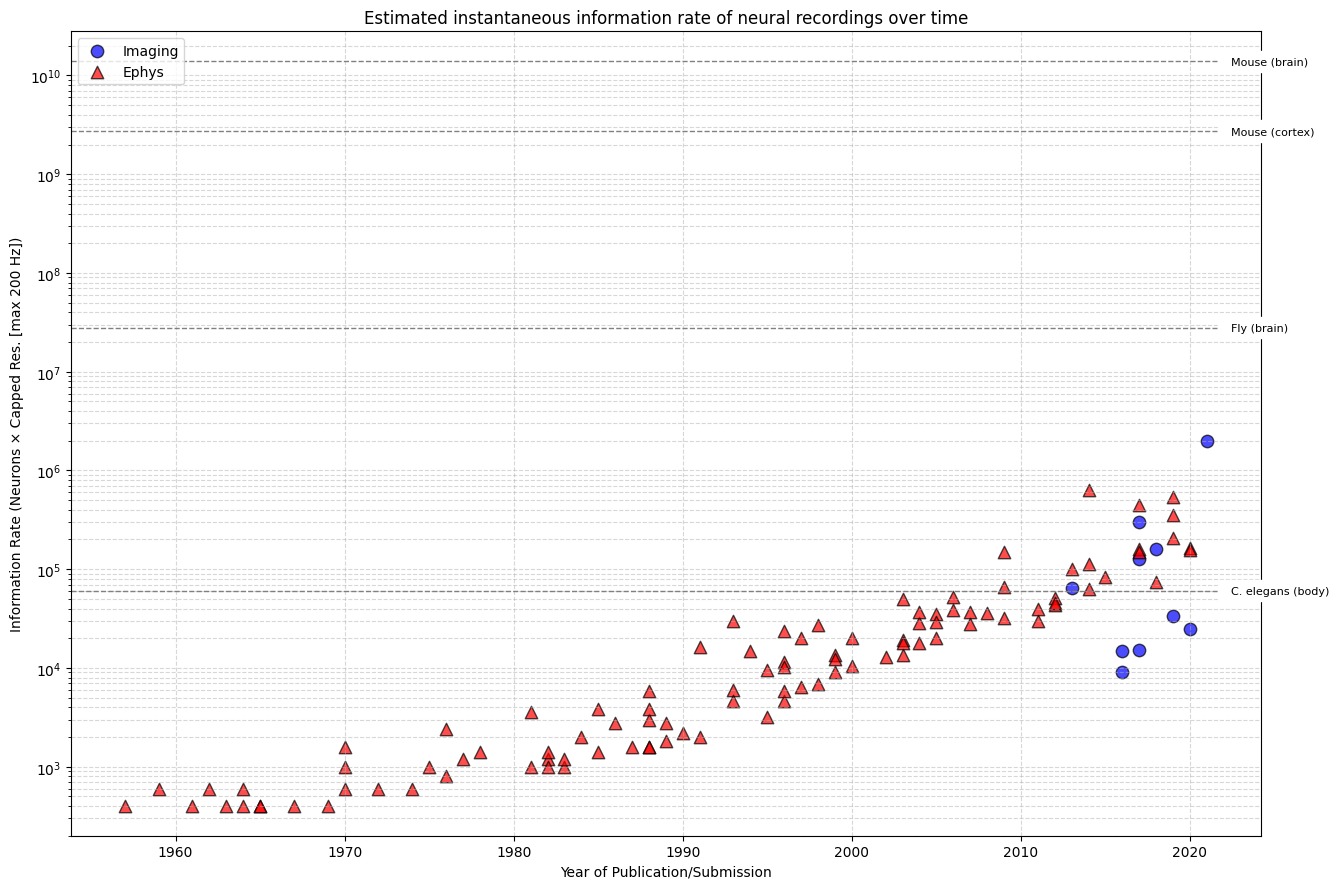

Points plotted — Imaging: 10, Ephys: 101


In [ ]:
# Re-plot "Estimated instantaneous information rate of neural recordings over time"
# using the data you just saved (neural_information_rate.csv).
# If the file isn't found, it will fall back to the in-memory `csv_data`.

import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ---------------------------
# Load data
# ---------------------------
if os.path.exists('neural_information_rate.csv'):
    df = pd.read_csv('neural_information_rate.csv')
else:
    # Fallback to the in-memory CSV string
    df = pd.read_csv(io.StringIO(csv_data))

# Ensure expected columns exist
# If effective_temporal_resolution_hz or calculated_information_rate are missing,
# recompute them quickly with a conservative rule (Ephys = 200 Hz cap; Imaging = use Method Note if parsable).
MAX_TEMP_RES_CAP = 200.0

if 'effective_temporal_resolution_hz' not in df.columns or df['effective_temporal_resolution_hz'].isna().all():
    import re
    _num_before_hz = re.compile(r'([<>~]?\s*\d+(?:\.\d+)?)\s*hz', flags=re.I)

    def parse_hz_from_text(text: str):
        if not isinstance(text, str):
            return np.nan
        m = _num_before_hz.search(text)
        if not m:
            return np.nan
        s = m.group(1).strip().lstrip('<>~')
        try:
            return float(s)
        except ValueError:
            return np.nan

    def eff_hz(row):
        method = str(row.get('Method', '')).lower()
        if method.startswith('ephys'):
            return MAX_TEMP_RES_CAP
        if method.startswith('imaging'):
            # try Method Note, title, abstract
            for field in ('Method Note', 'title', 'abstract'):
                hz = parse_hz_from_text(row.get(field, ''))
                if pd.notna(hz):
                    return min(hz, MAX_TEMP_RES_CAP)
        return np.nan

    df['effective_temporal_resolution_hz'] = df.apply(eff_hz, axis=1)

if 'calculated_information_rate' not in df.columns or df['calculated_information_rate'].isna().all():
    df['calculated_information_rate'] = (
        df['normalized_best_yield'] * df['effective_temporal_resolution_hz']
    )

# Clean year from 'Year' or fallback to initial_submission
def get_year(row):
    if pd.notna(row.get('Year')):
        try:
            return int(row['Year'])
        except Exception:
            pass
    init = row.get('initial_submission', np.nan)
    if pd.notna(init):
        try:
            return pd.to_datetime(init).year
        except Exception:
            return np.nan
    return np.nan

df['plot_year'] = df.apply(get_year, axis=1)

# Filter rows with everything we need
df_plot = df[
    df['plot_year'].notna()
    & df['normalized_best_yield'].notna()
    & df['effective_temporal_resolution_hz'].notna()
    & df['calculated_information_rate'].notna()
    & (df['normalized_best_yield'] > 0)
]

# ---------------------------
# Targets for dashed lines (benchmarks)
# ---------------------------
organism_data = {
    "C. elegans (body)": 3.02e2,
    "Fly (brain)": 1.40e5,
    "Mouse (cortex)": 1.37e7,
    "Mouse (brain)": 7.00e7,
}
organism_targets = {k: v * MAX_TEMP_RES_CAP for k, v in organism_data.items()}

# ---------------------------
# Split by modality
# ---------------------------
is_imaging = df_plot['Method'].astype(str).str.lower().str.startswith('imaging')
is_ephys   = df_plot['Method'].astype(str).str.lower().str.startswith('ephys')

years_img  = df_plot.loc[is_imaging, 'plot_year'].astype(int).to_numpy()
rates_img  = df_plot.loc[is_imaging, 'calculated_information_rate'].to_numpy()

years_e    = df_plot.loc[is_ephys, 'plot_year'].astype(int).to_numpy()
rates_e    = df_plot.loc[is_ephys, 'calculated_information_rate'].to_numpy()

# ---------------------------
# Plot
# ---------------------------
fig, ax = plt.subplots(figsize=(15, 9))

if len(years_img):
    ax.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if len(years_e):
    ax.scatter(years_e, rates_e,   label='Ephys',   alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

ax.set_yscale('log')
ax.set_xlabel('Year of Publication/Submission')
ax.set_ylabel(f'Information Rate (Neurons × Capped Res. [max {int(MAX_TEMP_RES_CAP)} Hz])')
ax.set_title('Estimated instantaneous information rate of neural recordings over time')
ax.grid(True, which="both", ls="--", alpha=0.5)
ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Y-limits consistent with targets and points
all_y = np.concatenate([
    rates_img if len(rates_img) else np.array([]),
    rates_e if len(rates_e) else np.array([]),
    np.array(list(organism_targets.values()))
])
if all_y.size:
    ax.set_ylim(all_y.min()/2, all_y.max()*2)

# Add benchmark lines
if df_plot['plot_year'].notna().any():
    max_year = int(df_plot['plot_year'].max())
else:
    max_year = 2025
target_label_x = max_year + 1

for name, target in sorted(organism_targets.items(), key=lambda kv: kv[1]):
    ax.axhline(y=target, color='gray', linestyle='--', linewidth=1)
    ax.text(target_label_x, target, f'  {name}', va='center', ha='left', fontsize=8, backgroundcolor='white')

ax.legend(loc='upper left')
fig.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

print(f"Points plotted — Imaging: {len(years_img)}, Ephys: {len(years_e)}")


In [ ]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming csv_data is defined in a previous cell, or load from file
# For robustness, include a fallback if neural_information_rate.csv exists

# ---------------------------
# Load data
# ---------------------------
if os.path.exists('neural_information_rate.csv'):
    df = pd.read_csv('neural_information_rate.csv')
else:
    # Fallback to the in-memory CSV string (if csv_data was defined earlier)
    # Or, if not, this would fail, necessitating user to run previous cells.
    try:
        df = pd.read_csv(io.StringIO(csv_data))
    except NameError:
        print("Error: 'csv_data' not found. Please ensure the CSV data is loaded.")
        exit()

# Ensure expected columns exist (recompute if necessary for robustness)
MAX_TEMP_RES_CAP = 200.0

# Manually curated temporal resolutions (in Hz) - re-defining for standalone execution
manual_imaging_temp_res = {
    "10.1038/nmeth.2434": 0.8, "10.7554/eLife.14472": 5.0, "10.1038/nmeth.4040": 3.0,
    "10.1038/nmeth.4226": 30.0, "10.1101/156786": 30.0, "10.1101/061507": 30.0,
    "10.7554/eLife.28158": 1.6, "10.1101/193383": 30.0, "10.1101/434035": 15.0,
    "10.1101/441014": 30.0, "10.1101/452672": 30.0, "10.1016/j.neuron.2018.09.042": 2.0,
    "10.1126/science.aav7893": 3.0, "10.1101/679324": 3.0, "10.1101/745323": 1.1,
    "10.1101/2020.07.14.201699": 1.56, "10.1101/2021.02.21.432164": 2.0,
    "10.1101/2021.07.28.454025": 4.4, "10.1101/2021.09.20.461015": 7.0,
    "10.1101/2023.03.20.533476": 18.0, "10.1101/2023.07.25.550571": 3.2,
    "10.1101/2024.01.15.575721": 2.0, "10.1101/2024.02.25.581990": 3.7,
    "10.1101/2024.08.21.609011": 30.0,
}

if 'effective_temporal_resolution_hz' not in df.columns or df['effective_temporal_resolution_hz'].isna().all():
    import re
    _num_before_hz = re.compile(r'([<>~]?\s*\d+(?:\.\d+)?)\s*hz', flags=re.I)

    def parse_hz_from_text(text: str):
        if not isinstance(text, str):
            return np.nan
        m = _num_before_hz.search(text)
        if not m:
            return np.nan
        s = m.group(1).strip().lstrip('<>~')
        try:
            return float(s)
        except ValueError:
            return np.nan

    def effective_temp_res(row):
        method = str(row.get('Method', '')).strip()
        if method.lower().startswith('ephys'):
            return MAX_TEMP_RES_CAP
        if method.lower().startswith('imaging'):
            doi = str(row.get('doi', '')).strip()
            hz = manual_imaging_temp_res.get(doi, np.nan)
            if np.isnan(hz):
                hz = parse_hz_from_text(row.get('Method Note', ''))
            if np.isnan(hz):
                hz = parse_hz_from_text(row.get('title', ''))
            if np.isnan(hz):
                hz = parse_hz_from_text(row.get('abstract', ''))
            return min(hz, MAX_TEMP_RES_CAP) if pd.notna(hz) else np.nan
        return np.nan

    df['effective_temporal_resolution_hz'] = df.apply(effective_temp_res, axis=1)

if 'calculated_information_rate' not in df.columns or df['calculated_information_rate'].isna().all():
    df['calculated_information_rate'] = (
        df['normalized_best_yield'] * df['effective_temporal_resolution_hz']
    )

# Clean year from 'Year' or fallback to initial_submission
def get_year(row):
    if pd.notna(row.get('Year')):
        try:
            return int(row['Year'])
        except Exception:
            pass
    init = row.get('initial_submission', np.nan)
    if pd.notna(init):
        try:
            return pd.to_datetime(init).year
        except Exception:
            return np.nan
    return np.nan

df['plot_year'] = df.apply(get_year, axis=1)

# Filter rows with everything we need
df_plot = df[
    df['plot_year'].notna()
    & df['normalized_best_yield'].notna()
    & df['effective_temporal_resolution_hz'].notna()
    & df['calculated_information_rate'].notna()
    & (df['normalized_best_yield'] > 0)
]

# ---------------------------
# Targets for dashed lines (benchmarks)
# ---------------------------
organism_data = {
    "C. elegans (body)": 3.02e2,
    "Fly (brain)": 1.40e5,
    "Mouse (cortex)": 1.37e7,
    "Mouse (brain)": 7.00e7,
}
organism_targets = {k: v * MAX_TEMP_RES_CAP for k, v in organism_data.items()}

# ---------------------------
# Split by modality
# ---------------------------
is_imaging = df_plot['Method'].astype(str).str.lower().str.startswith('imaging')
is_ephys   = df_plot['Method'].astype(str).str.lower().str.startswith('ephys')

plot_data_imaging = df_plot.loc[is_imaging, ['plot_year', 'calculated_information_rate', 'normalized_best_yield', 'effective_temporal_resolution_hz', 'doi', 'Authors', 'title', 'Method']].values.tolist()
plot_data_ephys = df_plot.loc[is_ephys, ['plot_year', 'calculated_information_rate', 'normalized_best_yield', 'effective_temporal_resolution_hz', 'doi', 'Authors', 'title', 'Method']].values.tolist()

all_plot_data_detailed = sorted(plot_data_imaging + plot_data_ephys, key=lambda x: x[1], reverse=True)

# ---------------------------
# Plot 1: Improved Annotations with Target Lines (Save as SVG)
# ---------------------------
fig1, ax1 = plt.subplots(figsize=(15, 9)) # Wider for target labels

if plot_data_imaging:
    years_img = [item[0] for item in plot_data_imaging]
    rates_img = [item[1] for item in plot_data_imaging]
    ax1.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys = [item[0] for item in plot_data_ephys]
    rates_ephys = [item[1] for item in plot_data_ephys]
    ax1.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

ax1.set_yscale('log')
ax1.set_xlabel('Year of Publication/Submission')
ax1.set_ylabel(f'Information Rate (Neurons \u00d7 Capped Res. [max {int(MAX_TEMP_RES_CAP)} Hz])')
ax1.set_title('Information Rate Over Time (Improved Annotations & Targets)')
ax1.grid(True, which="both", ls="--", alpha=0.5)
ax1.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax1.yaxis.set_minor_formatter(ticker.NullFormatter())

# Y-limits consistent with targets and points
all_y_values = [e[1] for e in all_plot_data_detailed] + list(organism_targets.values())
if all_y_values:
    y_min_plot = min(all_y_values) / 2
    y_max_plot = max(all_y_values) * 2
    ax1.set_ylim(y_min_plot, y_max_plot)
else:
    y_min_plot, y_max_plot = 1, 10
    ax1.set_ylim(y_min_plot, y_max_plot)


# Add organism target lines to Plot 1
if df_plot['plot_year'].notna().any():
    max_year_data = int(df_plot['plot_year'].max())
else:
    max_year_data = 2025
target_line_x_pos = max_year_data + 1 # Position for labels

for name, target_rate in sorted(organism_targets.items(), key=lambda item: item[1]):
    ax1.axhline(y=target_rate, color='gray', linestyle='--', linewidth=1)
    ax1.text(target_line_x_pos, target_rate, f'  {name}', color='black', va='center', ha='left', fontsize=8, backgroundcolor='white')

# Annotation logic for Plot 1
lbm_dois = ["10.1101/2021.02.21.432164", "10.1101/2024.01.15.575721"]
points_to_annotate = []
for entry in all_plot_data_detailed:
    if entry[4] in lbm_dois: points_to_annotate.append(entry)

non_lbm_top_count = 0
annotated_ids_plot1 = {entry[4] if entry[4] else (entry[5].split(" ")[0] if entry[5] else "") for entry in points_to_annotate}
for entry in all_plot_data_detailed:
    if non_lbm_top_count >= 3: break
    current_id = entry[4] if entry[4] else (entry[5].split(" ")[0] if entry[5] else "")
    if entry[4] not in lbm_dois and current_id not in annotated_ids_plot1:
        points_to_annotate.append(entry)
        annotated_ids_plot1.add(current_id)
        non_lbm_top_count += 1

early_ephys_points = sorted([e for e in plot_data_ephys if e[0] < 1970], key=lambda x: x[0])
if early_ephys_points:
    author_name_ephys = (early_ephys_points[0][5].split(" ")[0] if early_ephys_points[0][5] else "")
    if early_ephys_points[0][4] not in annotated_ids_plot1 and author_name_ephys not in annotated_ids_plot1 :
        points_to_annotate.append(early_ephys_points[0])

unique_points_to_annotate = []
seen_keys_for_annotation = set()
for p in points_to_annotate:
    key = (p[0], p[1], p[4]) # Year, Rate, DOI
    if key not in seen_keys_for_annotation:
        unique_points_to_annotate.append(p)
        seen_keys_for_annotation.add(key)
points_to_annotate = unique_points_to_annotate

text_offsets = [(5, 8), (5, -15), (10, 0), (-12, -15), (10,10)]
offset_idx = 0
for year_val, rate, yield_val_pt, _, doi_pt, authors_pt, title_pt, _ in points_to_annotate:
    author_name_raw = str(authors_pt).split(" ")[0].replace(",", "") if authors_pt else "N/A"
    author_name = author_name_raw
    if (author_name == "N/A" or "Mineault" in authors_pt or not authors_pt) and title_pt:
        title_words = str(title_pt).split(" ") # ensure title_pt is string
        if title_words:
            potential_name = title_words[0]
            if potential_name.lower() in ["an", "a", "the"] and len(title_words) > 1:
                potential_name = title_words[1]
            author_name = potential_name.replace(":", "")
        else: # Fallback if title is also empty or just one word
            author_name = "N/A" if author_name_raw == "N/A" else author_name_raw


    neuron_label = f"~{int(yield_val_pt)} N" if yield_val_pt < 1000 else f"~{int(yield_val_pt/1000)}k N"
    text_label = f"{author_name}\n{neuron_label}"
    if doi_pt in lbm_dois: text_label = f"LBM ({author_name})\n{neuron_label}"

    current_offset = text_offsets[offset_idx % len(text_offsets)]
    # Special placement for LBM to ensure visibility
    if doi_pt == "10.1101/2021.02.21.432164": current_offset = (-10, -20) # Below and left
    elif doi_pt == "10.1101/2024.01.15.575721": current_offset = (5, 8) # Default top right

    ax1.annotate(text_label, (year_val, rate), textcoords="offset points",
                 xytext=current_offset, ha='left', fontsize=7,
                 arrowprops=dict(arrowstyle="-", color='gray', alpha=0.4, connectionstyle="arc3,rad=0.1") if not (doi_pt in lbm_dois and year_val > 2020 and rate > 1e6) else None)
    offset_idx += 1

ax1.legend(loc='upper left')
fig1.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust rect to make space for target labels on the right
add_attribution()
plt.savefig('information_rate_annotated.svg', format='svg')
plt.savefig('information_rate_annotated.png', format='svg', dpi=150)
plt.close(fig1) # Close the figure to avoid displaying it

# ---------------------------
# Plot 2: No Point Labels with Target Lines (Save as SVG)
# ---------------------------
fig2, ax2 = plt.subplots(figsize=(15, 9)) # Wider for target labels
if plot_data_imaging:
    years_img = [item[0] for item in plot_data_imaging]
    rates_img = [item[1] for item in plot_data_imaging]
    ax2.scatter(years_img, rates_img, label='Imaging', alpha=0.7, s=80, edgecolors='k', c='blue')
if plot_data_ephys:
    years_ephys = [item[0] for item in plot_data_ephys]
    rates_ephys = [item[1] for item in plot_data_ephys]
    ax2.scatter(years_ephys, rates_ephys, label='Ephys', alpha=0.7, s=80, edgecolors='k', c='red', marker='^')

ax2.set_yscale('log')
ax2.set_xlabel('Year of Publication/Submission')
ax2.set_ylabel(f'Information Rate (Neurons \u00d7 Capped Res. [max {int(MAX_TEMP_RES_CAP)} Hz])')
ax2.set_title('Information Rate Over Time')
ax2.grid(True, which="both", ls="--", alpha=0.5)
ax2.yaxis.set_major_formatter(ticker.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(2, 0.4)))
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())
ax2.set_ylim(y_min_plot, y_max_plot) # Apply consistent y-limits

# Add organism target lines to Plot 2
for name, target_rate in sorted(organism_targets.items(), key=lambda item: item[1]):
    ax2.axhline(y=target_rate, color='dimgray', linestyle='--', linewidth=1.2, alpha=0.8)
    ax2.text(target_line_x_pos, target_rate, f'  {name}', color='black', va='center', ha='left', fontsize=8, backgroundcolor='white')

ax2.legend(loc='upper left')
fig2.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust rect to make space for target labels on the right
plt.savefig('information_rate_no_labels.svg', format='svg')
plt.savefig('information_rate_no_labels.png', format='svg', dpi=150)
plt.close(fig2) # Close the figure to avoid displaying it

print(f"Plotted {len(plot_data_imaging)} imaging points and {len(plot_data_ephys)} ephys points for both plots, and saved them as SVG.")
print(f"Temporal resolution cap was {MAX_TEMP_RES_CAP} Hz.")
print("\nOrganism targets (Info Rate @ 200Hz):")
for name, rate in organism_targets.items():
    print(f"{name}: {rate:,.0f}")
